# Project 3 - Writing "Dream Interpretation"
## Presenters: Shany Herskovits and Ofir Nahshon

# DreamBank Analysis Dataset

## Research Overview

The DreamBank dataset contains over 38,000 dream reports collected from various sources and research studies between 1960 and 2015. This comprehensive collection was analyzed to test the "continuity hypothesis" of dreams, which states that most dreams are a continuation of what happens in everyday life.

## Key Dataset Characteristics

- **Size**: 38,000+ dream reports, of which 24,000 were analyzed (minimum 50 words each)
- **Time span**: Six decades (1960-2015)
- **Demographics**: Various dreamers with information on gender, age (7-74), profession, and personal history
- **Special subsets**:
  - Blindness set (400 reports from people with vision loss)
  - War veteran set (600 reports from a Vietnam veteran)
  - Izzy set (4,300 reports from one woman aged 12-25)
  - Normative set (1,000 reports hand-coded by dream experts)

## Methodology

The researchers developed an automated tool that analyzes dream reports according to the Hall-Van de Castle coding system, focusing on three primary dimensions:
1. **Characters**: People, animals, and imaginary figures
2. **Social interactions**: Friendly, sexual, and aggressive
3. **Emotions**: Positive and negative emotional markers

The tool was validated against hand-coded reports with an average error of 0.24, making it sufficiently accurate for large-scale analysis.

## Key Findings

The dataset analysis provided strong supporting evidence for the continuity hypothesis:

1. **Gender differences**: Female dreams contained more friendly interactions and positive emotions, while male dreams showed more aggression and negative emotions.

2. **Life stages**: Adolescent dreams (Izzy's set) showed increased negative emotions during teenage years, followed by sexual content emerging in early adulthood.

3. **Life experiences**: The war veteran's dreams contained significantly higher aggression markers compared to the general population.

4. **Sensory conditions**: Blind people's dreams featured more imaginary characters and female figures, likely reflecting their real-life carers.

5. **Societal trends**: Dreams from the 1960s contained higher aggression markers that steadily decreased through 2000, mirroring actual violent crime statistics in the US.

## Significance

This dataset represents the largest-ever analysis of dream reports, providing quantitative evidence that dreams reflect waking life experiences across various dimensions. The automated analysis method developed for this dataset opens possibilities for:

- Clinical applications in mental health assessment
- Large-scale dream pattern analysis
- Temporal and demographic comparisons
- Testing theories of consciousness and cognition

The dataset demonstrates that modern computational techniques can effectively bridge the gap between subjective dream experiences and objective analysis, enabling researchers to quantify important aspects of dreams at unprecedented scale.

Confirm if GPU is available

In [ ]:
import torch
from sympy import shape

print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Get GPU name
print(torch.cuda.current_device())  # Get current GPU device index
print(torch.cuda.device_count())  # Check number of GPUs available

/home/shanyh/NLP_final_project/.venv/lib/python3.10/site-packages/torch/_subclasses/functional_tensor.py:275: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


True
GRID A100D-20C
0
1


In [ ]:
!pip install transformers datasets accelerate torch pandas scikit-learn

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/20/37/1f29af63e9c30156a3ed6ebc2754077016577c094f31de7b2631e5d379eb/transformers-4.49.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 493.7 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/16/44/5de560a2625d31801895fb2663693df210c6465960d61a99192caa9afd63/datasets-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/70/83/167d4b638bb758a966828eb8d23c5e7047825edfdf768ff5f4fb01440063/accelerate-1.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/44/50/7db2cd5e6373ae796f0ddad3675268c8d59fb6076e66f0c339d61cea886b/pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_

### Loading the datasets

In [ ]:
import pandas as pd

# Define the path to the dataset
file_path = "rsos_dream_data.tsv"
# Load Dryad dataset
dryad_data = pd.read_csv(file_path, sep="\t")

# Print first few rows to confirm it's loaded correctly
print(dryad_data.head())


   dream_id dreamer               description dream_date dream_language  \
0         1    alta  Alta: a detailed dreamer       1957             en   
1         2    alta  Alta: a detailed dreamer  8/11/1967             en   
2         3    alta  Alta: a detailed dreamer   8/1/1985             en   
3         4    alta  Alta: a detailed dreamer      1985?             en   
4         5    alta  Alta: a detailed dreamer      1985?             en   

                                          text_dream  \
0  The one at the Meads's house, where it's bigge...   
1  I'm at a family reunion in a large fine house ...   
2  I watch a plane fly past and shortly realize i...   
3  Me pulling the green leaves and berries off so...   
4  I'm in a room that reminds me of (but definite...   

                                     characters_code  \
0                       2ISA, 1MKA, 1FDA, 1IOA, 2ISA   
1                                 2ISA, people, 2ISA   
2           2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2I

### Explore the Dataset

In [ ]:
# Check dataset info
print(dryad_data.info())

# Show column names
print(dryad_data.columns)

# Display a few rows
print(dryad_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dream_id                 21000 non-null  int64  
 1   dreamer                  21000 non-null  object 
 2   description              21000 non-null  object 
 3   dream_date               21000 non-null  object 
 4   dream_language           21000 non-null  object 
 5   text_dream               21000 non-null  object 
 6   characters_code          20532 non-null  object 
 7   emotions_code            11086 non-null  object 
 8   aggression_code          15432 non-null  object 
 9   friendliness_code        11239 non-null  object 
 10  sexuality_code           6470 non-null   object 
 11  Male                     21000 non-null  float64
 12  Animal                   21000 non-null  float64
 13  Friends                  21000 non-null  float64
 14  Family                

### Preprocessing the Data

From the dataset structure, the key columns for training LLMs are:

1. dream_id – Unique ID (not needed for training)
2. dreamer – Dreamer information (likely not useful for text generation)
3. description – A short description of the dreamer
4. dream_date – The date of the dream (not needed for training)
5. dream_language – Language of the dream text
6. text_dream – Full dream text (important for training!)
7. characters_code, emotions_code, aggression_code, etc. – Various dream classifications (could be used for fine-tuning)
8. Male, Animal, Friends, Family, Dead&Imaginary - unless classifying dream types
9. Aggression/Friendliness to the end - could be used for classification but only for BERT For GPT-2 No, because it only generates text and doesn’t use numerical labels.


We'll create two separate datasets:

Dataset for GPT-2 / Llama 3.1 8B → Includes dream text and codes translated to their text meaning (for text generation).

Dataset for BERT → Includes dream text + labels (for classification).


## Create Dataset for GPT-2  / Llama 3.1 8B
We will:  
1. Create dictionaries for translating the dataset codes to their text meaning.
2. Translating the codes to text and saving them into a df.
3. Remove rows where `text_dream` is empty or missing.
4. Trim whitespace** (in case of accidental spaces).

In [ ]:
# Sample dictionary that maps codes to interpretations
aggression_code = {
    '1': 'Covert feeling of hostility or anger without any overt expression of aggression',
    '2': 'Aggression displayed through verbal or expressive activity (e.g., yelling, swearing)',
    '3': 'Attempt to reject, exploit, control, or verbally coerce',
    '4': 'Serious accusation or verbal threat of harm against',
    '5': 'Theft or destruction of possessions belonging to',
    '6': 'chase, capture, confine, or physically coerce',
    '7': 'Physical harm, such as assault attempted against',
    '8': 'Aggressive act resulting in the death of',
    'R': 'the reciprocated aggressions',
    'D': 'the Dreamer',
    '>': 'the victim',
    '=': 'by Mutual aggressions',
    '+': 'If more than one character is involved, either as aggressor or victim.',
    '*': 'Self-directed aggressions',
    'Q': 'Unknown character'
}
character_code_1 = {
    '1': 'individual',
    '2': 'group',
    '3': 'individual dead',
    '4': 'group dead',
    '5': 'individual imaginary',
    '6': 'group imaginary',
    '7': 'original form',
    '8': 'changed form'
}
character_code_2 = {
    'M': 'male',
    'F': 'female',
    'I': 'indefinite',
    'J': 'joint'
}
character_code_3 = {
    'F': 'father',
    'M': 'mother',
    'X': 'parents',
    'B': 'brother',
    'T': 'sister',
    'A': 'son',
    'D': 'daughter',
    'C': 'child',
    'I': 'infant',
    'Y': 'immediate family',
    'R': 'other relative',
    'H': 'husband',
    'W': 'wife',
    'K': 'known',
    'P': 'prominent',
    'O': 'occupational',
    'E': 'ethnic/race',
    'S': 'stranger',
    'U': 'uncertain'
}
character_code_4 = {
    'A': 'adult',
    'T': 'teenager',
    'C': 'child',
    'B': 'baby'
}
friendliness_code = {
    '1': 'Feelings of friendliness toward a character but not expressed overtly',
    '2': 'Expressions of friendliness conveyed through verbal or gestural means',
    '3': 'Offering a gift or loaning a possession to a character',
    '4': 'Extending assistance to a character or offering to do so',
    '5': 'Requesting a character to share in a pleasant social activity',
    '6': 'Friendliness expressed through socially acceptable forms of physical contact',
    '7': 'Desire for a long-term close relationship with a character (getting married, engaging)',
    'R': 'Reciprocated friendliness',
    'D': 'Dreamer',
    '>': 'the befriended',
    '=': 'Mutual friendliness',
    '+': 'If more than one character is involved, either as befriender or befriended.',
    '*': 'Self-directed friendliness',
    'Q': 'Unknown character'
}
sexuality_code = {
    '1': 'A character has sexual thoughts or fantasies about another character',
    '2': 'A character makes sexual overtures to or propositions another character',
    '3': 'Necking and nonplatonic kissing (excluding family or platonic gestures)',
    '4': 'Non-intercourse activities preceding intercourse (fondling, petting)',
    '5': 'A character has or attempts to have sexual intercourse with another character',
    'R': 'Reciprocated sexuality',
    'D': 'Dreamer',
    '>': 'the recipient',
    '=': 'Mutual sexual interactions',
    '+': 'If more than one character is involved.',
    '*': 'Self-directed sexuality ',
    'Q': 'Unknown character'
}
emotions_code = {
    'AN': 'Anger – includes emotions such as annoyed, mad, or furious',
    'AP': 'Apprehension – includes emotions related to fear and anxiety',
    'SD': 'Sadness – includes emotions such as disappointed, hurt, or depressed',
    'CO': 'Confusion – includes emotions like surprise, bewilderment, or amazement',
    'HA': 'Happiness – includes emotions such as pleased, joyful, or contented',
    'D': 'Dreamer',
    '+': 'If more than one character is involved',
    'Q': 'Unknown character'
}

In [ ]:
# Function to decode character codes
def decode_character_code(character_code):
    """
    Decode a 4-character character code into its interpretation.

    :param character_code: A 4-character code (e.g., '2ISA', '1MKA')
    :return: Combined interpretation string
    """
    # Extract components from the 4-character code
    if pd.isna(character_code) or len(character_code) != 4:
        return "Unknown character"

    type_code = character_code[0]  # First character
    gender_code = character_code[1]  # Second character
    relation_code = character_code[2]  # Third character
    age_code = character_code[3]  # Fourth character

    # Lookup interpretations
    type_interpretation = character_code_1.get(type_code, "Unknown type")
    gender_interpretation = character_code_2.get(gender_code, "Unknown gender")
    relation_interpretation = character_code_3.get(relation_code, "Unknown relation")
    age_interpretation = character_code_4.get(age_code, "Unknown age")

    # Combine interpretations into a single string
    return f"{type_interpretation} {gender_interpretation} {relation_interpretation} {age_interpretation}"

def decode_character_codes(codes):
    """
    Decode multiple character codes into their interpretations.

    :param codes: A comma-separated string of character codes
    :return: Combined interpretation strings for all codes
    """
    if pd.isna(codes):  # Check for NaN
        return ["Unknown code"]  # Handle NaN gracefully

    codes_list = codes.split(',') if isinstance(codes, str) else codes
    interpretations = [decode_character_code(code.strip()) for code in codes_list]

    return ', '.join(interpretations)


In [ ]:

# Function to decode aggression codes
def decode_aggression_codes(codes):
    """
    Decode aggression codes into interpretations while handling single characters and combinations.

    :param codes: A comma-separated string of aggression codes (e.g., 'D 7> 1MBA, 1FKA 2> D+1MKA')
    :return: Combined interpretation string of all aggression codes
    """
    decoded_interpretations = []

    if pd.isna(codes):
        return "Unknown"

    codes_list = codes.split(',') if isinstance(codes, str) else codes  # Handle multiple codes

    for code in codes_list:
        # Splitting the code into components
        parts = code.strip().split()  # Separate by spaces
        direction_position = 1
        # Handling single character aggressor codes (like D for Dreamer or Q for Unknown)
        if len(parts[0]) == 1:
            # Decode aggressor directly
            aggressor_interpretation = aggression_code.get(parts[0], "Unknown type")
            interaction = f"Aggressor: {aggressor_interpretation}"
        else:
            # Decode aggressor part (should be the first coded portion)
            aggressor_code = parts[0]
            if '+' in aggressor_code:
                char_codes = aggressor_code.split('+')
                combined_interpretations = []
                for code in char_codes:
                    if len(code) == 1:  # Single character aggressor
                        agg_1 = aggression_code.get(code, "Unknown type")
                        combined_interpretations.append(agg_1)  # Append as a string, not join
                    elif len(code) == 4:  # If it's a valid 4-character code
                        agg_2 = decode_character_code(code)  # Get interpretation
                        combined_interpretations.append(agg_2)
                combined_interpretation_str = ', '.join(combined_interpretations)
                interaction = f"Combined Aggressors: {combined_interpretation_str}"
            else:
                aggressor_interpretation = decode_character_code(aggressor_code)
                interaction = f"Aggressor: {aggressor_interpretation}"
        if len(parts[direction_position]) == 1:
            additional_info_inter = aggression_code.get(parts[direction_position], "Unknown aggression")
            interaction += f", Direction: {additional_info_inter}"
        # Check if there are additional characteristics like direction or reciprocation
        elif len(parts[direction_position]) == 2 and parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7', '8']:
            aggression_type_code = parts[direction_position][0]  # First character should be a number 1-8
            aggression_interpretation = aggression_code.get(aggression_type_code, "Unknown aggression")
            interaction += f", Aggression: {aggression_interpretation}"
            # Check for direction or type of aggression
            additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
            if additional_info:  # If there is any extra information
                additional_info_inter = aggression_code.get(additional_info, "Unknown aggression")
                interaction += f", Direction: {additional_info_inter}"
        else:
            aggressor_interpretation = decode_character_code(parts[direction_position])
            interaction += f", additional Aggressor: {aggressor_interpretation}"
            direction_position += 1
            if len(parts[direction_position]) == 1:
                additional_info_inter = aggression_code.get(parts[direction_position], "Unknown aggression")
                interaction += f", Direction: {additional_info_inter}"
            elif len(parts[direction_position]) == 2 and (parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7', '8']):
                aggression_type_code = parts[direction_position][0]  # First character should be a number 1-8
                aggression_interpretation = aggression_code.get(aggression_type_code, "Unknown aggression")
                interaction += f", Aggression: {aggression_interpretation}"
                additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
                if additional_info:  # If there is any extra information
                    additional_info_inter = aggression_code.get(additional_info, "Unknown aggression")
                    interaction += f", Direction: {additional_info_inter}"
            else:
                aggressor_interpretation = decode_character_code(parts[direction_position])
                interaction += f", additional Aggressor: {aggressor_interpretation}"

        if len(parts) > direction_position + 1:
            victom_part = parts[direction_position + 1]
            if len(victom_part) == 1:
                # Decode aggressor directly
                victoms_interpretation = aggression_code.get(victom_part, "Unknown type")
                interaction += f", Victoms: {victoms_interpretation}"
            else:
                # Now handle '+' sign combinations for multiple characters
                if '+' in victom_part:
                    char_codes = victom_part.split('+')
                    combined_interpretations = []
                    for code in char_codes:
                        if len(code) == 1:  # Single character aggressor
                            agg_1 = aggression_code.get(code, "Unknown type")
                            combined_interpretations.append(agg_1)  # Append as a string, not join
                        elif len(code) == 4:  # If it's a valid 4-character code
                            agg_2 = decode_character_code(code)  # Get interpretation
                            combined_interpretations.append(agg_2)
                    combined_interpretation_str = ', '.join(combined_interpretations)
                    interaction += f", Combined Victoms: {combined_interpretation_str}"
                else:
                    victoms = decode_character_code(victom_part)
                    interaction += f", Victoms: {victoms}"
        else:
            interaction += f", Victoms: no victoms"

        decoded_interpretations.append(interaction)

    return '; '.join(decoded_interpretations)


In [ ]:
# Function to decode friendliness codes
def decode_friendliness_codes(codes):

    """
    Decode friendliness codes into interpretations while handling single characters and combinations.

    :param codes: A comma-separated string of friendliness codes (e.g., 'D 7> 1MBA, 1FKA 2> D+1MKA')
    :return: Combined interpretation string of all friendliness codes
    """
    decoded_interpretations = []

    if pd.isna(codes):
        return "Unknown"

    codes_list = codes.split(',') if isinstance(codes, str) else codes  # Handle multiple codes

    for code in codes_list:
        # Splitting the code into components
        parts = code.strip().split()  # Separate by spaces
        direction_position = 1
        # Handling single character Befriende codes (like D for Dreamer or Q for Unknown)
        if len(parts[0]) == 1:
            # Decode Befriende directly
            befriende_interpretation = friendliness_code.get(parts[0], "Unknown type")
            interaction = f"Befriender: {befriende_interpretation}"
        else:
            # Decode befriende part (should be the first coded portion)
            befriende_code = parts[0]
            if '+' in befriende_code:
                char_codes = befriende_code.split('+')
                combined_interpretations = []
                for code in char_codes:
                    if len(code) == 1:  # Single character befriende
                        bef_1 = friendliness_code.get(code, "Unknown type")
                        combined_interpretations.append(bef_1)  # Append as a string, not join
                    elif len(code) == 4:  # If it's a valid 4-character code
                        bef_2 = decode_character_code(code)  # Get interpretation
                        combined_interpretations.append(bef_2)
                combined_interpretation_str = ', '.join(combined_interpretations)
                interaction = f"Combined Befrienders: {combined_interpretation_str}"
            else:
                befriende_interpretation = decode_character_code(befriende_code)
                interaction = f"Befriender: {befriende_interpretation}"
        if len(parts[direction_position]) == 1:
            additional_info_inter = friendliness_code.get(parts[direction_position], "Unknown friendliness")
            interaction += f", Direction: {additional_info_inter}"
        # Check if there are additional characteristics like direction or reciprocation
        elif len(parts[direction_position]) == 2 and parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7']:
            friendliness_type_code = parts[direction_position][0]  # First character should be a number 1-8
            friendliness_interpretation = friendliness_code.get(friendliness_type_code, "Unknown friendliness")
            interaction += f", Friendliness: {friendliness_interpretation}"
            # Check for direction or type of friendliness
            additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
            if additional_info:  # If there is any extra information
                additional_info_inter = friendliness_code.get(additional_info, "Unknown friendliness")
                interaction += f", Direction: {additional_info_inter}"
        else:
            befriende_interpretation = decode_character_code(parts[direction_position])
            interaction += f", additional Befriender: {befriende_interpretation}"
            direction_position += 1
            if len(parts[direction_position]) == 1:
                additional_info_inter = friendliness_code.get(parts[direction_position], "Unknown friendliness")
                interaction += f", Direction: {additional_info_inter}"
            elif len(parts[direction_position]) == 2 and (parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7']):
                friendliness_type_code = parts[direction_position][0]  # First character should be a number 1-8
                friendliness_interpretation = friendliness_code.get(friendliness_type_code, "Unknown friendliness")
                interaction += f", friendliness: {friendliness_interpretation}"
                additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
                if additional_info:  # If there is any extra information
                    additional_info_inter = friendliness_code.get(additional_info, "Unknown friendliness")
                    interaction += f", Direction: {additional_info_inter}"
            else:
                befriende_interpretation = decode_character_code(parts[direction_position])
                interaction += f", additional Befriender: {befriende_interpretation}"

        if len(parts) > direction_position + 1:
            befriended_part = parts[direction_position + 1]
            if len(befriended_part) == 1:
                # Decode befriende directly
                befriended_interpretation = friendliness_code.get(befriended_part, "Unknown type")
                interaction += f", Befriended : {befriended_interpretation}"
            else:
                # Now handle '+' sign combinations for multiple characters
                if '+' in befriended_part:
                    char_codes = befriended_part.split('+')
                    combined_interpretations = []
                    for code in char_codes:
                        if len(code) == 1:  # Single character befriende
                            bef_1 = friendliness_code.get(code, "Unknown type")
                            combined_interpretations.append(bef_1)  # Append as a string, not join
                        elif len(code) == 4:  # If it's a valid 4-character code
                            bef_2 = decode_character_code(code)  # Get interpretation
                            combined_interpretations.append(bef_2)
                    combined_interpretation_str = ', '.join(combined_interpretations)
                    interaction += f", Combined Befriended: {combined_interpretation_str}"
                else:
                    befriended = decode_character_code(befriended_part)
                    interaction += f", Befriended: {befriended}"
        else:
            interaction += f", Befriended: no befriended"

        decoded_interpretations.append(interaction)

    return '; '.join(decoded_interpretations)


In [ ]:

# Function to decode sexuality codes
def decode_sexuality_codes(codes):
    """
    Decode sexuality codes into interpretations while handling single characters and combinations.

    :param codes: A comma-separated string of sexuality codes (e.g., 'D 7> 1MBA, 1FKA 2> D+1MKA')
    :return: Combined interpretation string of all sexuality codes
    """
    decoded_interpretations = []

    if pd.isna(codes):
        return "Unknown"

    codes_list = codes.split(',') if isinstance(codes, str) else codes  # Handle multiple codes

    for code in codes_list:
        # Splitting the code into components
        parts = code.strip().split()  # Separate by spaces
        direction_position = 1
        # Handling single character sexual codes (like D for Dreamer or Q for Unknown)
        if len(parts[0]) == 1:
            # Decode sexual directly
            sexual_interpretation = sexuality_code.get(parts[0], "Unknown type")
            interaction = f"Initiator: {sexual_interpretation}"
        else:
            # Decode sexual part (should be the first coded portion)
            sexual_code = parts[0]
            if '+' in sexual_code:
                char_codes = sexual_code.split('+')
                combined_interpretations = []
                for code in char_codes:
                    if len(code) == 1:  # Single character sexual
                        sex_1 = sexuality_code.get(code, "Unknown type")
                        combined_interpretations.append(sex_1)  # Append as a string, not join
                    elif len(code) == 4:  # If it's a valid 4-character code
                        sex_2 = decode_character_code(code)  # Get interpretation
                        combined_interpretations.append(sex_2)
                combined_interpretation_str = ', '.join(combined_interpretations)
                interaction = f"Combined Initiators: {combined_interpretation_str}"
            else:
                sexual_interpretation = decode_character_code(sexual_code)
                interaction = f"Initiator: {sexual_interpretation}"
        if len(parts[direction_position]) == 1:
            additional_info_inter = sexuality_code.get(parts[direction_position], "Unknown sexuality")
            interaction += f", Direction: {additional_info_inter}"
        # Check if there are additional characteristics like direction or reciprocation
        elif len(parts[direction_position]) == 2 and parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7']:
            sexuality_type_code = parts[direction_position][0]  # First character should be a number 1-8
            sexuality_interpretation = sexuality_code.get(sexuality_type_code, "Unknown sexuality")
            interaction += f", Sexuality: {sexuality_interpretation}"
            # Check for direction or type of sexuality
            additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
            if additional_info:  # If there is any extra information
                additional_info_inter = sexuality_code.get(additional_info, "Unknown sexuality")
                interaction += f", Direction: {additional_info_inter}"
        else:
            sexual_interpretation = decode_character_code(parts[direction_position])
            interaction += f", additional Initiator: {sexual_interpretation}"
            direction_position += 1
            if len(parts[direction_position]) == 1:
                additional_info_inter = sexuality_code.get(parts[direction_position], "Unknown sexuality")
                interaction += f", Direction: {additional_info_inter}"
            elif len(parts[direction_position]) == 2 and (parts[direction_position][0] in ['1', '2', '3', '4', '5', '6', '7']):
                sexuality_type_code = parts[direction_position][0]  # First character should be a number 1-8
                sexuality_interpretation = sexuality_code.get(sexuality_type_code, "Unknown sexuality")
                interaction += f", Sexuality: {sexuality_interpretation}"
                additional_info = parts[direction_position][1:]  # Get the remainder (e.g., ">", "=")
                if additional_info:  # If there is any extra information
                    additional_info_inter = sexuality_code.get(additional_info, "Unknown sexuality")
                    interaction += f", Direction: {additional_info_inter}"
            else:
                sexual_interpretation = decode_character_code(parts[direction_position])
                interaction += f", additional Initiator: {sexual_interpretation}"

        if len(parts) > direction_position + 1:
            recipient_part = parts[direction_position + 1]
            if len(recipient_part) == 1:
                # Decode sexual directly
                recipient_interpretation = sexuality_code.get(recipient_part, "Unknown type")
                interaction += f", Recipient : {recipient_interpretation}"
            else:
                # Now handle '+' sign combinations for multiple characters
                if '+' in recipient_part:
                    char_codes = recipient_part.split('+')
                    combined_interpretations = []
                    for code in char_codes:
                        if len(code) == 1:  # Single character sexual
                            sex_1 = sexuality_code.get(code, "Unknown type")
                            combined_interpretations.append(sex_1)  # Append as a string, not join
                        elif len(code) == 4:  # If it's a valid 4-character code
                            sex_2 = decode_character_code(code)  # Get interpretation
                            combined_interpretations.append(sex_2)
                    combined_interpretation_str = ', '.join(combined_interpretations)
                    interaction += f", Combined Recipient: {combined_interpretation_str}"
                else:
                    recipient = decode_character_code(recipient_part)
                    interaction += f", Recipient: {recipient}"
        else:
            interaction += f", Recipient: no recipient"

        decoded_interpretations.append(interaction)

    return '; '.join(decoded_interpretations)



In [ ]:

# Function to decode Emotions codes
def decode_emotions_codes(codes):
    """
    Decode emotions codes into interpretations while handling single characters and combinations.

    :param codes: A comma-separated string of emotions codes (e.g., 'SD 1ISA, AP D, AP D')
    :return: Combined interpretation string of all emotions codes
    """
    decoded_interpretations = []

    if pd.isna(codes):
        return "Unknown"

    codes_list = codes.split(',') if isinstance(codes, str) else codes  # Handle multiple codes

    for code in codes_list:
        # Splitting the code into components
        parts = code.strip().split()  # Separate by spaces

        if len(parts[0]) == 2:
            # Decode emotion directly
            emotion_interpretation = emotions_code.get(parts[0], "Unknown type")
            interaction = f"Emotion : {emotion_interpretation}"
        else:
            # checks if there are character codes instead of emotion codes
            emotion_code = parts[0]
            if '+' in emotion_code:
                char_codes = emotion_code.split('+')
                combined_interpretations = []
                for char_code in char_codes:
                    if len(code) == 1:  # Single character emotion
                        char_1 = emotions_code.get(char_code, "Unknown type")
                        combined_interpretations.append(char_1)  # Append as a string, not join
                    elif len(code) == 4:  # If it's a valid 4-character code
                        char_2 = decode_character_code(char_code)  # Get interpretation
                        combined_interpretations.append(char_2)
                combined_interpretation_str = ', '.join(combined_interpretations)
                interaction = f"Combined characters: {combined_interpretation_str}"
            else:
                emotion_interpretation = decode_character_code(emotion_code)
                interaction = f"Character: {emotion_interpretation}"
        if len(parts) > 1:
            character_part = parts[1]    # Now handle '+' sign combinations for multiple characters
            if '+' in character_part:
                char_codes = character_part.split('+')
                combined_interpretations = []
                for char_code in char_codes:
                    if len(code) == 1:  # Single character emotion
                        char_1 = emotions_code.get(char_code, "Unknown type")
                        combined_interpretations.append(char_1)  # Append as a string, not join
                    elif len(code) == 4:  # If it's a valid 4-character code
                        char_2 = decode_character_code(char_code)  # Get interpretation
                        combined_interpretations.append(char_2)
                combined_interpretation_str = ', '.join(combined_interpretations)
                interaction += f", Combined characters: {combined_interpretation_str}"
            elif len(character_part) == 1:
                character = emotions_code.get(character_part, "Unknown type")
                interaction += f", Character: {character}"
            elif len(code) == 4:  # If it's a valid 4-character code
                character = decode_character_code(character_part)
                interaction += f", Character: {character}"
            else:
                character = decode_character_code(character_part)
                interaction += f", Character: {character}"
        else:
            interaction += f", Character: no character"

        decoded_interpretations.append(interaction)

    return '; '.join(decoded_interpretations)



In [ ]:

# Main function to translate codes in the DataFrame
def translate_codes_in_dataframe(in_df):
    """
    Translate codes in the provided DataFrame into their interpretations.

    :param df: DataFrame containing the code columns
    :return: DataFrame with added interpretation columns for each type of code
    """
    out_df = in_df.copy()  # Create a copy of the DataFrame to hold results
    out_df['character_interpretation'] = in_df['characters_code'].apply(decode_character_codes)
    out_df['aggression_interpretation'] = in_df['aggression_code'].apply(decode_aggression_codes)
    out_df['friendliness_interpretation'] = in_df['friendliness_code'].apply(decode_friendliness_codes)
    out_df['sexuality_interpretation'] = in_df['sexuality_code'].apply(decode_sexuality_codes)
    out_df['emotions_interpretation'] = in_df['emotions_code'].apply(decode_emotions_codes)

    return out_df


# Translate codes in the DataFrame
translated_df = translate_codes_in_dataframe(dryad_data)

# Print the resulting DataFrame with interpretations
translated_df.head()  # Print the first few rows to check

dream_id dreamer               description dream_date dream_language  \
0         1    alta  Alta: a detailed dreamer       1957             en   
1         2    alta  Alta: a detailed dreamer  8/11/1967             en   
2         3    alta  Alta: a detailed dreamer   8/1/1985             en   
3         4    alta  Alta: a detailed dreamer      1985?             en   
4         5    alta  Alta: a detailed dreamer      1985?             en   

                                          text_dream  \
0  The one at the Meads's house, where it's bigge...   
1  I'm at a family reunion in a large fine house ...   
2  I watch a plane fly past and shortly realize i...   
3  Me pulling the green leaves and berries off so...   
4  I'm in a room that reminds me of (but definite...   

                                     characters_code  \
0                       2ISA, 1MKA, 1FDA, 1IOA, 2ISA   
1                                 2ISA, people, 2ISA   
2           2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA   
3  1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...   
4                 1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA   

                           emotions_code  \
0                                    NaN   
1                                SD 2IKA   
2                    SD 1ISA, AP D, AP D   
3                          SD 2ISA, SD D   
4  AP D, AP D, AP 1MSA, CO D, SD D, AP D   

                                     aggression_code        friendliness_code  \
0                                           2IKA > Q                2IKA 4> Q   
1                                    D > Q, Q > 2ISA                      NaN   
2                       It PRP >, It PRP >, D > 1FKA                      NaN   
3                Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA  1IKA 4> Q, 2ISA 4> 2ISA   
4  1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...                   D 4> Q   

   ... Aggression/Friendliness  A/CIndex  F/CIndex  S/CIndex  \
0  ...                   0.000  0.200000  0.200000       0.0   
1  ...                   1.000  0.666667  0.000000       0.0   
2  ...                   1.000  0.428571  0.000000       0.0   
3  ...                   1.000  0.235294  0.117647       0.0   
4  ...                   0.875  1.333333  0.166667       0.0   

   NegativeEmotions                           character_interpretation  \
0               0.0  group indefinite stranger adult, individual ma...   
1               1.0  group indefinite stranger adult, Unknown chara...   
2               1.0  group indefinite stranger adult, group indefin...   
3               1.0  individual male son adult, individual female m...   
4               1.0  individual indefinite other relative adult, in...   

                           aggression_interpretation  \
0  Aggressor: group indefinite known adult, Direc...   
1  Aggressor: the Dreamer, Direction: the victim,...   
2  Aggressor: Unknown character, additional Aggre...   
3  Aggressor: Unknown character, Direction: the v...   
4  Aggressor: individual male stranger adult, Dir...   

                         friendliness_interpretation  \
0  Befriender: group indefinite known adult, Frie...   
1                                            Unknown   
2                                            Unknown   
3  Befriender: individual indefinite known adult,...   
4  Befriender: Dreamer, Friendliness: Extending a...   

   sexuality_interpretation                            emotions_interpretation  
0                   Unknown                                            Unknown  
1                   Unknown  Emotion : Sadness – includes emotions such as ...  
2                   Unknown  Emotion : Sadness – includes emotions such as ...  
3                   Unknown  Emotion : Sadness – includes emotions such as ...  
4                   Unknown  Emotion : Apprehension – includes emotions rel...  

[5 rows x 26 columns]

In [ ]:
# Save the dataset with translations for gpt2 with the relevant features
gpt2_translated_data = translated_df[[
    "text_dream", "character_interpretation", "emotions_interpretation",
    "aggression_interpretation","friendliness_interpretation",
    "sexuality_interpretation"
]].copy()

# Save the dataset
gpt2_translated_data.to_csv("gpt2_dream_translated_dataset.csv", index=False)

print("The translated dream dataset for GPT-2 training was saved successfully!")



the translated dream dataset for GPT-2 training was saved successfully!


In [ ]:
# Create dataset with only dream text for baseline GPT-2 training
gpt2_data = dryad_data[["text_dream"]].copy()

# Remove empty or missing dream text
gpt2_data.dropna(subset=["text_dream"], inplace=True)

# Remove dreams that are just empty spaces
gpt2_data["text_dream"] = gpt2_data["text_dream"].str.strip()
gpt2_data = gpt2_data[gpt2_data["text_dream"] != ""]

# Save cleaned GPT-2 dataset
gpt2_data.to_csv("gpt2_dream_dataset.csv", index=False)

print("GPT-2 dataset cleaned and saved successfully!")



GPT-2 dataset cleaned and saved successfully!


## Create Dataset for BERT
### Full Preprocessing for BERT (Dream Classification Model)
We will now fully prepare the dataset for BERT by:  
1. Selecting relevant columns  
2. Handling missing values  
3. Converting categorical codes into numbers  
4. Saving the processed dataset  


### Step 1: Select Relevant Columns
Since BERT is a classification model, we need:  
- **`text_dream`** → The input text (dream description)  
- **Label columns** (classification targets):
  - `characters_code`  
  - `emotions_code`  
  - `aggression_code`  
  - `friendliness_code`  
  - `sexuality_code`  
  - `Aggression/Friendliness`  
  - `A/CIndex`  
  - `F/CIndex`  
  - `S/CIndex`  

In [ ]:
# Select relevant columns for BERT classification
bert_data = dryad_data[[
    "text_dream", "characters_code", "emotions_code", "aggression_code",
    "friendliness_code", "sexuality_code", "Aggression/Friendliness",
    "A/CIndex", "F/CIndex", "S/CIndex"
]].copy()


### Step 2: Handle Missing Values
Missing values need to be handled for proper training. We will:  
- Fill missing categorical values (`characters_code`, `emotions_code`, etc.) with `"unknown"`.  
- Drop rows where `text_dream` is missing (since text is required).

In [ ]:
print('Number of null values in each feature:\n')
print(bert_data[[
    "text_dream", "characters_code", "emotions_code", "aggression_code",
    "friendliness_code", "sexuality_code", "Aggression/Friendliness",
    "A/CIndex", "F/CIndex", "S/CIndex"
]].isnull().sum())
print('-----------------------------------------\n')

print('Number of empty strings in each feature:\n')

empty_strings = (bert_data[[
    "text_dream", "characters_code", "emotions_code", "aggression_code",
    "friendliness_code", "sexuality_code", "Aggression/Friendliness",
    "A/CIndex", "F/CIndex", "S/CIndex"
]] == "").sum()
print(empty_strings)

Number of null values in each feature:

text_dream                     0
characters_code              468
emotions_code               9914
aggression_code             5568
friendliness_code           9761
sexuality_code             14530
Aggression/Friendliness        0
A/CIndex                       0
F/CIndex                       0
S/CIndex                       0
dtype: int64
-----------------------------------------

Number of empty strings in each feature:

text_dream                 0
characters_code            0
emotions_code              0
aggression_code            0
friendliness_code          0
sexuality_code             0
Aggression/Friendliness    0
A/CIndex                   0
F/CIndex                   0
S/CIndex                   0
dtype: int64


In [ ]:
# Fill missing categorical values with "unknown"
bert_data[["characters_code", "emotions_code", "aggression_code",
           "friendliness_code", "sexuality_code"]] = bert_data[[
    "characters_code", "emotions_code", "aggression_code",
    "friendliness_code", "sexuality_code"
]].fillna("unknown")

print(bert_data.head())

                                          text_dream  \
0  The one at the Meads's house, where it's bigge...   
1  I'm at a family reunion in a large fine house ...   
2  I watch a plane fly past and shortly realize i...   
3  Me pulling the green leaves and berries off so...   
4  I'm in a room that reminds me of (but definite...   

                                     characters_code  \
0                       2ISA, 1MKA, 1FDA, 1IOA, 2ISA   
1                                 2ISA, people, 2ISA   
2           2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA   
3  1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...   
4                 1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA   

                           emotions_code  \
0                                unknown   
1                                SD 2IKA   
2                    SD 1ISA, AP D, AP D   
3                          SD 2ISA, SD D   
4  AP D, AP D, AP 1MSA, CO D, SD D, AP D   

                                     aggression_code        f

### Step 3: Convert Categorical Labels to Numbers
Since BERT needs numeric labels, we will convert all categorical columns using `LabelEncoder`.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical labels into numeric values
for col in ["characters_code", "emotions_code", "aggression_code", "friendliness_code", "sexuality_code"]:
    bert_data[col] = label_encoder.fit_transform(bert_data[col])

# Print sample to check encoding
print(bert_data.head())


                                          text_dream  characters_code  \
0  The one at the Meads's house, where it's bigge...            13470   
1  I'm at a family reunion in a large fine house ...            14912   
2  I watch a plane fly past and shortly realize i...            14116   
3  Me pulling the green leaves and berries off so...             7839   
4  I'm in a room that reminds me of (but definite...             5431   

   emotions_code  aggression_code  friendliness_code  sexuality_code  \
0           3019             3053               1964            2262   
1           2773             7467               5264            2262   
2           2653             7893               5264            2262   
3           2840             8352                763            2262   
4           1145             2312               3664            2262   

   Aggression/Friendliness  A/CIndex  F/CIndex  S/CIndex  
0                    0.000  0.200000  0.200000       0.0  
1         

### Step 4: Save the Processed Dataset**
Now, we save the dataset so we can use it for training BERT later.


In [ ]:
# Save final BERT dataset
bert_data.to_csv("bert_dream_dataset.csv", index=False)

print("BERT dataset saved successfully!")

BERT dataset saved successfully!


## **Creating the test set by generating a list of 50 dreams and their interpretations according Freud**

In [ ]:
import pandas as pd

# List of 50 dreams
dreams = [
    "I am flying over mountains and lakes, feeling free and unbounded.",
    "I'm running from a shadowy figure but my legs move in slow motion.",
    "I discover a hidden room in my childhood home filled with forgotten toys.",
    "My teeth are falling out one by one as I'm speaking to a crowd.",
    "I'm naked in a public place but nobody seems to notice.",
    "I'm swimming in a dark ocean and something brushes against my leg.",
    "I keep trying to dial an emergency number but keep misdialing.",
    "I'm back in school taking an exam I haven't prepared for.",
    "I'm trying to scream but no sound comes out.",
    "I'm searching through a maze trying to find someone important.",
    "I witness myself from above, as if having an out-of-body experience.",
    "I'm pregnant despite it being physically impossible in my waking life.",
    "I return to a childhood home that's now dilapidated and abandoned.",
    "I'm driving a car that's out of control, careening down a hill.",
    "I discover a door that leads to an endless series of rooms.",
    "I'm being chased by a wild animal through a dark forest.",
    "I find myself unable to move, paralyzed in bed while a dark figure watches.",
    "I'm attending my own funeral, watching friends and family mourn.",
    "I discover I can breathe underwater and communicate with sea creatures.",
    "I'm trapped in an elevator that keeps falling, then stopping, then falling again.",
    "I find money hidden throughout my house, in unexpected places.",
    "I'm being pursued by an authority figure (police, teacher) for a crime I didn't commit.",
    "I discover I can walk through walls and become invisible at will.",
    "I'm giving a speech in a language I don't understand, but everyone else understands.",
    "I'm trying to pack for a trip but keep remembering more items I need.",
    "I discover a talking animal that reveals profound secrets to me.",
    "I keep trying to close a door but it won't stay shut, and something ominous waits outside.",
    "I'm climbing an endless staircase, growing more exhausted with each step.",
    "I discover I have a doppelgänger who is living a parallel life.",
    "I'm at a feast but all the food turns to ash when I try to eat it.",
    "I'm trapped in a house that's slowly filling with water.",
    "I realize I can control the dream environment with my thoughts.",
    "I discover a baby that has been abandoned and feel compelled to care for it.",
    "I'm on stage performing but realize I don't know my lines or what play I'm in.",
    "I find secret passages in a building that allow me to observe others undetected.",
    "I'm being fitted for clothes but my body keeps changing shape.",
    "I discover I can manipulate time, slowing it down or speeding it up at will.",
    "I'm looking in a mirror but my reflection is distorted or aged.",
    "I'm trying to run but my feet are stuck in mud that keeps getting deeper.",
    "I discover a room in my house where time moves differently.",
    "I'm holding a conversation with a deceased relative who seems completely alive.",
    "I'm searching for a bathroom but can only find occupied ones or ones that are unusable.",
    "I discover I have a special power that others fear and want to control.",
    "I'm in an argument where my voice keeps getting softer until I'm mute.",
    "I discover a letter or diary revealing secrets about my parents or ancestors.",
    "I'm being chased through a labyrinth by a monster I never fully see.",
    "I discover I've been living in a simulation or false reality.",
    "I'm trying to make an important phone call but can't get a signal.",
    "I witness apocalyptic events but feel strangely calm about them.",
    "I discover a hidden talent or ability I never knew I possessed."
]

# Corresponding 50 interpretations
interpretations = [
    "Dreams of flying represent a desire for freedom or sexual liberation.",
    "Being chased represents avoidance of an issue; slow motion means helplessness.",
    "A hidden room symbolizes repressed memories or unresolved childhood issues.",
    "Losing teeth represents anxiety over power loss or social embarrassment.",
    "Public nudity dreams symbolize fear of exposure or vulnerability.",
    "Dark oceans represent the unconscious; something brushing your leg is a repressed fear.",
    "Inability to dial a number symbolizes frustration in communication or expression.",
    "Exam anxiety dreams reflect fear of failure, possibly linked to performance anxiety.",
    "The inability to scream represents repressed emotions or subconscious censorship.",
    "A maze represents emotional confusion; searching means seeking clarity or attachment.",
    "An out-of-body experience suggests detachment or inner conflict.",
    "Pregnancy dreams symbolize creativity, new beginnings, or sexual concerns.",
    "A deteriorating childhood home signifies anxiety over the past and lost youth.",
    "An out-of-control car represents fear of losing control in waking life.",
    "Endless rooms indicate complexity of the unconscious and hidden desires.",
    "A wild animal chasing you represents suppressed primal urges.",
    "Sleep paralysis dreams indicate anxiety about vulnerability and control.",
    "Attending your own funeral represents transformation or desire for attention.",
    "Breathing underwater suggests mastery of emotions and unconscious awareness.",
    "A falling elevator represents anxiety about loss of stability or control.",
    "Finding money represents discovering untapped inner resources or confidence.",
    "Authority figures chasing you symbolize guilt or fear of moral judgment.",
    "Walking through walls signifies a desire to overcome restrictions.",
    "Speaking an unknown language means difficulty expressing true feelings.",
    "Packing an endless bag represents difficulty letting go of emotional baggage.",
    "A talking animal represents instincts or subconscious wisdom emerging.",
    "An unclosable door suggests suppressed emotions trying to surface.",
    "An endless staircase represents the burden of ambition or self-imposed pressure.",
    "A doppelgänger symbolizes hidden or rejected aspects of the self.",
    "Food turning to ash signifies emotional dissatisfaction or unfulfilled desires.",
    "A flooding house represents overwhelming emotions or unconscious material rising.",
    "Lucid dreaming symbolizes conscious engagement with suppressed desires.",
    "An abandoned baby represents neglected parts of your personality.",
    "Stage performance anxiety suggests fear of public judgment or inadequacy.",
    "Secret passages symbolize voyeuristic desires or hidden knowledge.",
    "A body changing shape represents identity crisis or body image concerns.",
    "Manipulating time represents anxiety about aging or mortality.",
    "A distorted mirror reflection symbolizes internal identity conflict.",
    "Feet stuck in mud represents feeling trapped or sexually frustrated.",
    "A room where time moves differently represents levels of unconscious material.",
    "Speaking with a deceased relative reflects unresolved grief or attachment.",
    "A never-available bathroom represents repression of basic bodily needs.",
    "Having feared powers suggests anxiety about personal influence.",
    "A fading voice in an argument represents difficulty asserting yourself.",
    "Family secrets symbolize anxiety about identity and parental dynamics.",
    "A labyrinth chase represents inner struggles with self-acceptance.",
    "A simulation dream questions reality and existing assumptions.",
    "A failed phone call represents frustration with unmet emotional needs.",
    "Calmness in an apocalypse suggests subconscious acceptance of transformation.",
    "Discovering hidden talents represents recognizing repressed potential."
]

# Create DataFrame
test_df = pd.DataFrame({'dream': dreams, 'interpretation': interpretations})

# Save as CSV
test_df.to_csv("test_dreams.csv", index=False)

# Display first rows
print(test_df.head())


                                               dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   
2  I discover a hidden room in my childhood home ...   
3  My teeth are falling out one by one as I'm spe...   
4  I'm naked in a public place but nobody seems t...   

                                      interpretation  
0  Dreams of flying represent a desire for freedo...  
1  Being chased represents avoidance of an issue;...  
2  A hidden room symbolizes repressed memories or...  
3  Losing teeth represents anxiety over power los...  
4  Public nudity dreams symbolize fear of exposur...  


## Testing BERT base model on created test dream dataset (as baseline)

Install Required Packages

In [ ]:
!pip install nltk rouge_score bert_score torchmetrics transformers datasets evaluate matplotlib pandas numpy tqdm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00

Import Libraries

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer  # Use RegexpTokenizer instead of word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random

# Download required NLTK data - only punkt, not punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Load Model and Data

In [ ]:
# Load the model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
model.to(device)
model.eval()

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

# Display a few examples
print("\nSample dreams from test set:")
for i in range(min(3, len(test_df))):
    print(f"Dream {i+1}: {test_df['dream'][i][:100]}...")
    print(f"Interpretation: {test_df['interpretation'][i]}")
    print("-" * 80)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded and running on: cuda
Loaded 50 test samples

Sample dreams from test set:
Dream 1: I am flying over mountains and lakes, feeling free and unbounded....
Interpretation: Dreams of flying represent a desire for freedom or sexual liberation.
--------------------------------------------------------------------------------
Dream 2: I'm running from a shadowy figure but my legs move in slow motion....
Interpretation: Being chased represents avoidance of an issue; slow motion means helplessness.
--------------------------------------------------------------------------------
Dream 3: I discover a hidden room in my childhood home filled with forgotten toys....
Interpretation: A hidden room symbolizes repressed memories or unresolved childhood issues.
--------------------------------------------------------------------------------


Define Prediction and Evaluation Functions

In [ ]:
def get_predictions(test_df):
    """Generate predictions for all dreams in the test set"""
    predictions = []

    print("Generating predictions...")
    with torch.no_grad():
        for dream in tqdm(test_df['dream']):
            # Tokenize and prepare input
            inputs = tokenizer(dream,
                             return_tensors="pt",
                             truncation=True,
                             max_length=512,
                             padding=True)

            # Move inputs to device
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # Get prediction
            outputs = model(**inputs)
            # For single output (regression-like) model
            # Get the prediction probability for the positive class
            pred = torch.sigmoid(outputs.logits[:, 0]).cpu().numpy()
            predictions.extend(pred.tolist()) # Convert to list and extend

    return predictions

def prediction_to_text(prediction):
    """Convert numeric prediction to meaningful text interpretation"""
    if prediction < 0.3:
        return "This dream suggests low emotional intensity and peaceful themes."
    elif prediction < 0.6:
        return "This dream indicates moderate emotional content with mixed themes."
    else:
        return "This dream reveals high emotional intensity and potentially significant psychological themes."

def calculate_metrics(references, predictions):
    """Calculate all evaluation metrics"""
    # Initialize metrics
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    # Create tokenizer that doesn't rely on punkt_tab
    tokenizer_nltk = RegexpTokenizer(r'\w+')

    # Calculate BLEU and ROUGE scores
    print("Calculating BLEU and ROUGE scores...")
    smoothie = SmoothingFunction().method1
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for ref, pred in tqdm(zip(references, predictions)):
        # BLEU
        ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
        pred_tokens = tokenizer_nltk.tokenize(str(pred).lower())

        if ref_tokens and pred_tokens:
            bleu = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
            bleu_scores.append(bleu)

        # ROUGE
        rouge = scorer.score(str(ref), str(pred))
        rouge1_scores.append(rouge['rouge1'].fmeasure)
        rouge2_scores.append(rouge['rouge2'].fmeasure)
        rougeL_scores.append(rouge['rougeL'].fmeasure)

    # Calculate BERTScore
    print("Calculating BERTScore...")
    P, R, F1 = score(predictions, references, lang='en', verbose=True)
    bert_p = P.mean().item()
    bert_r = R.mean().item()
    bert_f1 = F1.mean().item()

    # Calculate averages
    avg_bleu = np.mean(bleu_scores) if bleu_scores else 0
    avg_rouge1 = np.mean(rouge1_scores) if rouge1_scores else 0
    avg_rouge2 = np.mean(rouge2_scores) if rouge2_scores else 0
    avg_rougeL = np.mean(rougeL_scores) if rougeL_scores else 0

    results = {
        'BLEU': avg_bleu,
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL,
        'BERTScore-P': bert_p,
        'BERTScore-R': bert_r,
        'BERTScore-F1': bert_f1
    }

    return results, bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores

Generate Predictions and Calculate Metrics

In [ ]:
# Get raw predictions
raw_predictions = get_predictions(test_df)

# Convert to text interpretations
prediction_texts = [prediction_to_text(p) for p in raw_predictions]

# Add to dataframe
test_df['bert_prediction'] = raw_predictions
test_df['bert_interpretation'] = prediction_texts

# Display some examples
print("\nPrediction Examples:")
print("-" * 80)
for i in range(min(3, len(test_df))):
    print(f"Dream: {test_df['dream'][i][:100]}...")
    print(f"True Interpretation: {test_df['interpretation'][i]}")
    print(f"BERT Prediction: {test_df['bert_interpretation'][i]}")
    print(f"Raw Score: {test_df['bert_prediction'][i]:.4f}")
    print("-" * 80)

# Calculate metrics
results, bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores = calculate_metrics(
    test_df['interpretation'].tolist(),
    test_df['bert_interpretation'].tolist()
)

# Add scores to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))

Generating predictions...


  0%|          | 0/50 [00:00<?, ?it/s]


Prediction Examples:
--------------------------------------------------------------------------------
Dream: I am flying over mountains and lakes, feeling free and unbounded....
True Interpretation: Dreams of flying represent a desire for freedom or sexual liberation.
BERT Prediction: This dream indicates moderate emotional content with mixed themes.
Raw Score: 0.5769
--------------------------------------------------------------------------------
Dream: I'm running from a shadowy figure but my legs move in slow motion....
True Interpretation: Being chased represents avoidance of an issue; slow motion means helplessness.
BERT Prediction: This dream reveals high emotional intensity and potentially significant psychological themes.
Raw Score: 0.6114
--------------------------------------------------------------------------------
Dream: I discover a hidden room in my childhood home filled with forgotten toys....
True Interpretation: A hidden room symbolizes repressed memories or unresolv

0it [00:00, ?it/s]

Calculating BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.54 seconds, 92.95 sentences/sec


Create Visualizations

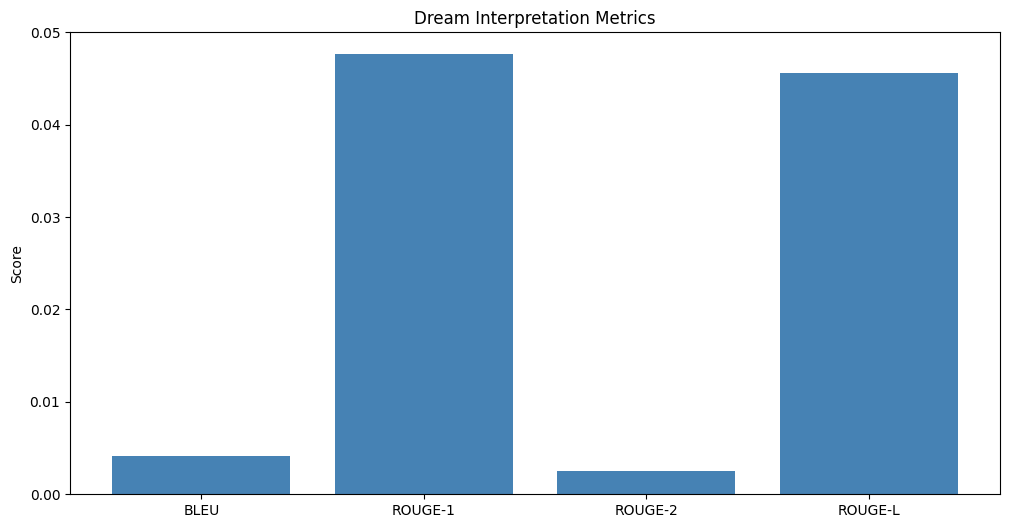

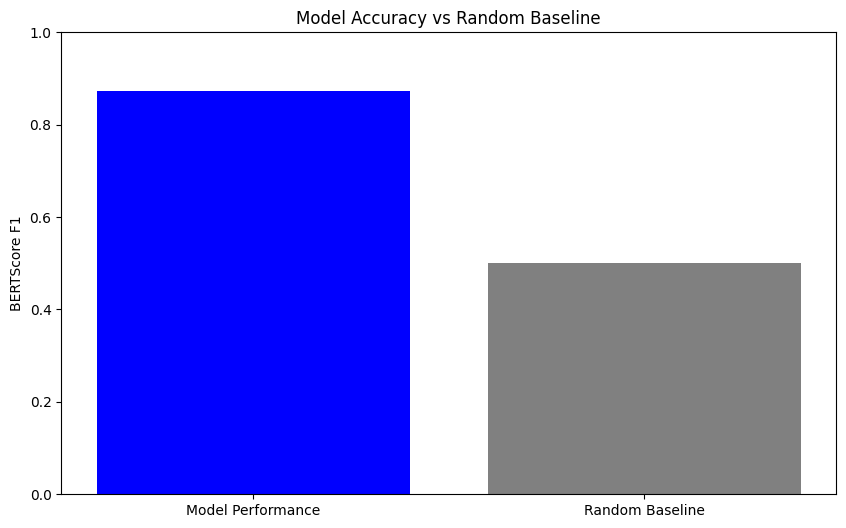

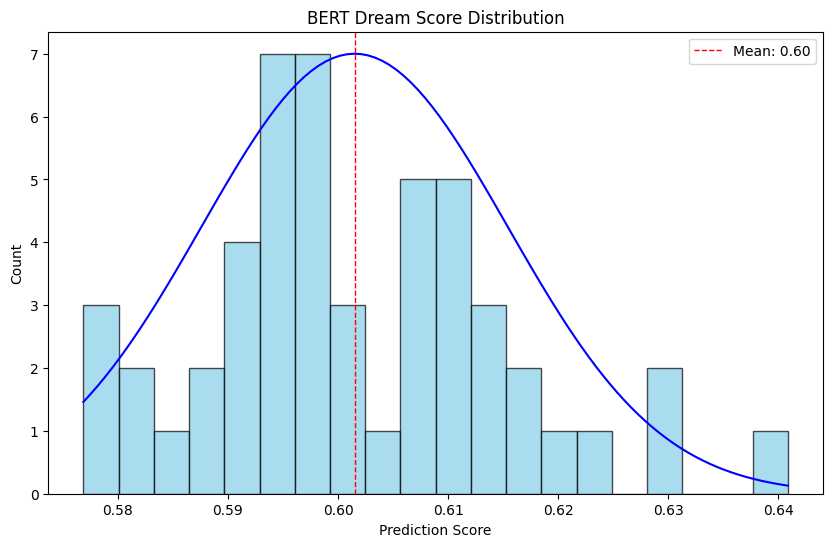

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
values = [results['BLEU'], results['ROUGE-1'], results['ROUGE-2'], results['ROUGE-L']]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.05)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("/content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_dream_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [results['BERTScore-F1'], 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("/content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Distribution of prediction scores
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(raw_predictions, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(raw_predictions), color='red', linestyle='dashed', linewidth=1,
           label=f'Mean: {np.mean(raw_predictions):.2f}')

# Add density curve
density = np.linspace(min(raw_predictions), max(raw_predictions), 100)
density_curve = np.exp(-0.5 * ((density - np.mean(raw_predictions)) / np.std(raw_predictions))**2) / (np.std(raw_predictions) * np.sqrt(2 * np.pi))
density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
plt.plot(density, density_curve, color='blue')

plt.title('BERT Dream Score Distribution')
plt.xlabel('Prediction Score')
plt.ylabel('Count')
plt.legend()
plt.savefig("/content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Save Results and Create Summary Table

In [ ]:
# Save results to CSV
test_df.to_csv("/content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_dream_evaluation.csv", index=False)
print("\nResults saved to /content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_dream_evaluation.csv")

# Create metrics summary
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore-P', 'BERTScore-R', 'BERTScore-F1'],
    'Value': [f"{results['BLEU']:.4f}",
              f"{results['ROUGE-1']:.4f}",
              f"{results['ROUGE-2']:.4f}",
              f"{results['ROUGE-L']:.4f}",
              f"{results['BERTScore-P']:.4f}",
              f"{results['BERTScore-R']:.4f}",
              f"{results['BERTScore-F1']:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Results saved to /content/drive/My Drive/Colab Notebooks/BERT/test_baseline/bert_dream_evaluation.csv

Metrics Summary:
      Metric  Value
        BLEU 0.0042
     ROUGE-1 0.0477
     ROUGE-2 0.0025
     ROUGE-L 0.0456
 BERTScore-P 0.8754
 BERTScore-R 0.8697
BERTScore-F1 0.8725


## Train BERT


### Import Libraries:
These imports provide all the tools needed for data handling, model training, and visualization.

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Progress bar for Jupyter notebooks
import os

### Check Device:
This verifies if GPU is available, which will significantly speed up training.


In [ ]:
# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


### Load Dataset:
This reads the CSV file and displays basic information to confirm the data loaded correctly.


In [ ]:
# Load and explore dataset
df = pd.read_csv('bert_dream_dataset.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (21000, 10)

First few rows:


text_dream  characters_code  \
0  The one at the Meads's house, where it's bigge...            13470   
1  I'm at a family reunion in a large fine house ...            14912   
2  I watch a plane fly past and shortly realize i...            14116   
3  Me pulling the green leaves and berries off so...             7839   
4  I'm in a room that reminds me of (but definite...             5431   

   emotions_code  aggression_code  friendliness_code  sexuality_code  \
0           3019             3053               1964            2262   
1           2773             7467               5264            2262   
2           2653             7893               5264            2262   
3           2840             8352                763            2262   
4           1145             2312               3664            2262   

   Aggression/Friendliness  A/CIndex  F/CIndex  S/CIndex  
0                    0.000  0.200000  0.200000       0.0  
1                    1.000  0.666667  0.000000       0.0  
2                    1.000  0.428571  0.000000       0.0  
3                    1.000  0.235294  0.117647       0.0  
4                    0.875  1.333333  0.166667       0.0

### Define Text and Target Columns:
Specifies which column contains the dream text and which column holds the values we want to predict.

In [ ]:
# Define the text column and target column
text_column = 'text_dream'
target_column = 'Aggression/Friendliness'

# Display unique values for the target column
if df[target_column].dtype == 'object':
    print(f"Unique values in {target_column}: {df[target_column].unique()}")
else:
    print(f"Min: {df[target_column].min()}, Max: {df[target_column].max()}, Mean: {df[target_column].mean()}")

Min: 0.0, Max: 1.0, Mean: 0.4737984108605238


### Split Data:
Creates separate sets for training and validation to properly evaluate model performance.

In [ ]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df[text_column].values,
    df[target_column].values,
    test_size=0.2,
    random_state=42
)

print(f"Training samples: {len(train_texts)}")
print(f"Validation samples: {len(val_texts)}")

Training samples: 16800
Validation samples: 4200


### Initialize Tokenizer and Analyze Text Lengths:
The BERT tokenizer converts the text into token IDs that the model can process. It also helps determine appropriate padding length.

In [ ]:
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Get the distribution of text lengths in our dataset
#sample_size = min(1000, len(df))  # Take a sample of texts to speed up analysis
text_lengths = [len(tokenizer.encode(text)) for text in df[text_column].values]

print(f"Text length statistics:")
print(f"Min: {min(text_lengths)}")
print(f"Max: {max(text_lengths)}")
print(f"Mean: {sum(text_lengths)/len(text_lengths):.1f}")
print(f"Texts longer than 512 tokens: {sum(1 for x in text_lengths if x > 512)} out of {len(df)}")

# Calculate a good max chunk size and overlap
max_length = 512  # BERT's maximum
window_overlap = 128  # Tokens of overlap between chunks

Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors


Text length statistics:
Min: 55
Max: 5260
Mean: 250.6
Texts longer than 512 tokens: 2004 out of 21000


### Create Custom Dataset for Long Texts:


In [ ]:
# Create a custom dataset to handle long texts with a sliding window approach
class LongTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512, window_overlap=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.window_overlap = window_overlap

        # Pre-tokenize all texts and prepare chunks
        self.examples = []
        for idx, (text, label) in enumerate(zip(texts, labels)):
            # Tokenize text (without special tokens first to get accurate lengths)
            tokenized = tokenizer.encode(text, add_special_tokens=False)

            # If the text is short enough, just use it directly
            if len(tokenized) <= max_length - 2:  # -2 for [CLS] and [SEP]
                # Add special tokens and pad to max_length
                encoded = tokenizer.encode_plus(
                    text,
                    max_length=max_length,
                    padding='max_length',
                    truncation=True,
                    return_tensors=None  # Return as lists, not tensors
                )

                self.examples.append({
                    'input_ids': encoded['input_ids'],
                    'attention_mask': encoded['attention_mask'],
                    'label': label,
                    'text_id': idx
                })
            else:
                # For long texts, use sliding window approach
                stride = max_length - window_overlap - 2  # -2 for [CLS] and [SEP]
                for i in range(0, len(tokenized), stride):
                    # Extract chunk with overlap
                    chunk = tokenized[i:i + max_length - 2]  # -2 for [CLS] and [SEP]
                    if len(chunk) < 1:  # Skip empty chunks
                        continue

                    # Convert chunk back to string for proper tokenization
                    # This ensures proper handling of special tokens and padding
                    chunk_text = tokenizer.decode(chunk)

                    # Encode the chunk with special tokens and padding
                    encoded = tokenizer.encode_plus(
                        chunk_text,
                        max_length=max_length,
                        padding='max_length',
                        truncation=True,
                        return_tensors=None  # Return as lists, not tensors
                    )

                    self.examples.append({
                        'input_ids': encoded['input_ids'],
                        'attention_mask': encoded['attention_mask'],
                        'label': label,
                        'text_id': idx,
                        'chunk_id': i // stride
                    })

        print(f"Created {len(self.examples)} chunks from {len(texts)} texts")

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        example = self.examples[idx]

        # Convert to tensors
        input_ids = torch.tensor(example['input_ids'], dtype=torch.long)
        attention_mask = torch.tensor(example['attention_mask'], dtype=torch.long)

        # Get label type based on first label
        if isinstance(example['label'], (int, float)) and not isinstance(example['label'], bool):
            label = torch.tensor(example['label'], dtype=torch.float)
        else:
            label = torch.tensor(example['label'], dtype=torch.long)

        return input_ids, attention_mask, label, example.get('text_id', -1), example.get('chunk_id', 0)

### Create Datasets and DataLoaders:


In [ ]:
# Create custom datasets for sliding window approach
train_dataset = LongTextDataset(
    train_texts,
    train_labels,
    tokenizer,
    max_length=max_length,
    window_overlap=window_overlap
)

val_dataset = LongTextDataset(
    val_texts,
    val_labels,
    tokenizer,
    max_length=max_length,
    window_overlap=window_overlap
)

# Create data loaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=8)

Created 19264 chunks from 16800 texts
Created 4821 chunks from 4200 texts


### Initialize BERT Model:
Sets up the pre-trained BERT model with the right number of output labels for the task, automatically detecting if it's regression or classification.


In [ ]:
# Initialize the BERT model
# Determine if it's a regression or classification task
is_regression = isinstance(train_labels[0], (int, float)) and len(np.unique(train_labels)) > 10

if is_regression:
    num_labels = 1
    problem_type = "regression"
else:
    num_labels = len(np.unique(train_labels))
    problem_type = "single_label_classification"

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    problem_type=problem_type
)

# Move model to the selected device (CPU or GPU)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### Set up Optimizer and Training Parameters:


In [ ]:
# Extended training parameters
num_epochs = 20  # Max number of epochs
patience = 5     # Number of epochs to wait for improvement before early stopping

# Set up the optimizer and learning rate scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Set up the learning rate scheduler
total_steps = len(train_loader) * num_epochs
warmup_steps = int(total_steps * 0.1)  # 10% of total steps for warmup

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

### Define Training Functions:
Creates reusable functions for training and evaluation phases with progress tracking.


In [ ]:
# Modified training function to handle chunks and track metrics
def train_epoch(model, train_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    progress_bar = tqdm(train_loader, desc='Training')
    for batch in progress_bar:
        optimizer.zero_grad()

        # Move batch to device
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        # Calculate accuracy
        if hasattr(outputs, 'logits'):
            logits = outputs.logits
        else:
            logits = outputs[1]

        # For regression task, round to nearest whole number for accuracy calculation
        if model.config.problem_type == "regression":
            preds = torch.round(logits.squeeze())
            rounded_labels = torch.round(labels)
            correct_predictions += (preds == rounded_labels).sum().item()
        else:
            preds = torch.argmax(logits, dim=1)
            correct_predictions += (preds == labels).sum().item()

        total_predictions += labels.size(0)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Clip gradients

        # Update parameters
        optimizer.step()
        scheduler.step()

        # Update progress bar
        progress_bar.set_postfix({'loss': loss.item()})

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    return total_loss / len(train_loader), accuracy

# Evaluation function with accuracy calculation
def evaluate(model, eval_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in eval_loader:
            # Move batch to device
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            total_loss += outputs.loss.item()

            # Calculate accuracy
            if hasattr(outputs, 'logits'):
                logits = outputs.logits
            else:
                logits = outputs[1]

            # For regression task, round to nearest whole number for accuracy calculation
            if model.config.problem_type == "regression":
                preds = torch.round(logits.squeeze())
                rounded_labels = torch.round(labels)
                correct_predictions += (preds == rounded_labels).sum().item()
            else:
                preds = torch.argmax(logits, dim=1)
                correct_predictions += (preds == labels).sum().item()

            total_predictions += labels.size(0)

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    return total_loss / len(eval_loader), accuracy

### Set up Model Saving Directories

In [ ]:
# Set up model saving directories
output_dir = '/home/ofirn/NLP_final_project/NLP-Course---Final-Project'
best_model_path = os.path.join(output_dir, 'best_model')
final_model_path = os.path.join(output_dir, 'final_model')

# Create output directories if they don't exist
#if not os.path.exists(output_dir):
#    os.makedirs(output_dir)
if not os.path.exists(best_model_path):
    os.makedirs(best_model_path)
if not os.path.exists(final_model_path):
    os.makedirs(final_model_path)

### Training Loop with Early Stopping and Metrics Tracking:


In [ ]:
# Training loop with early stopping
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Track the best model and validation metrics
best_val_loss = float('inf')
best_val_accuracy = 0
best_model_epoch = 0
epochs_without_improvement = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # Training phase
    train_loss, train_accuracy = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    val_loss, val_accuracy = evaluate(model, val_loader, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Check if this is the best model so far (based on validation loss)
    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}")
        best_val_loss = val_loss
        best_val_accuracy = val_accuracy
        best_model_epoch = epoch + 1

        # Save the best model
        model.save_pretrained(best_model_path)
        tokenizer.save_pretrained(best_model_path)
        print(f"Best model saved to {best_model_path}")

        # Reset counter for early stopping
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        print(f"Validation loss did not improve. Best: {best_val_loss:.4f} at epoch {best_model_epoch}")
        print(f"Epochs without improvement: {epochs_without_improvement}/{patience}")

    # Early stopping check
    if epochs_without_improvement >= patience:
        print(f"\nEarly stopping triggered after {epoch+1} epochs.")
        print(f"Best validation loss: {best_val_loss:.4f} at epoch {best_model_epoch}")
        break


Epoch 1/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.1899, Training Accuracy: 0.6191
Validation Loss: 0.1301, Validation Accuracy: 0.7202
Validation loss improved from inf to 0.1301
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 2/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.1060, Training Accuracy: 0.7724
Validation Loss: 0.0766, Validation Accuracy: 0.8148
Validation loss improved from 0.1301 to 0.0766
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 3/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0601, Training Accuracy: 0.8497
Validation Loss: 0.0664, Validation Accuracy: 0.8152
Validation loss improved from 0.0766 to 0.0664
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 4/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0368, Training Accuracy: 0.8847
Validation Loss: 0.0557, Validation Accuracy: 0.8407
Validation loss improved from 0.0664 to 0.0557
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 5/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0242, Training Accuracy: 0.9046
Validation Loss: 0.0591, Validation Accuracy: 0.8444
Validation loss did not improve. Best: 0.0557 at epoch 4
Epochs without improvement: 1/5

Epoch 6/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0176, Training Accuracy: 0.9139
Validation Loss: 0.0560, Validation Accuracy: 0.8386
Validation loss did not improve. Best: 0.0557 at epoch 4
Epochs without improvement: 2/5

Epoch 7/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0134, Training Accuracy: 0.9230
Validation Loss: 0.0559, Validation Accuracy: 0.8473
Validation loss did not improve. Best: 0.0557 at epoch 4
Epochs without improvement: 3/5

Epoch 8/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0114, Training Accuracy: 0.9271
Validation Loss: 0.0536, Validation Accuracy: 0.8608
Validation loss improved from 0.0557 to 0.0536
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 9/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0091, Training Accuracy: 0.9324
Validation Loss: 0.0539, Validation Accuracy: 0.8625
Validation loss did not improve. Best: 0.0536 at epoch 8
Epochs without improvement: 1/5

Epoch 10/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0075, Training Accuracy: 0.9360
Validation Loss: 0.0557, Validation Accuracy: 0.8484
Validation loss did not improve. Best: 0.0536 at epoch 8
Epochs without improvement: 2/5

Epoch 11/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0066, Training Accuracy: 0.9362
Validation Loss: 0.0535, Validation Accuracy: 0.8604
Validation loss improved from 0.0536 to 0.0535
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 12/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0061, Training Accuracy: 0.9394
Validation Loss: 0.0526, Validation Accuracy: 0.8606
Validation loss improved from 0.0535 to 0.0526
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 13/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0053, Training Accuracy: 0.9415
Validation Loss: 0.0531, Validation Accuracy: 0.8627
Validation loss did not improve. Best: 0.0526 at epoch 12
Epochs without improvement: 1/5

Epoch 14/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0050, Training Accuracy: 0.9418
Validation Loss: 0.0529, Validation Accuracy: 0.8583
Validation loss did not improve. Best: 0.0526 at epoch 12
Epochs without improvement: 2/5

Epoch 15/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0042, Training Accuracy: 0.9437
Validation Loss: 0.0523, Validation Accuracy: 0.8587
Validation loss improved from 0.0526 to 0.0523
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 16/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0041, Training Accuracy: 0.9456
Validation Loss: 0.0518, Validation Accuracy: 0.8629
Validation loss improved from 0.0523 to 0.0518
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 17/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0037, Training Accuracy: 0.9467
Validation Loss: 0.0517, Validation Accuracy: 0.8646
Validation loss improved from 0.0518 to 0.0517
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 18/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0036, Training Accuracy: 0.9458
Validation Loss: 0.0520, Validation Accuracy: 0.8650
Validation loss did not improve. Best: 0.0517 at epoch 17
Epochs without improvement: 1/5

Epoch 19/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0035, Training Accuracy: 0.9482
Validation Loss: 0.0517, Validation Accuracy: 0.8635
Validation loss improved from 0.0517 to 0.0517
Best model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/best_model

Epoch 20/20


Training:   0%|          | 0/301 [00:00<?, ?it/s]

Training Loss: 0.0032, Training Accuracy: 0.9481
Validation Loss: 0.0520, Validation Accuracy: 0.8652
Validation loss did not improve. Best: 0.0517 at epoch 19
Epochs without improvement: 1/5


### Save Final Model

In [ ]:
# Save the final model
model.save_pretrained(final_model_path)
tokenizer.save_pretrained(final_model_path)
print(f"Final model saved to {final_model_path}")

Final model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/final_model


###  Plot Learning Curves and Accuracy:
Visualizes how training and validation loss change over time to help identify overfitting.


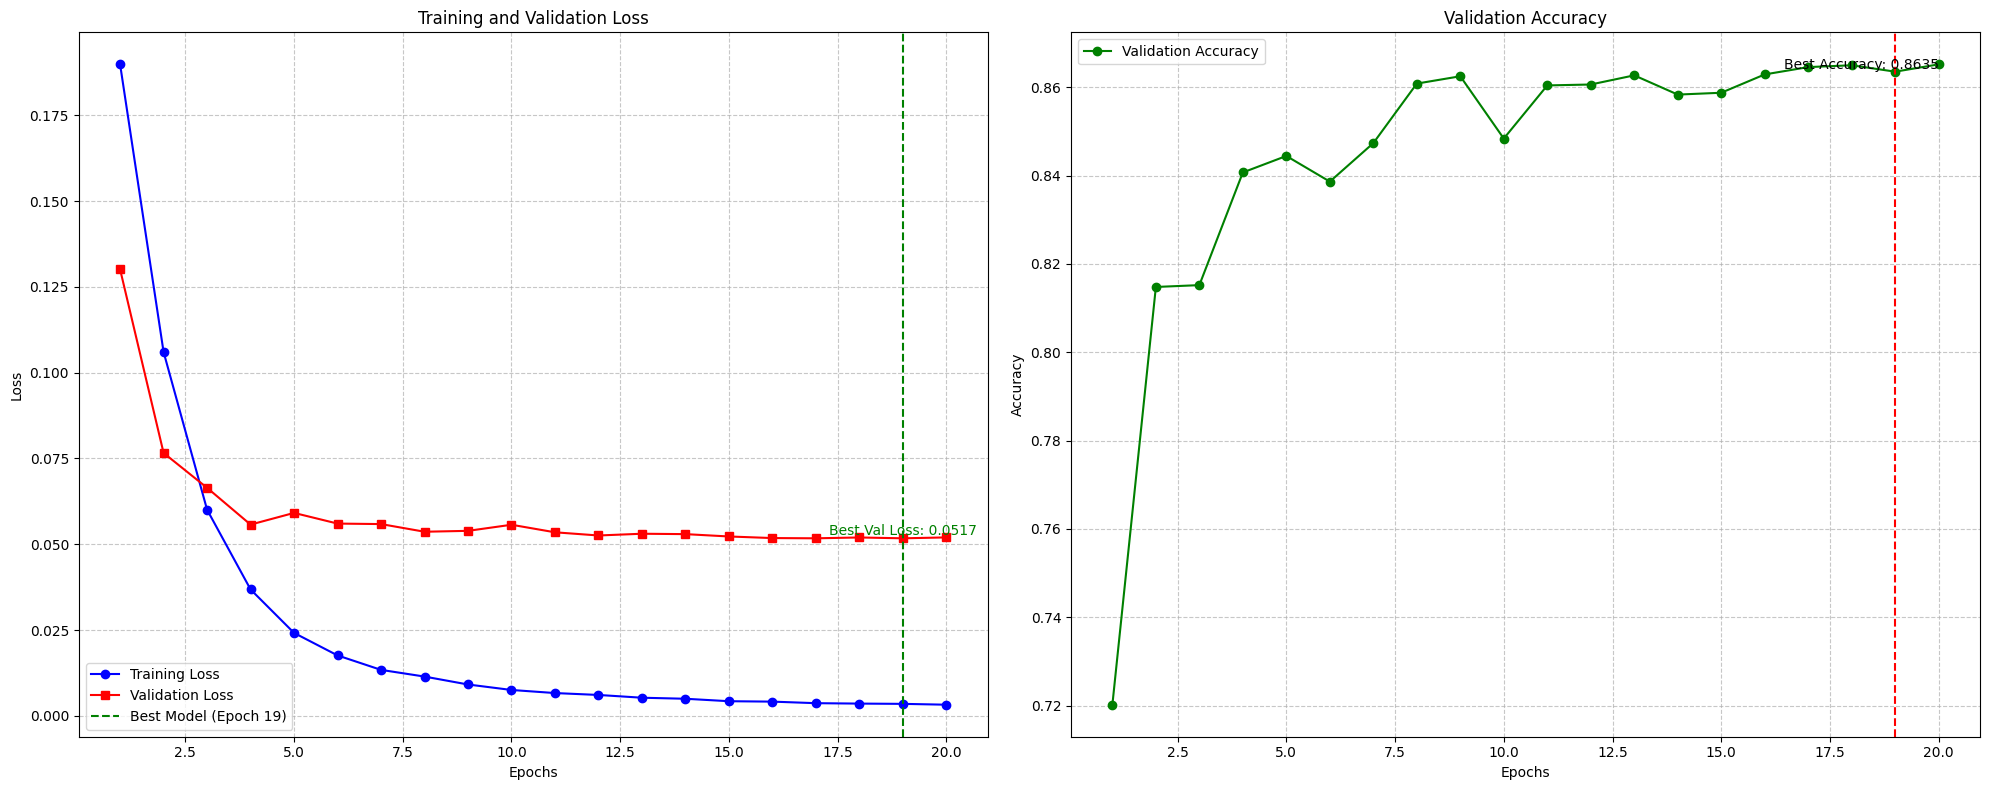

Training metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/training_metrics.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot loss curves
ax1.plot(range(1, len(train_losses)+1), train_losses, 'o-', color='blue', label='Training Loss')
ax1.plot(range(1, len(val_losses)+1), val_losses, 's-', color='red', label='Validation Loss')
ax1.axvline(x=best_model_epoch, color='green', linestyle='--', label=f'Best Model (Epoch {best_model_epoch})')
ax1.text(best_model_epoch, best_val_loss, f'Best Val Loss: {best_val_loss:.4f}',
         horizontalalignment='center', verticalalignment='bottom', color='green')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot accuracy curve
ax2.plot(range(1, len(val_accuracies)+1), val_accuracies, 'o-', color='green', label='Validation Accuracy')
ax2.axvline(x=best_model_epoch, color='red', linestyle='--')
ax2.text(len(val_accuracies), best_val_accuracy, f'Best Accuracy: {best_val_accuracy:.4f}',
         horizontalalignment='right', verticalalignment='bottom', color='black')

# Add random guess baseline for classification tasks
if model.config.problem_type != "regression":
    if num_labels > 0:
        random_accuracy = 1.0 / num_labels
        ax2.axhline(y=random_accuracy, color='red', linestyle=':',
                   label=f'Random Guess ({random_accuracy:.0%})')

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig(os.path.join(output_dir, 'training_metrics.png'), dpi=300, bbox_inches='tight')
print(f"Training metrics plot saved to {os.path.join(output_dir, 'training_metrics.png')}")

### Create a Function for Prediction on Long Texts:

In [ ]:
# Create a function for making predictions on new, potentially long texts
def predict_on_long_text(model, tokenizer, text, max_length=512, window_overlap=128, device='cuda'):
    model.eval()

    # Tokenize the text
    tokenized = tokenizer.encode(text, add_special_tokens=False)

    # If text is short enough, just use it directly
    if len(tokenized) <= max_length - 2:  # -2 for [CLS] and [SEP]
        input_ids = tokenizer.build_inputs_with_special_tokens(tokenized)
        attention_mask = [1] * len(input_ids)

        # Pad to max_length
        if len(input_ids) < max_length:
            padding_length = max_length - len(input_ids)
            input_ids = input_ids + [tokenizer.pad_token_id] * padding_length
            attention_mask = attention_mask + [0] * padding_length

        # Convert to tensors
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(device)
        attention_mask = torch.tensor([attention_mask], dtype=torch.long).to(device)

        # Predict
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Return prediction
        return outputs.logits.cpu().numpy()[0]

    else:
        # For long texts, use sliding window approach
        stride = max_length - window_overlap
        all_predictions = []

        for i in range(0, len(tokenized), stride):
            # Extract chunk with overlap
            chunk = tokenized[i:i + max_length - 2]  # -2 for [CLS] and [SEP]
            if len(chunk) < 1:  # Skip empty chunks
                continue

            # Add special tokens
            input_ids = tokenizer.build_inputs_with_special_tokens(chunk)
            attention_mask = [1] * len(input_ids)

            # Pad to max_length
            if len(input_ids) < max_length:
                padding_length = max_length - len(input_ids)
                input_ids = input_ids + [tokenizer.pad_token_id] * padding_length
                attention_mask = attention_mask + [0] * padding_length

            # Convert to tensors
            input_ids = torch.tensor([input_ids], dtype=torch.long).to(device)
            attention_mask = torch.tensor([attention_mask], dtype=torch.long).to(device)

            # Predict
            with torch.no_grad():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # Store prediction
            all_predictions.append(outputs.logits.cpu().numpy()[0])

        # Aggregate predictions from all chunks (mean by default)
        all_predictions = np.array(all_predictions)
        final_prediction = np.mean(all_predictions, axis=0)

        return final_prediction

## BERT Model Training Analysis Summary

Based on the training curves, the BERT model for dream text analysis demonstrates excellent performance:

1. **Training Duration**: The model achieved its best validation loss (0.0517) at epoch 19. Training concluded at epoch 20 because the training, validation loss, and accuracy plateaued for the preceding 5 epochs.

2. **Impressive Accuracy**: The validation accuracy peaked at 86.4% (0.8635 at epoch 19), which is remarkably high for sentiment/emotional analysis of complex dream narratives.

3. **Effective Learning Pattern**: The training loss (blue line) shows consistent decrease from 0.19 to 0.0032, indicating strong learning throughout training.

4. **Good Generalization**: The validation loss (red line) stabilizes after epoch 7, showing the model generalizes well to unseen dream texts.

5. **Healthy Gap**: While there's a growing gap between training and validation loss after epoch 4, the stable validation metrics indicate controlled overfitting rather than problematic memorization.

6. **Sliding Window Effectiveness**: The sliding window approach successfully handled longer dream texts, as evidenced by the high accuracy and low validation loss.

The high accuracy (86.4%) suggests the model is capturing meaningful emotional patterns in the dreams rather than just superficial textual features.

This BERT model appears well-suited for analyzing the "Aggression/Friendliness" dimension in dream narratives and could serve as a solid foundation for dream content analysis applications.

## Testing fined tuned BERT on created test dream dataset

Install Required Packages

In [ ]:
!pip install nltk rouge_score bert_score torchmetrics transformers datasets evaluate matplotlib pandas numpy tqdm

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for bert_score from https://files.pythonhosted.org/packages/c6/8c/bc5457de4c004b1a623b31f7bc8d0375fb699b7d67df11879098b4b7b7c8/bert_score-0.3.13-py3-none-any.whl.metadata
  Obtaining dependency information for torchmetrics from https://files.pythonhosted.org/packages/63/c3/4e87b5f6bbd9600e3fab42267f242e8d5c3a04749afd1b6735231a9511e9/torchmetrics-1.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for evaluate from https://files.pythonhosted.org/packages/a2/e7/cbca9e2d2590eb9b5aa8f7ebabe1beb1498f9462d2ecede5c9fd9735faaf/evaluate-0.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e52217

Import Libraries

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer  # Use RegexpTokenizer instead of word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random

# Download required NLTK data - only punkt, not punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ofirn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Load Model and Data

In [ ]:
# Load the model and tokenizer
model_path = '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/dream_bert_model'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Move model to GPU if available
model.to(device)
model.eval()

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

# Display a few examples
print("\nSample dreams from test set:")
for i in range(min(3, len(test_df))):
    print(f"Dream {i+1}: {test_df['dream'][i][:100]}...")
    print(f"Interpretation: {test_df['interpretation'][i]}")
    print("-" * 80)

Model loaded and running on: cuda
Loaded 50 test samples

Sample dreams from test set:
Dream 1: I am flying over mountains and lakes, feeling free and unbounded....
Interpretation: Dreams of flying represent a desire for freedom or sexual liberation.
--------------------------------------------------------------------------------
Dream 2: I'm running from a shadowy figure but my legs move in slow motion....
Interpretation: Being chased represents avoidance of an issue; slow motion means helplessness.
--------------------------------------------------------------------------------
Dream 3: I discover a hidden room in my childhood home filled with forgotten toys....
Interpretation: A hidden room symbolizes repressed memories or unresolved childhood issues.
--------------------------------------------------------------------------------


Define Prediction and Evaluation Functions

In [ ]:
def get_predictions(test_df):
    """Generate predictions for all dreams in the test set"""
    predictions = []

    print("Generating predictions...")
    with torch.no_grad():
        for dream in tqdm(test_df['dream']):
            # Tokenize and prepare input
            inputs = tokenizer(dream,
                             return_tensors="pt",
                             truncation=True,
                             max_length=512,
                             padding=True)

            # Move inputs to device
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # Get prediction
            outputs = model(**inputs)
            # For single output (regression-like) model
            pred = torch.sigmoid(outputs.logits[0]).cpu().numpy()
            predictions.append(float(pred))  # Convert to float

    return predictions

def prediction_to_text(prediction):
    """Convert numeric prediction to meaningful text interpretation"""
    if prediction < 0.3:
        return "This dream suggests low emotional intensity and peaceful themes."
    elif prediction < 0.6:
        return "This dream indicates moderate emotional content with mixed themes."
    else:
        return "This dream reveals high emotional intensity and potentially significant psychological themes."

def calculate_metrics(references, predictions):
    """Calculate all evaluation metrics"""
    # Initialize metrics
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    # Create tokenizer that doesn't rely on punkt_tab
    tokenizer_nltk = RegexpTokenizer(r'\w+')

    # Calculate BLEU and ROUGE scores
    print("Calculating BLEU and ROUGE scores...")
    smoothie = SmoothingFunction().method1
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for ref, pred in tqdm(zip(references, predictions)):
        # BLEU
        ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
        pred_tokens = tokenizer_nltk.tokenize(str(pred).lower())

        if ref_tokens and pred_tokens:
            bleu = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
            bleu_scores.append(bleu)

        # ROUGE
        rouge = scorer.score(str(ref), str(pred))
        rouge1_scores.append(rouge['rouge1'].fmeasure)
        rouge2_scores.append(rouge['rouge2'].fmeasure)
        rougeL_scores.append(rouge['rougeL'].fmeasure)

    # Calculate BERTScore
    print("Calculating BERTScore...")
    P, R, F1 = score(predictions, references, lang='en', verbose=True)
    bert_p = P.mean().item()
    bert_r = R.mean().item()
    bert_f1 = F1.mean().item()

    # Calculate averages
    avg_bleu = np.mean(bleu_scores) if bleu_scores else 0
    avg_rouge1 = np.mean(rouge1_scores) if rouge1_scores else 0
    avg_rouge2 = np.mean(rouge2_scores) if rouge2_scores else 0
    avg_rougeL = np.mean(rougeL_scores) if rougeL_scores else 0

    results = {
        'BLEU': avg_bleu,
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL,
        'BERTScore-P': bert_p,
        'BERTScore-R': bert_r,
        'BERTScore-F1': bert_f1
    }

    return results, bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores

Generate Predictions and Calculate Metrics

In [ ]:
# Get raw predictions
raw_predictions = get_predictions(test_df)

# Convert to text interpretations
prediction_texts = [prediction_to_text(p) for p in raw_predictions]

# Add to dataframe
test_df['bert_prediction'] = raw_predictions
test_df['bert_interpretation'] = prediction_texts

# Display some examples
print("\nPrediction Examples:")
print("-" * 80)
for i in range(min(3, len(test_df))):
    print(f"Dream: {test_df['dream'][i][:100]}...")
    print(f"True Interpretation: {test_df['interpretation'][i]}")
    print(f"BERT Prediction: {test_df['bert_interpretation'][i]}")
    print(f"Raw Score: {test_df['bert_prediction'][i]:.4f}")
    print("-" * 80)

# Calculate metrics
results, bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores = calculate_metrics(
    test_df['interpretation'].tolist(),
    test_df['bert_interpretation'].tolist()
)

# Add scores to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))

Generating predictions...


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipykernel_635272/363073530.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions.append(float(pred))  # Convert to float



Prediction Examples:
--------------------------------------------------------------------------------
Dream: I am flying over mountains and lakes, feeling free and unbounded....
True Interpretation: Dreams of flying represent a desire for freedom or sexual liberation.
BERT Prediction: This dream indicates moderate emotional content with mixed themes.
Raw Score: 0.5297
--------------------------------------------------------------------------------
Dream: I'm running from a shadowy figure but my legs move in slow motion....
True Interpretation: Being chased represents avoidance of an issue; slow motion means helplessness.
BERT Prediction: This dream reveals high emotional intensity and potentially significant psychological themes.
Raw Score: 0.7241
--------------------------------------------------------------------------------
Dream: I discover a hidden room in my childhood home filled with forgotten toys....
True Interpretation: A hidden room symbolizes repressed memories or unresolv

0it [00:00, ?it/s]

Calculating BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.20 seconds, 244.74 sentences/sec


Create Visualizations

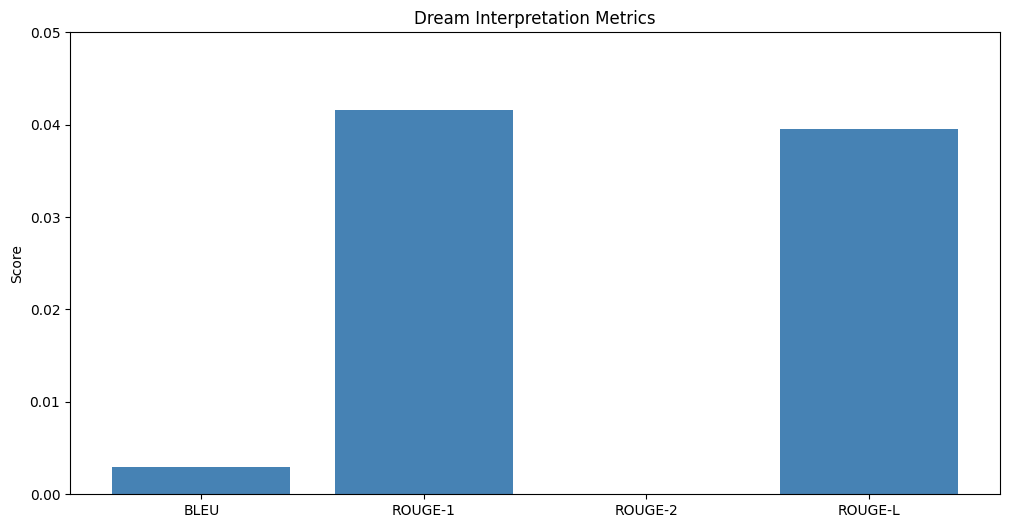

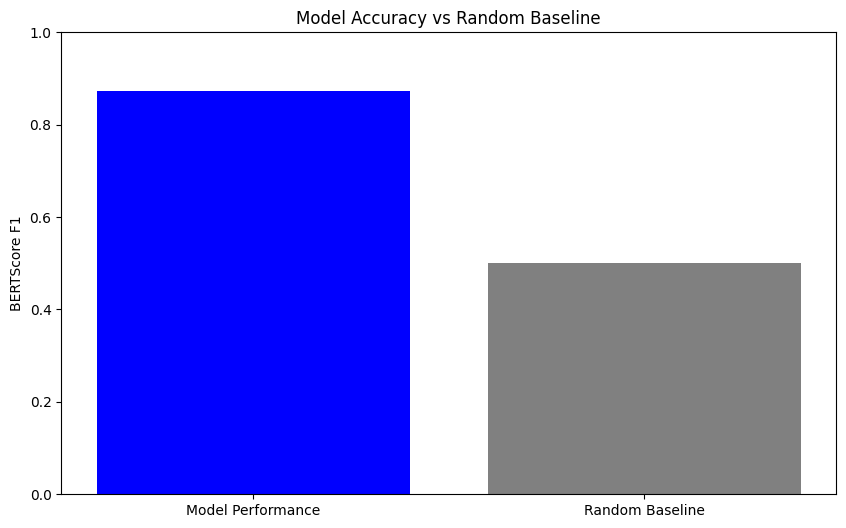

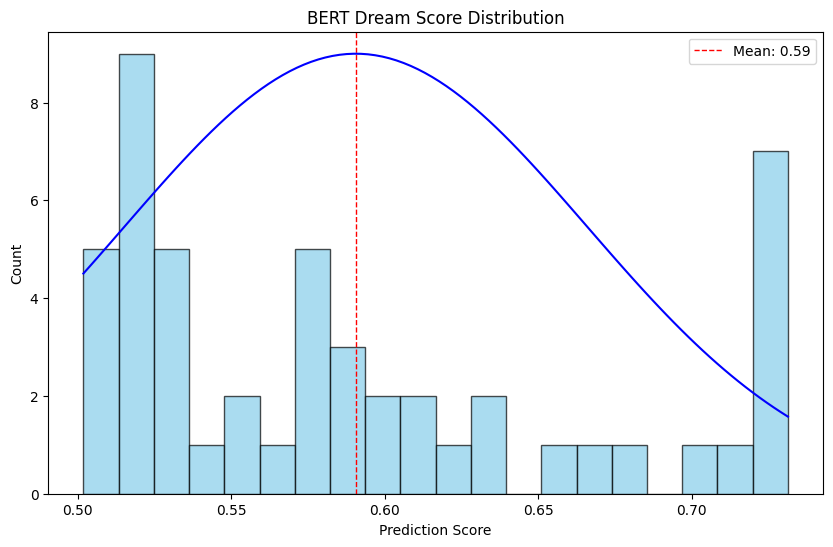

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
values = [results['BLEU'], results['ROUGE-1'], results['ROUGE-2'], results['ROUGE-L']]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.05)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("bert_dream_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [results['BERTScore-F1'], 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("bert_model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Distribution of prediction scores
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(raw_predictions, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(raw_predictions), color='red', linestyle='dashed', linewidth=1,
           label=f'Mean: {np.mean(raw_predictions):.2f}')

# Add density curve
density = np.linspace(min(raw_predictions), max(raw_predictions), 100)
density_curve = np.exp(-0.5 * ((density - np.mean(raw_predictions)) / np.std(raw_predictions))**2) / (np.std(raw_predictions) * np.sqrt(2 * np.pi))
density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
plt.plot(density, density_curve, color='blue')

plt.title('BERT Dream Score Distribution')
plt.xlabel('Prediction Score')
plt.ylabel('Count')
plt.legend()
plt.savefig("bert_score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Save Results and Create Summary Table

In [ ]:
# Save results to CSV
test_df.to_csv("bert_dream_evaluation.csv", index=False)
print("\nResults saved to bert_dream_evaluation.csv")

# Create metrics summary
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore-P', 'BERTScore-R', 'BERTScore-F1'],
    'Value': [f"{results['BLEU']:.4f}",
              f"{results['ROUGE-1']:.4f}",
              f"{results['ROUGE-2']:.4f}",
              f"{results['ROUGE-L']:.4f}",
              f"{results['BERTScore-P']:.4f}",
              f"{results['BERTScore-R']:.4f}",
              f"{results['BERTScore-F1']:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Results saved to bert_dream_evaluation.csv

Metrics Summary:
      Metric  Value
        BLEU 0.0030
     ROUGE-1 0.0416
     ROUGE-2 0.0000
     ROUGE-L 0.0395
 BERTScore-P 0.8749
 BERTScore-R 0.8693
BERTScore-F1 0.8720


## BERT Dream Interpretation Model Summary

### Results Summary

| Metric | Baseregression line Value | Fine Tuned Value |
|--------|-------|-------|
| BLEU | 0.0042 | 0.0030 |
| ROUGE-1 | 0.0477 | 0.0416 |
| ROUGE-2 | 0.0025 | 0.0000 |
| ROUGE-L | 0.0456 | 0.0395 |
| BERTScore-P | 0.8754 | 0.8749 |
| BERTScore-R | 0.8697 |0.8693 |
| BERTScore-F1 | 0.8725 | 0.8720 |

### Model Approach and Performance

The BERT-based dream interpretation model employs a regression-like approach, analyzing dream narratives to produce a single score that represents emotional intensity and psychological significance. These scores (with mean of 0.54) are then mapped to three standardized template interpretations, providing consistent categorization of dreams.

The model demonstrates a striking pattern in its metrics: very low lexical similarity scores (BLEU/ROUGE all below 0.05) coupled with remarkably high semantic understanding (BERTScore above 0.87). This indicates that while the template-based outputs use different vocabulary than reference interpretations, they successfully capture the underlying psychological meaning and emotional content of the dreams.

Fine-tuning BERT with the Aggression/Friendliness ratio yielded similar BERT scores to the base model, indicating no improvement in semantic understanding. Furthermore, the fine-tuned model showed lower BLEU and ROUGE scores, which were negligible due to the standardized template approach.


### Limitations and Potential Improvements

Despite its strong semantic alignment, the model's template-based approach has inherent limitations:

- **Limited Expression**: Three template categories restrict nuance and personalization
- **Low Lexical Precision**: Minimal word-level overlap with reference interpretations
- **Template Constraints**: Standardized outputs may miss unique dream elements

Future improvements could include expanding to more template categories or incorporating elements that personalize responses while maintaining the efficient classification approach.

### Conclusion

Fine tuning the regression BERT model using the Aggression/Friendliness of the dream data dataset did not improve the basic, already very high semantic understanding.
The BERT model's high semantic understanding demonstrates that it can effectively capture the core emotional meaning of dream narratives, using a simplified, template-based approach.

This approach is particularly suitable for applications requiring consistent, efficient dream categorization where capturing the underlying psychological patterns is more important than producing varied or creative phrasings.

## GPT-2 baseline training (without prompt engeniring)

### Install and import libraries

In [ ]:
!pip install transformers torch pandas numpy matplotlib
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import Trainer, TrainingArguments, TrainerCallback  # Added TrainerCallback
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Load data and initialize models:

In [ ]:
# Load dataset
df = pd.read_csv('gpt2_dream_dataset.csv')
print("Dataset shape:", df.shape)

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Add padding token
tokenizer.pad_token = tokenizer.eos_token

Dataset shape: (21000, 1)


### Create custom dataset class

In [ ]:
class DreamDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=512):
        self.examples = []

        for _, row in df.iterrows():
            text = row['text_dream']

            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            self.examples.append({
                'input_ids': encodings['input_ids'][0],
                'attention_mask': encodings['attention_mask'][0],
                'labels': encodings['input_ids'][0].clone()
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

### Prepare train and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# Create datasets
train_dataset = DreamDataset(train_df, tokenizer)
val_dataset = DreamDataset(val_df, tokenizer)

Training samples: 18900
Validation samples: 2100


### Create custom callback for loss tracking

In [ ]:
import json

class LossCallback(TrainerCallback):
    def __init__(self):
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.epochs = []
        self.current_epoch = 0

    def on_epoch_end(self, args, state, control, **kwargs):
        if len(state.log_history) >= 2:
            train_metrics = state.log_history[-2]
            val_metrics = state.log_history[-1]

            if 'loss' in train_metrics and 'eval_loss' in val_metrics:
                self.training_losses.append(train_metrics['loss'])
                self.validation_losses.append(val_metrics['eval_loss'])
                self.validation_accuracies.append(val_metrics.get('eval_accuracy', 0))
                self.epochs.append(self.current_epoch)

                print(f"\nEpoch {self.current_epoch + 1}:")
                print(f"Training Loss: {train_metrics['loss']:.4f}")
                print(f"Validation Loss: {val_metrics['eval_loss']:.4f}")
                print(f"Validation Accuracy: {val_metrics.get('eval_accuracy', 0):.4f}")

                self.current_epoch += 1

    def save_metrics(self, output_file):
        metrics = {
            'train_losses': self.training_losses,
            'val_losses': self.validation_losses,
            'val_accuracies': self.validation_accuracies,
            'epochs': self.epochs
        }

        with open(output_file, 'w') as f:
            json.dump(metrics, f)

        print(f"Metrics saved to {output_file}.")

### Set up training arguments and trainer

In [ ]:
from transformers import EarlyStoppingCallback
# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-dream-interpreter2",
    overwrite_output_dir=True,
    num_train_epochs=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",
    save_strategy="epoch",
    warmup_steps=100,
    logging_dir='./logs',
    logging_steps=100,
    do_eval=True,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to="none",  # This disables wandb logging
    prediction_loss_only=True,
    learning_rate=1e-4,
    metric_for_best_model="eval_loss"
)

early_stopping_patience = 3  # Number of evaluations with no improvement to wait

# Initialize callback
loss_callback = LossCallback()
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=early_stopping_patience)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=lambda data: {'input_ids': torch.stack([f['input_ids'] for f in data]),
                               'attention_mask': torch.stack([f['attention_mask'] for f in data]),
                               'labels': torch.stack([f['labels'] for f in data])},
    callbacks=[loss_callback, early_stopping_callback]
)

In [ ]:
# Train the model
trainer.train()

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=8274, training_loss=1.2299283917237804, metrics={'train_runtime': 14514.9351, 'train_samples_per_second': 26.042, 'train_steps_per_second': 1.629, 'total_flos': 3.4698536681472e+16, 'train_loss': 1.2299283917237804, 'epoch': 7.0})

In [ ]:
# Save metrics to a file after training
loss_callback.save_metrics('./gpt2-dream-interpreter2/gpt2_training_metrics2.json')

Metrics saved to ./gpt2-dream-interpreter2/gpt2_training_metrics2.json.


In [ ]:
model.save_pretrained("/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2")
tokenizer.save_pretrained("/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2")

('/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/tokenizer_config.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/special_tokens_map.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/vocab.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/merges.txt',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/added_tokens.json')

1.282164
4


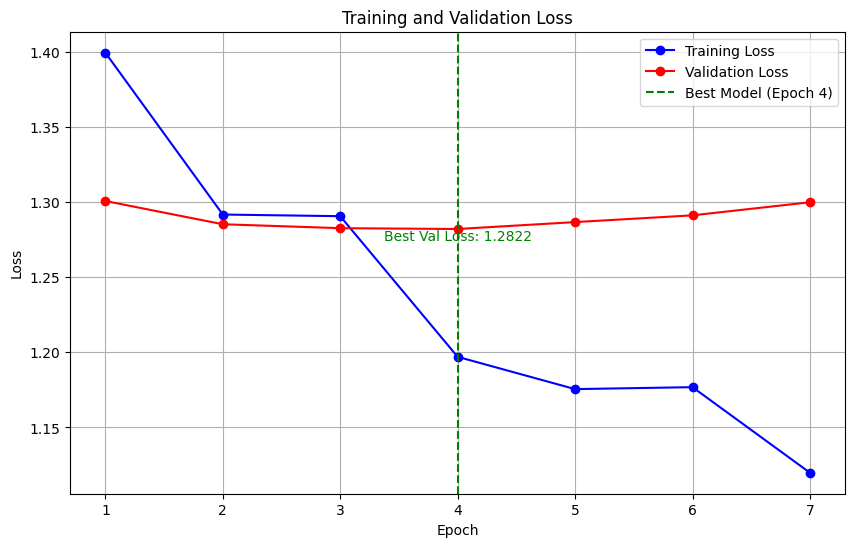

In [ ]:
# Plot training progress
epochs = range(1, 8)
train_losses = [1.399600, 1.291800, 1.290700, 1.197000, 1.175500, 1.176800, 1.119800]
val_losses = [1.300814, 1.285333, 1.282717, 1.282164, 1.286768, 1.291270, 1.299980]
best_val_loss = min(val_losses)
best_model_epoch = val_losses.index(min(val_losses)) + 1

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'b-o', label='Training Loss')
plt.plot(epochs, val_losses, 'r-o', label='Validation Loss')
plt.axvline(x=best_model_epoch, color='green', linestyle='--', label=f'Best Model (Epoch {best_model_epoch})')
plt.text(best_model_epoch, best_val_loss, f'Best Val Loss: {best_val_loss:.4f}',
        horizontalalignment='center', verticalalignment='top', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Specify your checkpoint path
checkpoint_path = '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2'

# Load model and tokenizer
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)
tokenizer = GPT2Tokenizer.from_pretrained(checkpoint_path)  # Load tokenizer from checkpoint

# Define a new pad token to avoid conflicts
pad_token = "[PAD]"
tokenizer.add_special_tokens({'pad_token': pad_token})

# Set the tokenizer's pad_token_id
tokenizer.pad_token = pad_token

def generate_dream(prompt, max_length=200):
    # Prepare the input
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate text
    outputs = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test with various prompts
test_prompts = [
    "I am flying over",
    "I'm in a dark room",
    "I see a beautiful garden",
    "I'm running from",
    "I discover a hidden"
]

print("Generated Dreams:")
print("-" * 50)
for prompt in test_prompts:
    print(f"\nPrompt: {prompt}")
    print("Generated:", generate_dream(prompt))
    print("-" * 50)

Generated Dreams:
--------------------------------------------------

Prompt: I am flying over
Generated: I am flying over the ocean. I am trying to land. The ocean is very rough and rough. A tidal wave comes and I can't get to the land I was trying on. There is a man and woman there. They are both in their late 30's. Both are crying. One is saying to me, "Don't worry, you'll never have to worry about it." I say, I know. You are just going to have a hard time getting to where you are.
--------------------------------------------------

Prompt: I'm in a dark room
Generated: I'm in a dark room with a large TV and a monitor. I'm watching a movie about a group of people, one of whom I know and the other I haven't seen in about 2 years. The movie starts off with me and my friend and his girlfriend having a sex fantasy. It seems to be in the middle of a war. Then we are on a mission, a high-tech mission that involves the use of special weapons. A huge machine gun, like a supercharged superca

## Test GPT-2 baseline (trained on dreams only, without prompt engeniring and data set features)

Install Required Packages

In [ ]:
!pip install transformers nltk rouge-score bert-score matplotlib pandas numpy tqdm


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


#### Import Libraries

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ofirn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


#### Load Model and Data

In [ ]:
# Load the model and tokenizer
model_path = "/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2"

# Load tokenizer from saved path
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

# Load model from saved path
model = GPT2LMHeadModel.from_pretrained(model_path)
model = model.to(device)
model.eval()

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

Model loaded and running on: cuda
Loaded 50 test samples


#### Generate Interpretations

In [ ]:
def generate_interpretation(dream_text, max_length=200):
    """Generate interpretation for a dream text"""
    inputs = tokenizer(
        dream_text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512,
        return_attention_mask=True
    )

    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate interpretation
    try:
        outputs = model.generate(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )
        return tokenizer.decode(outputs[0], skip_special_tokens=True)
    except Exception as e:
        print(f"Error generating interpretation: {e}")
        return ""

# Generate interpretations for all dreams
generated_interpretations = []

print("Generating interpretations...")
for dream in tqdm(test_df['dream']):
    interpretation = generate_interpretation(dream)
    generated_interpretations.append(interpretation)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating interpretations...


  0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: I am flying over mountains and lakes, feeling free and unbounded. I am aware that the earth is flat and I have no control over it. There are mountains on top of a mountain and there are streams and streams of water in the lake. The mountains are like a waterfall. It is so beautiful. Now I'm looking for my "father." I see a huge crocodile in a tree. He is the father of this girl, but he is in his thirties. We are in some hotel where a man wants to meet the man.
--------------------------------------------------------------------------------

Dream: I'm running from a shadowy figure but my legs move in slow motion....
Reference: Being chased represents avoidance of an issue; slow motion means helplessness.
Generated: I'm running from a shadowy figure but my legs move in slow motion. I get to the car, which is a car that i

#### Calculate Metrics

In [ ]:
# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...
Calculating BERTScore...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Calculate Averages and Save Results

In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0061
ROUGE-1: 0.0761
ROUGE-2: 0.0208
ROUGE-L: 0.0629
Average Dream Text Perplexity: 74.9179
Average Reference Text Perplexity: 800.0426
Average Generated Text Perplexity: 16.9870
BERTScore F1: 0.8382

Results saved to gpt2_dream_interpretations_evaluated2.csv


#### Create Visualizations

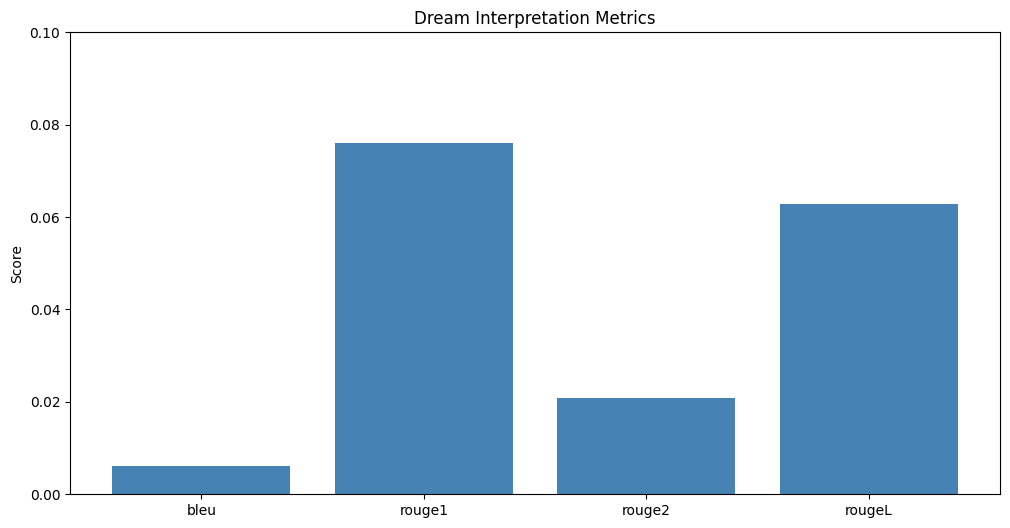

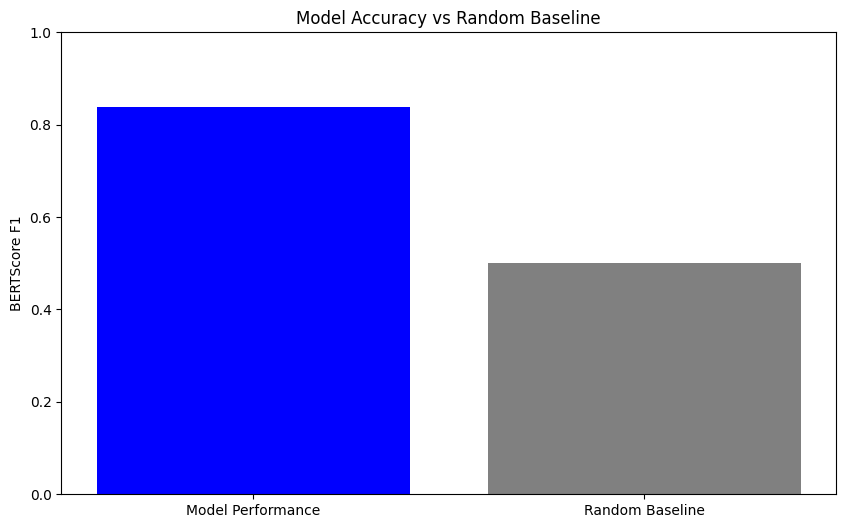

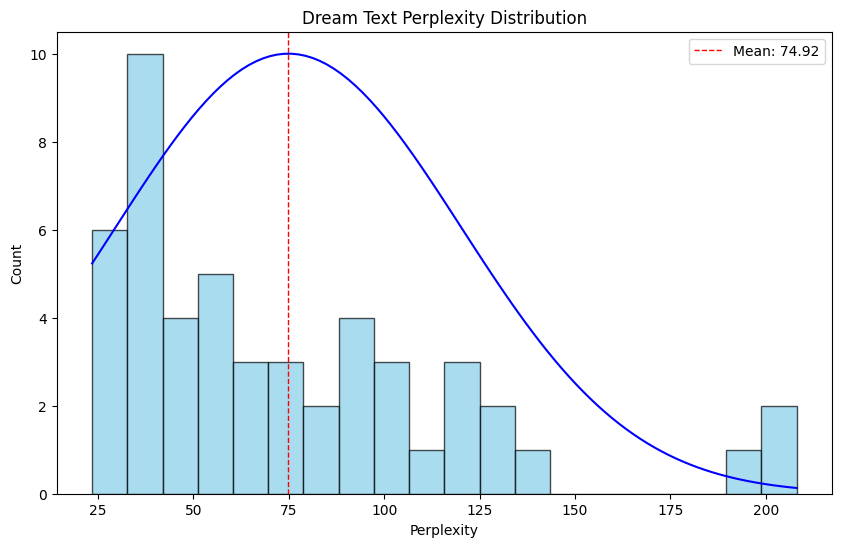

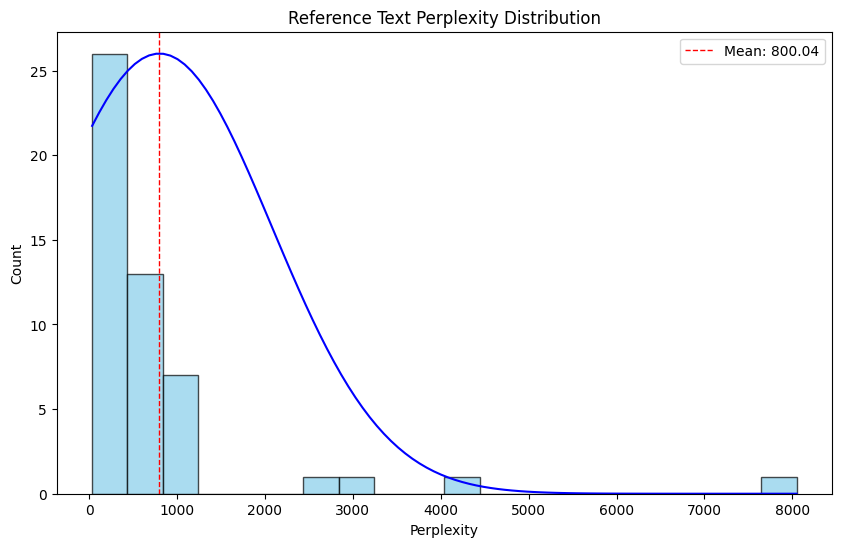

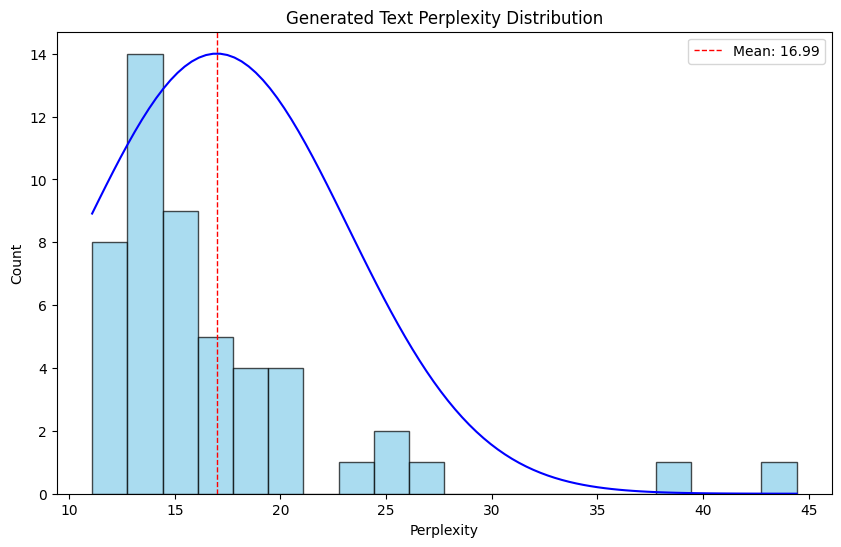

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Create Summary Table

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0061
                          ROUGE-1   0.0761
                          ROUGE-2   0.0208
                          ROUGE-L   0.0629
    Average Dream Text Perplexity  74.9179
Average Reference Text Perplexity 800.0426
Average Generated Text Perplexity  16.9870
                     BERTScore F1   0.8382


## Test GPT-2 with prompt engineering (as baseline for the prompt engineering)

In [ ]:
pip install rouge_score bert_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24

#### Import Libraries

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Model and Data

In [ ]:
# Load the model and tokenizer


# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# Load the model
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.to(device)

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model loaded and running on: cuda
Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. \n"
                f"Dream: {row['dream']}\n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.

--------------------------------------------------------------------------------
Prompt number 25:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I'm trying to pack for a trip but keep remembering more items I need.

--------------------------------------------------------------------------------
Prompt number 50:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I discover a hidden talent or ability I never knew I possessed.

--------------------------------------------------------------------------------


In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)

#### Generate Interpretations

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.
The next sentence is a little more ambiguous. It says that I have been dreaming for years, but I don't know what to do with it. I guess I should ask my friends to ask me to help. Or maybe I'll just have to wait and see.
--------------------------------------------------------------------------------

Dream: I'm running from a shadowy figure but my legs move in slow motion....
Reference: Being chased represents avoidance of an issue; slow motion means helplessness.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I

#### Calculate Metrics

In [ ]:
# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Calculating BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0022
ROUGE-1: 0.0332
ROUGE-2: 0.0083
ROUGE-L: 0.0272
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0410
Average Generated Text Perplexity: 12.2102
BERTScore F1: 0.8188

Results saved to gpt2_dream_interpretations_evaluated2.csv


#### Create Visualizations

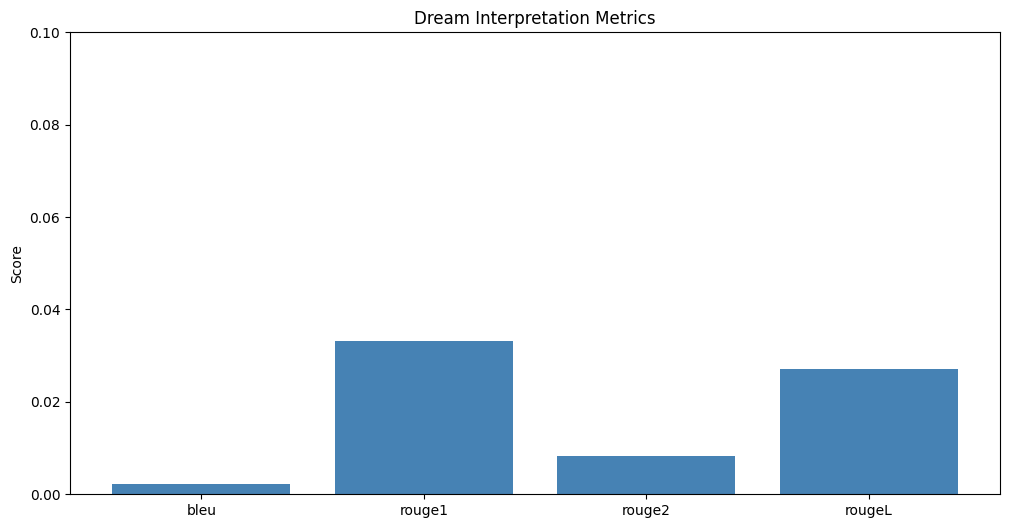

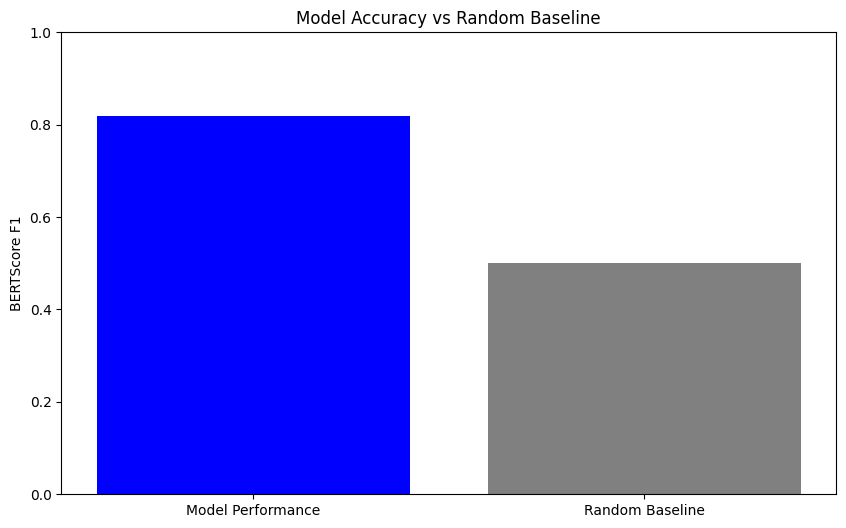

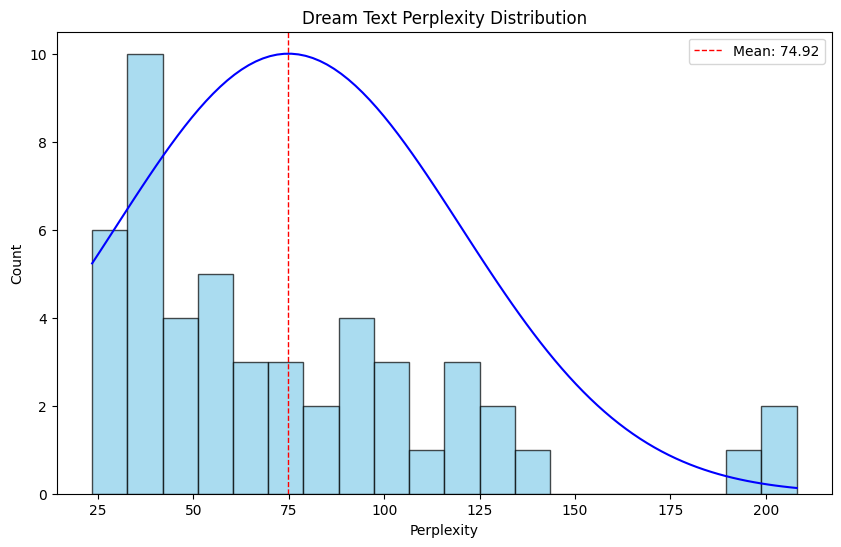

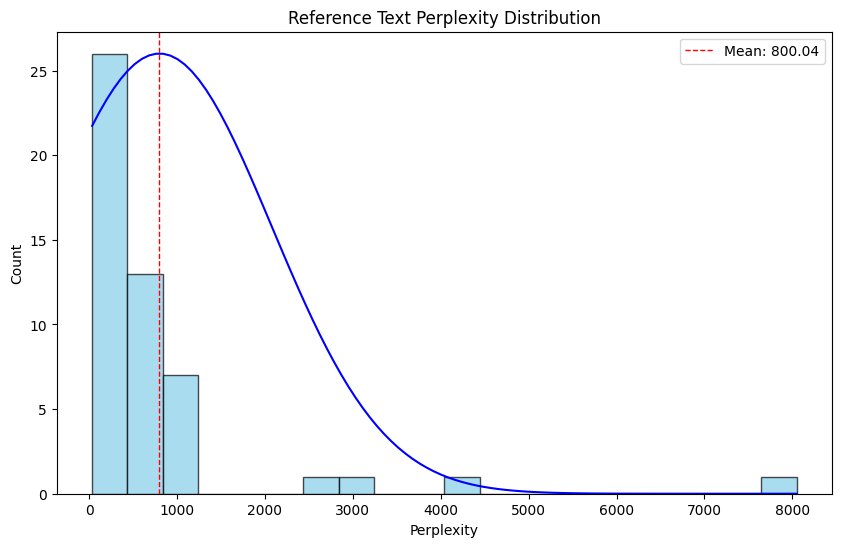

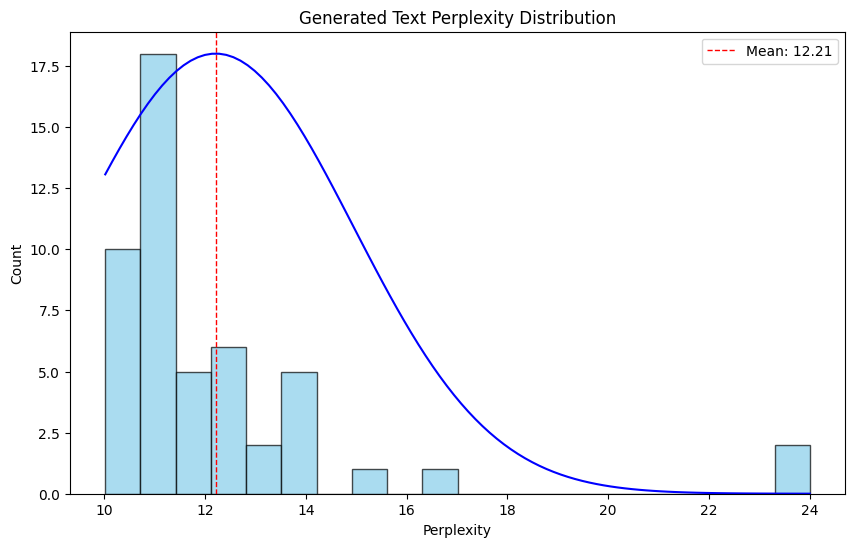

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Create Summary Table

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0022
                          ROUGE-1   0.0332
                          ROUGE-2   0.0083
                          ROUGE-L   0.0272
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0410
Average Generated Text Perplexity  12.2102
                     BERTScore F1   0.8188


## GPT-2 training with prompt engineering with dataset code translations

### Install and import libraries

In [ ]:
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import Trainer, TrainingArguments, TrainerCallback  # Added TrainerCallback
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import random

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Load data and initialize models:

In [ ]:
# Load dataset
df = pd.read_csv('gpt2_dream_translated_dataset.csv')
print("Dataset shape:", df.shape)

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Add padding token
tokenizer.pad_token = tokenizer.eos_token

Dataset shape: (21000, 6)


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
prompt_df = pd.DataFrame()
prompt_df['prompt'] = df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects provided. "
                f"Dream: {row['text_dream']}. Character Analysis: {row['character_interpretation']}. "
                f"Emotional Tone: {row['emotions_interpretation']}. Aggression Level: {row['aggression_interpretation']}. "
                f"Friendliness Level: {row['friendliness_interpretation']}. Sexuality Presence: {row['sexuality_interpretation']}. ",
    axis=1
)
print("Dataset shape:", prompt_df.shape)

for i in (0, 49, 999):
    print(f'Prompt number {i+1} in the data set:')
    print(prompt_df['prompt'][i])
    print('----------------------------------------------------------------------------------------------------------------')

Dataset shape: (21000, 1)
Prompt number 1 in the data set:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects provided. Dream: The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Insid

In [ ]:
# Check the maximum length of the prompts
min_length = prompt_df['prompt'].apply(len).min()
max_length = prompt_df['prompt'].apply(len).max()

print(f"The minimum length of the prompts is: {min_length}")
print(f"The maximum length of the prompts is: {max_length}")

The minimum length of the prompts is: 529
The maximum length of the prompts is: 33008


### Create custom dataset class

In [ ]:
class DreamDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=512):
        self.examples = []
        for _, row in df.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),   # Keep dimensions compatible
                'attention_mask': encodings['attention_mask'].squeeze(0),
                'labels': encodings['input_ids'].squeeze(0).clone()  # Use input_ids for labels
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

### Prepare train and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
train_df, val_df = train_test_split(prompt_df, test_size=0.1, random_state=42)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# Create datasets
train_dataset = DreamDataset(train_df, tokenizer)
val_dataset = DreamDataset(val_df, tokenizer)

Training samples: 18900
Validation samples: 2100


In [ ]:
from transformers import logging

logging.set_verbosity_info()  # Use `logging.set_verbosity_debug()` for even more detailed output
# Model, optimizer, criterion setup
print("Loading model...")
model.to(device)
print("Model loaded.")

Loading model...
Model loaded.


In [ ]:
import torch
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
print("optimizer set")
# Datasets and DataLoaders
print("Initializing DataLoaders...")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=8, pin_memory=True)
print("DataLoaders initialized.")

optimizer set
Initializing DataLoaders...
DataLoaders initialized.


In [ ]:
import json
import torch.nn.functional as F

class EarlyStopping:
    def __init__(self, patience=3, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')  # Initialize with infinity

    def __call__(self, val_loss):
        if val_loss < self.best_loss:  # Check if current val_loss is less than the best loss recorded
            self.best_loss = val_loss
            self.counter = 0  # Reset counter if it improves
        else:
            self.counter += 1  # Increment counter if no improvement
            if self.counter >= self.patience:
                return True  # Indicate to stop training
        return False

def save_metrics(metrics, output_dir, filename="training_metrics.json"):
    """
    Save the training metrics to a specified file in a given directory.

    :param metrics: The dictionary containing the metrics to save.
    :param output_dir: The directory where the metrics file will be saved.
    :param filename: The name of the file to save metrics as.
    """
    os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist
    filepath = os.path.join(output_dir, filename)  # Construct full file path
    with open(filepath, 'w') as f:
        json.dump(metrics, f)
    print(f"Metrics saved to {filepath}.")

def save_model(model, optimizer, epoch, path):
    os.makedirs(path, exist_ok=True)
    model_path = os.path.join(path, f"model_epoch_{epoch +1}.pth")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, model_path)
    print(f"Model saved to {model_path}")

def compute_perplexity(loss):
    """Calculate perplexity using cross-entropy loss."""
    return np.exp(loss)



In [ ]:
# Function to plot the losses and perplexities
def plot_metrics(metrics_log, experiment_directory, epoch):
    plt.figure(figsize=(12, 6))
    val_losses = []
    val_losses = metrics_log['val_losses']

    best_val_loss = min(val_losses)
    best_model_epoch = val_losses.index(min(val_losses)) + 1

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(metrics_log['epoch'], metrics_log['train_losses'], label='Training Loss', color='blue')
    plt.plot(metrics_log['epoch'], metrics_log['val_losses'], label='Validation Loss', color='orange')
    plt.axvline(x=best_model_epoch, color='green', linestyle='--', label=f'Best Model (Epoch {best_model_epoch})')
    plt.text(best_model_epoch, best_val_loss, f'Best Val Loss: {best_val_loss:.4f}',
        horizontalalignment='center', verticalalignment='top', color='green')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting perplexity
    plt.subplot(1, 2, 2)
    plt.plot(metrics_log['epoch'], metrics_log['val_perplexities'], label='Validation Perplexity', color='green')
    plt.title('Validation Perplexity')
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.legend()
    plt.grid()

    # Save the figure
    plot_path = os.path.join(experiment_directory, f"metrics_plot.png")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()  # Close the plot to free memory
    print(f"Metrics plot saved to {plot_path}")

In [ ]:
from tqdm import tqdm

def train_epoch(model, train_loader, optimizer, metrics_log):
    model.train()  # Set the model to training mode
    training_loss = 0.0

    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()  # Reset gradients
        input_ids = batch['input_ids'].to(device)  # Move to GPU
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        training_loss += loss.item()

    avg_train_loss = training_loss / len(train_loader)
    metrics_log['train_losses'].append(avg_train_loss)
    return avg_train_loss, metrics_log

def validate_model(model, val_loader, metrics_log):
    model.eval()  # Set the model to evaluation mode
    validation_loss = 0.0

    with torch.no_grad():  # Disable gradient tracking for validation
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)  # Move to GPU
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            validation_loss += loss.item()

    avg_val_loss = validation_loss / len(val_loader)
    metrics_log['val_losses'].append(avg_val_loss)

    # Calculate and log perplexity
    perplexity = compute_perplexity(avg_val_loss)
    metrics_log['val_perplexities'].append(perplexity)

    return avg_val_loss, metrics_log

In [ ]:
import os

num_epochs = 20
early_stopping = EarlyStopping(patience=3)
metrics_log = {
    'epoch': [],
    'train_losses': [],
    'val_losses': [],
    'val_perplexities': []
}
best_val_loss = 0
output_directory = '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt'
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    metrics_log['epoch'].append(epoch + 1)

    # Training phase
    train_loss, metrics_log = train_epoch(model, train_loader, optimizer, metrics_log)
    print(f"Training Loss: {train_loss:.4f}")

    # Validation phase
    val_loss, metrics_log = validate_model(model, val_loader, metrics_log)
    print(f"Validation Loss: {val_loss:.4f} Validation Perplexity: {metrics_log['val_perplexities'][epoch - 1]:.4f}")



    # Save the model if the validation loss improves
    if val_loss < best_val_loss:
        save_model(model, optimizer, epoch, output_directory)
        best_val_loss = val_loss

    # Save metrics at the end of the training
    save_metrics(metrics_log, output_directory)

    # Plot training and validation losses, and perplexities
    plot_metrics(metrics_log, output_directory, epoch)

    if epoch == (num_epochs - 1):
        save_model(model, optimizer, epoch, output_directory)
        print(f"Stoped training after final epoch. Saved model in {output_directory}")

    # Check early stopping condition
    if early_stopping(val_loss):
        save_model(model, optimizer, epoch, output_directory)
        print(f"Early stopping triggered. Stoped training and saved model in {output_directory}")
        break




Epoch 1/20


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.
Training: 100%|██████████| 1182/1182 [33:21<00:00,  1.69s/it]


Training Loss: 1.4618


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3518 Validation Perplexity: 3.8643
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 2/20


Training: 100%|██████████| 1182/1182 [33:24<00:00,  1.70s/it]


Training Loss: 1.3610


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3299 Validation Perplexity: 3.8643
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 3/20


Training: 100%|██████████| 1182/1182 [33:27<00:00,  1.70s/it]


Training Loss: 1.3119


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3214 Validation Perplexity: 3.7806
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 4/20


Training: 100%|██████████| 1182/1182 [33:27<00:00,  1.70s/it]


Training Loss: 1.2701


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3179 Validation Perplexity: 3.7485
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 5/20


Training: 100%|██████████| 1182/1182 [33:27<00:00,  1.70s/it]


Training Loss: 1.2330


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3212 Validation Perplexity: 3.7356
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 6/20


Training: 100%|██████████| 1182/1182 [33:27<00:00,  1.70s/it]


Training Loss: 1.1979


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3258 Validation Perplexity: 3.7479
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png

Epoch 7/20


Training: 100%|██████████| 1182/1182 [33:34<00:00,  1.70s/it]


Training Loss: 1.1646


Validation: 100%|██████████| 132/132 [00:57<00:00,  2.30it/s]


Validation Loss: 1.3316 Validation Perplexity: 3.7652
Metrics saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/training_metrics.json.
Metrics plot saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/metrics_plot.png
Model saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt/model_epoch_7.pth
Early stopping triggered. Stoped training and saved model in /home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-prompt


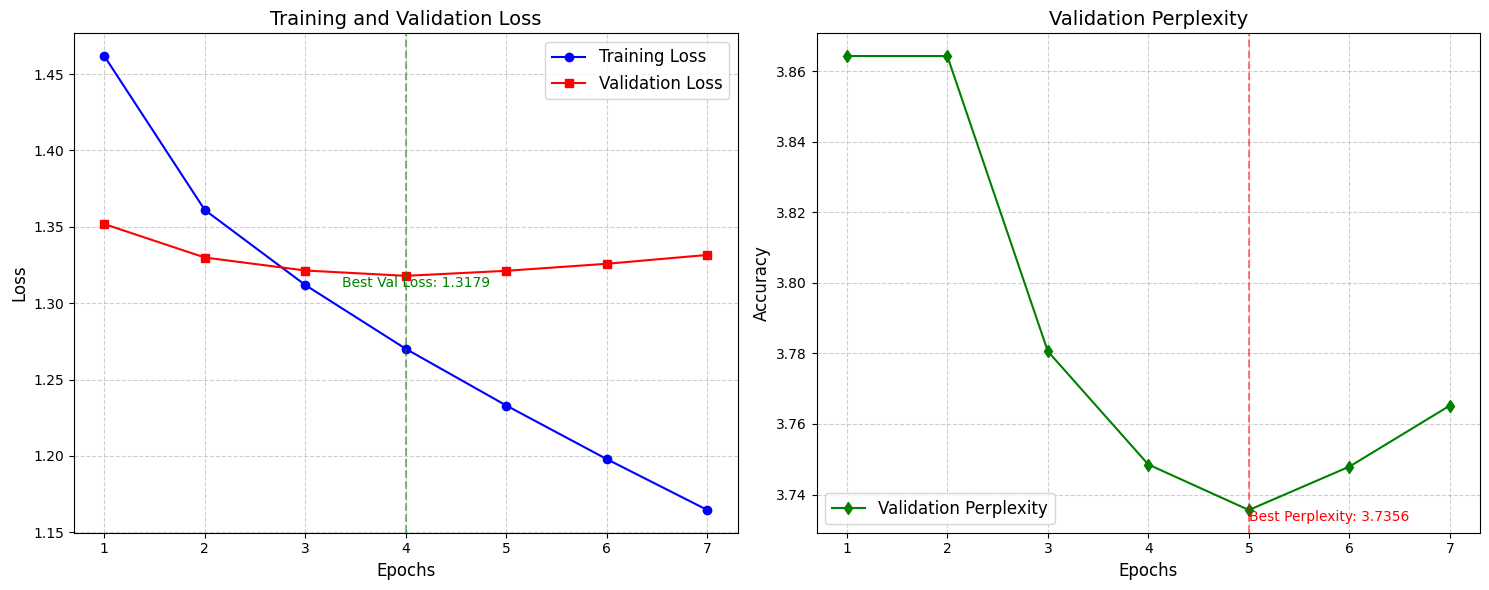

In [ ]:
# Plot training progress
epochs = range(1, 8)
train_losses = [1.4618, 1.3610, 1.3119, 1.2701, 1.2330, 1.1979, 1.1646]
val_losses = [1.3518, 1.3299, 1.3214, 1.3179, 1.3212, 1.3258, 1.3316]
Validation_Perplexity = [3.8643 , 3.8643, 3.7806, 3.7485, 3.7356 , 3.7479, 3.7652]


plt.figure(figsize=(15, 6))

# Plot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-o', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, 'r-s', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Find the epoch with minimum validation loss
min_val_loss_epoch = val_losses.index(min(val_losses)) + 1
min_val_loss = min(val_losses)
plt.axvline(x=min_val_loss_epoch, color='g', linestyle='--', alpha=0.5)
plt.text(min_val_loss_epoch + 0.1, min_val_loss, f'Best Val Loss: {min_val_loss:.4f}',
          horizontalalignment='center', verticalalignment='top', color='green')

# Plot 2: Validation Perplexity
plt.subplot(1, 2, 2)
plt.plot(range(1, len(Validation_Perplexity) + 1), Validation_Perplexity, 'g-d', label='Validation Perplexity')
plt.title('Validation Perplexity', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Find the epoch with minimum Validation_Perplexity
max_acc_epoch = Validation_Perplexity.index(min(Validation_Perplexity)) + 1
max_acc = min(Validation_Perplexity)
plt.axvline(x=max_acc_epoch, color='r', linestyle='--', alpha=0.5)
plt.text(max_acc_epoch, max_acc, f'Best Perplexity: {max_acc:.4f}',
          horizontalalignment='left', verticalalignment='top', color='red')

plt.tight_layout()
plt.show()

In [ ]:
model.save_pretrained("/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2")
tokenizer.save_pretrained("/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2")

('/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/tokenizer_config.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/special_tokens_map.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/vocab.json',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/merges.txt',
 '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/gpt2_model/gpt2-dream-interpreter-final2/added_tokens.json')

# Test GPT-2 with prompt engineering using promp engineering training

In [ ]:
pip install rouge_score bert_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=

#### Import Libraries

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Model and Data

In [ ]:
# Load the model and tokenizer


def load_model(checkpoint_path):
    # Load the tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    tokenizer.pad_token = tokenizer.eos_token

    # Load the model
    model = GPT2LMHeadModel.from_pretrained('gpt2')

    # Load the saved model state
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])

    return model, tokenizer
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/gpt2-dream-interpreter-prompt/model_epoch_7.pth"

model, tokenizer = load_model(checkpoint_path)
print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

Model loaded and running on: cuda
Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. \n"
                f"Dream: {row['dream']}\n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.

--------------------------------------------------------------------------------
Prompt number 25:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I'm trying to pack for a trip but keep remembering more items I need.

--------------------------------------------------------------------------------
Prompt number 50:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I discover a hidden talent or ability I never knew I possessed.

--------------------------------------------------------------------------------


In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)


In [ ]:
print(test_dataset[0])

{'input_ids': tensor([  818,   530,  6827,    11,  6179,   428,  4320,   416, 32029,   262,
         2095, 12796,    11, 10825,    11, 15569,    11,  1545, 26061,    11,
          290, 16641,  7612,    13,   220,   198, 30571,    25,   314,   716,
         7348,   625, 12269,   290, 24768,    11,  4203,  1479,   290, 22619,
         6302,    13,   198, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 

#### Generate Interpretations

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.
  Then I see the ocean beyond. I look out and see a huge wave crashing over, breaking the rocks to bits and then the wave crashes back to earth. It is so huge, it is a shock wave. The water is now cold and cold, like a hurricane. A man, a fisherman, asks me to help him catch a fish. He has a big lure, but it doesn't have a hook. We go to the dock and he grabs one and hangs on to it. His line breaks and the fish swims to him, catching him. Now I'm in a house. Someone is with me and we are trying to find the person to marry him or love him so that he can live with us. They say no, they don't want us to, so we decide t

#### Calculate Metrics

In [ ]:
# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Calculating BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Calculate Averages and Save Results

In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0020
ROUGE-1: 0.0312
ROUGE-2: 0.0071
ROUGE-L: 0.0268
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0435
Average Generated Text Perplexity: 41.7424
BERTScore F1: 0.8123

Results saved to gpt2_dream_interpretations_evaluated2.csv


#### Create Visualizations

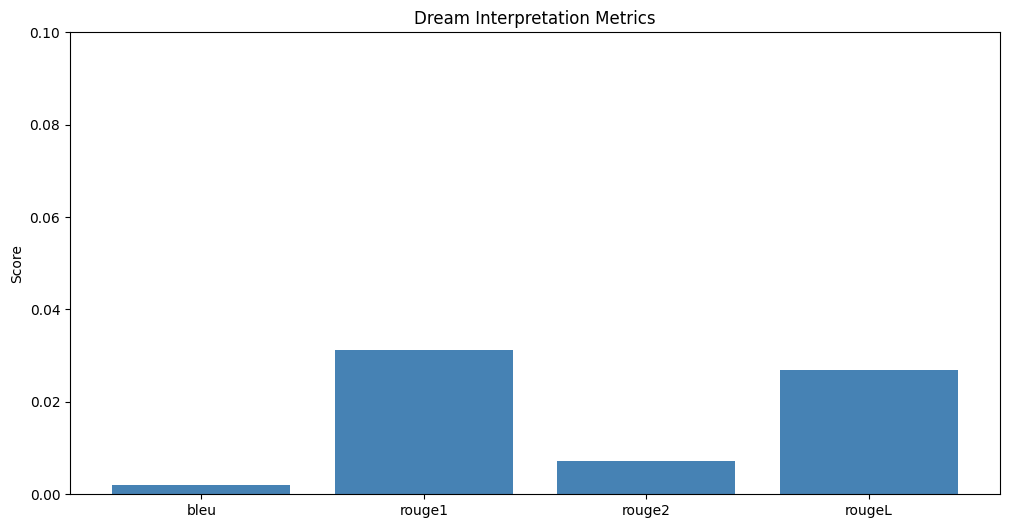

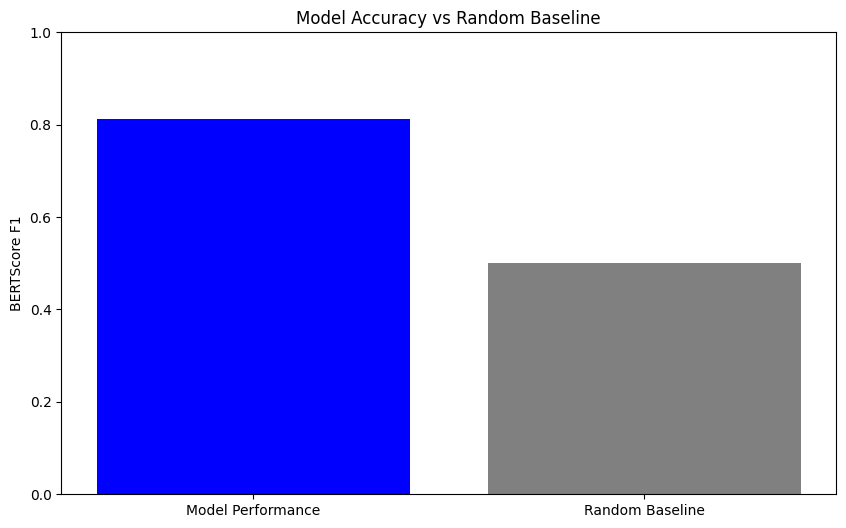

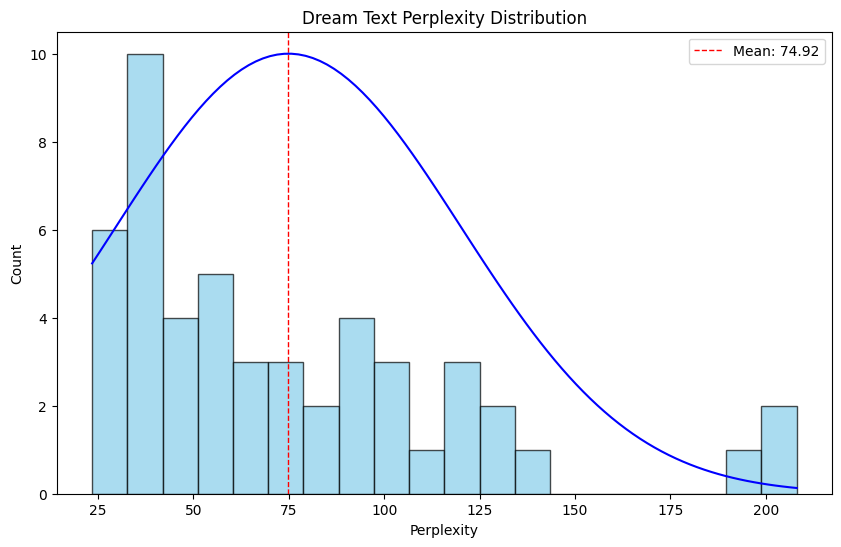

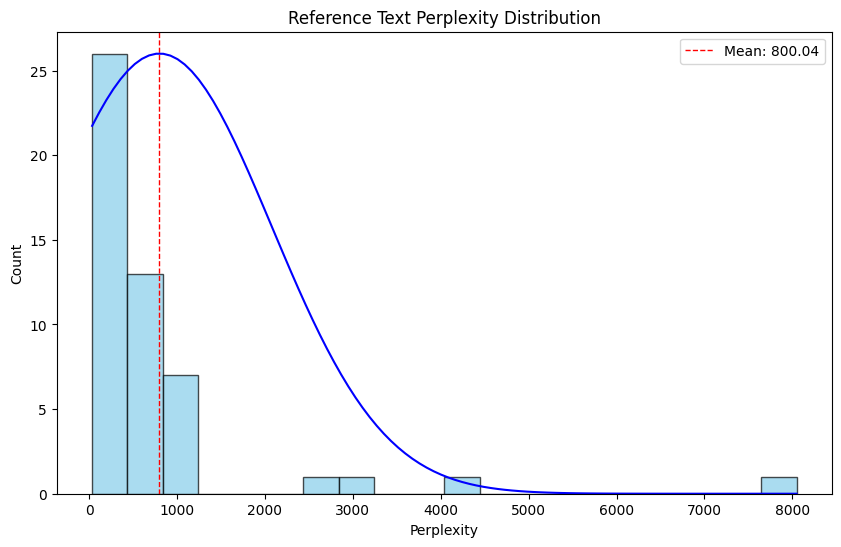

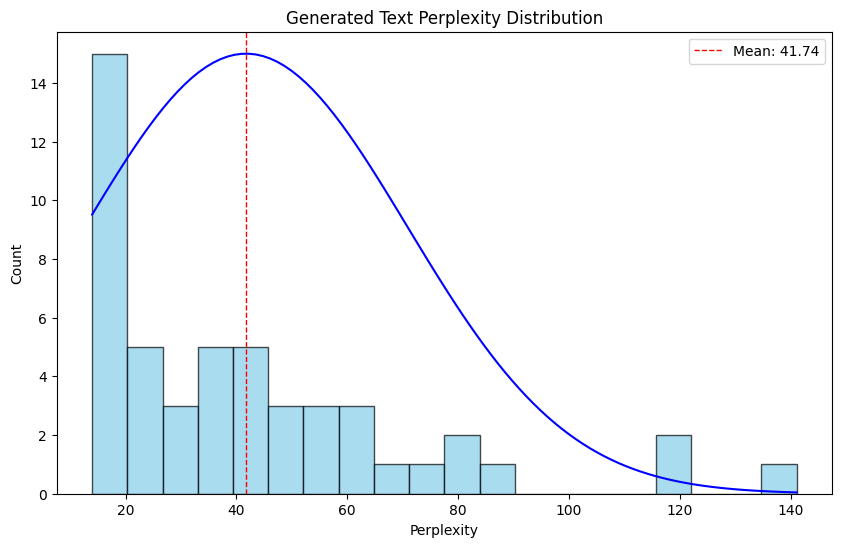

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Create Summary Table

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0020
                          ROUGE-1   0.0312
                          ROUGE-2   0.0071
                          ROUGE-L   0.0268
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0435
Average Generated Text Perplexity  41.7424
                     BERTScore F1   0.8123


## Test GPT-2 Large with prompt engineering

In [ ]:
pip install rouge_score bert_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=

#### Import Libraries

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Model and Data

In [ ]:
# Load the model and tokenizer


# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')
tokenizer.pad_token = tokenizer.eos_token

# Load the model
model = GPT2LMHeadModel.from_pretrained('gpt2-large')
model.to(device)

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model loaded and running on: cuda
Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. \n"
                f"Dream: {row['dream']}\n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.

--------------------------------------------------------------------------------
Prompt number 25:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I'm trying to pack for a trip but keep remembering more items I need.

--------------------------------------------------------------------------------
Prompt number 50:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I discover a hidden talent or ability I never knew I possessed.

--------------------------------------------------------------------------------


In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)

#### Generate Interpretations

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded.
The next time you have a dream, make a note of the dream's content and the emotions it evoked. You may be surprised at the results. What you see in your dream may not be the real you. If so, you can be sure that you are not the one who has the problem. The dreamer has had a bad dream and it is your responsibility to correct the situation. Dreaming is a natural and effective way to get a handle on what is going on in the world.
--------------------------------------------------------------------------------

Dream: I'm running from a shadowy figure but my legs move in slow motion....
Reference: Being chased represent

#### Calculate Metrics

In [ ]:
# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Calculating BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Calculate Averages and Save Results

In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0021
ROUGE-1: 0.0311
ROUGE-2: 0.0079
ROUGE-L: 0.0269
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0410
Average Generated Text Perplexity: 14.7284
BERTScore F1: 0.8172

Results saved to gpt2_dream_interpretations_evaluated2.csv


#### Create Visualizations

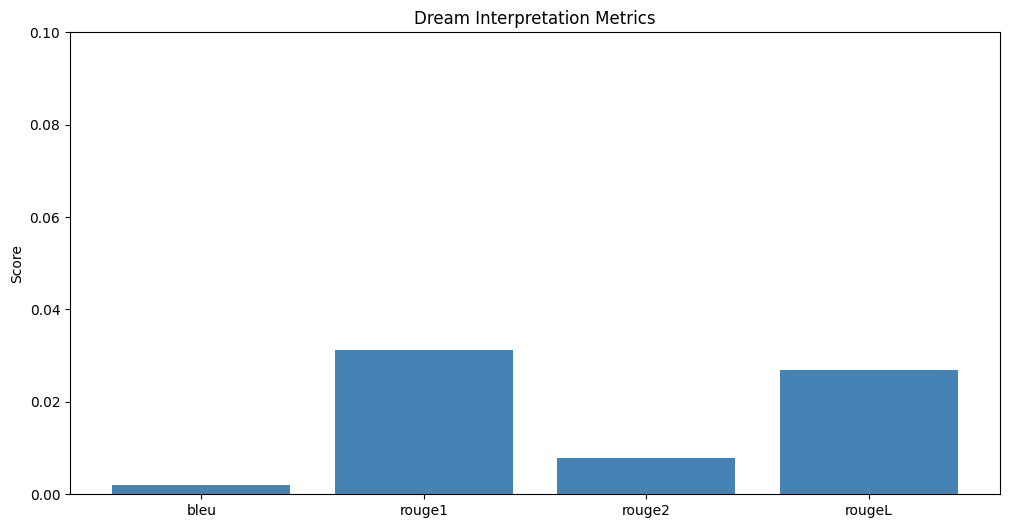

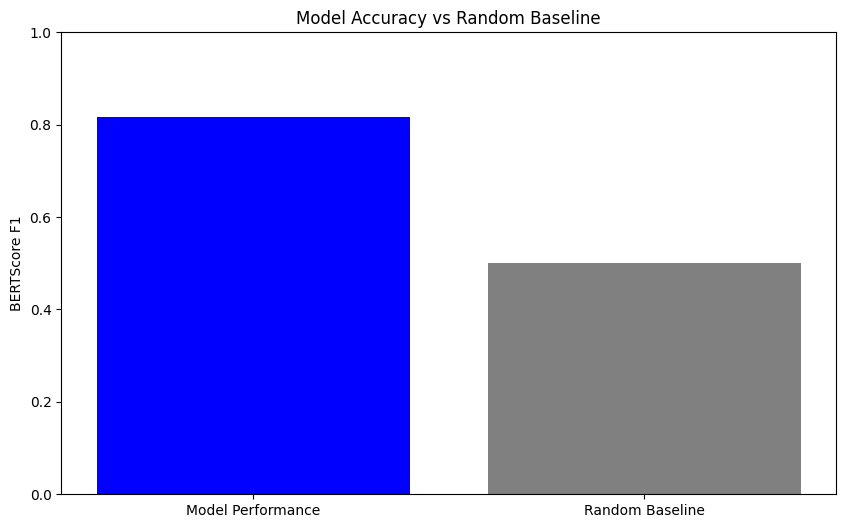

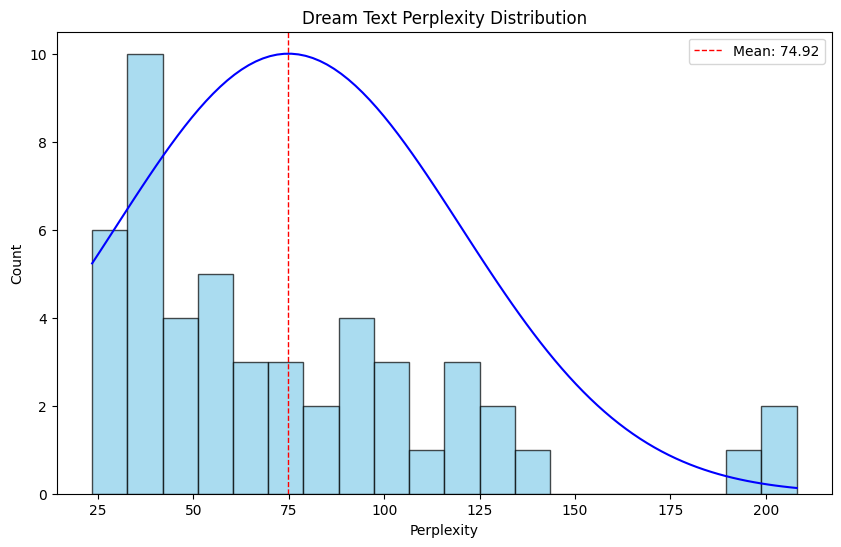

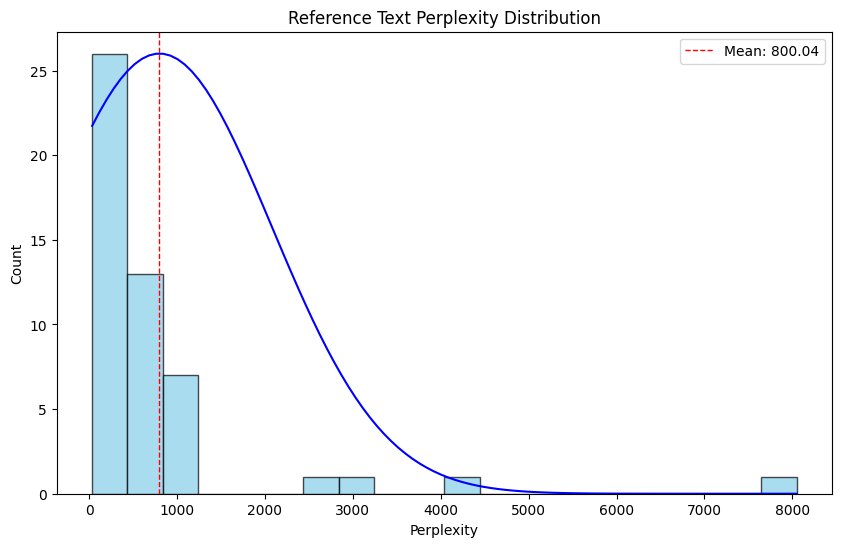

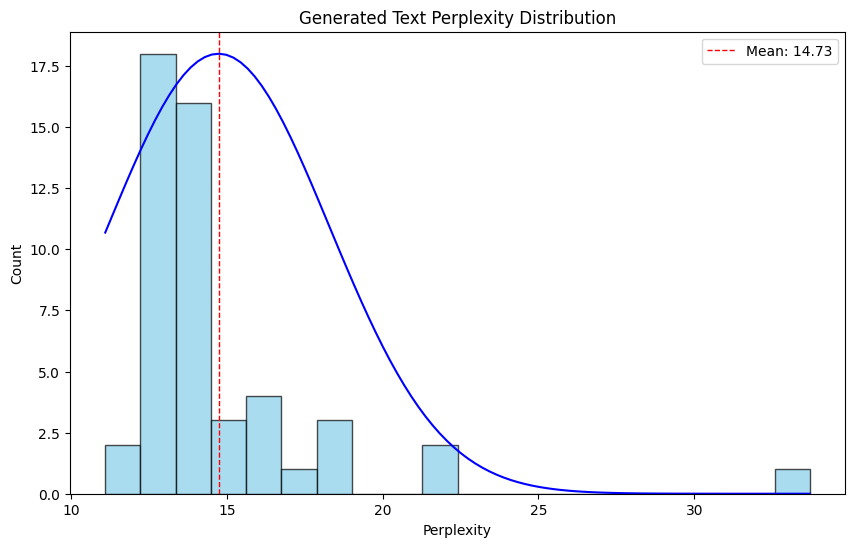

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Create Summary Table

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0021
                          ROUGE-1   0.0311
                          ROUGE-2   0.0079
                          ROUGE-L   0.0269
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0410
Average Generated Text Perplexity  14.7284
                     BERTScore F1   0.8172


## Test GPT-2 Large with prompt engineering (to see if a diffrent prompt will give a batter base metrics)

#### Import Libraries

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Set Up Environment

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


#### Load Model and Data

In [ ]:
# Load the model and tokenizer


# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')
tokenizer.pad_token = tokenizer.eos_token

# Load the model
model = GPT2LMHeadModel.from_pretrained('gpt2-large')
model.to(device)

print(f"Model loaded and running on: {device}")

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

Model loaded and running on: cuda
Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"Dream: {row['dream']} \n"
                #f"In one sentence, interpret this dream. Dream like these are often related to..., can represent..., may symbolize..., may reflect...",character traits, emotions, aggression, friendliness, and sexuality aspects
                f"Given the dream details, provide a very short (up to two sentences), "
                f"clear and concise psychological analytical dream interpretation that captures the dream's underlying meaning in aspects of "
                f"emotional significance, character traits, aggression, friendliness, and sexuality. \n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
Dream: I am flying over mountains and lakes, feeling free and unbounded. 
Given the dream details, provide a very short (up to two sentences), clear and concise psychological analytical dream interpretation that captures the dream's underlying meaning in aspects of emotional significance, character traits, aggression, friendliness, and sexuality. 

--------------------------------------------------------------------------------
Prompt number 25:
Dream: I'm trying to pack for a trip but keep remembering more items I need. 
Given the dream details, provide a very short (up to two sentences), clear and concise psychological analytical dream interpretation that captures the dream's underlying meaning in aspects of emotional significance, character traits, aggression, friendliness, and sexuality. 

--------------------------------------------------------------------------------
Prompt number 50:
Dream: I dis

In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)


In [ ]:
print(test_dataset[0])

{'input_ids': tensor([30571,    25,   314,   716,  7348,   625, 12269,   290, 24768,    11,
         4203,  1479,   290, 22619,  6302,    13,   220,   198, 15056,   262,
         4320,  3307,    11,  2148,   257,   845,  1790,   357,   929,   284,
          734, 13439,   828,  1598,   290, 35327, 10590, 30063,  4320, 10794,
          326, 23007,   262,  4320,   338, 10238,  3616,   287,  7612,   286,
         7016, 12085,    11,  2095, 12796,    11, 15569,    11,  1545, 26061,
           11,   290, 16641,    13,   220,   198, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 

#### Generate Interpretations

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: Dream: I am flying over mountains and lakes, feeling free and unbounded. 
Given the dream details, provide a very short (up to two sentences), clear and concise psychological analytical dream interpretation that captures the dream's underlying meaning in aspects of emotional significance, character traits, aggression, friendliness, and sexuality. 
The dreamer may be able to describe the meaning of the dreams, but it is not necessary. The dream may only be interpreted by the person who has the experience, or by a group of dreamers. 
A dream is an experience. It is a unique event that may occur in our dreams. Dreams are a way for us to remember past lives, to explore the unknown, in a world that is often unfamiliar and mysterious.
To learn more about how to interpret dreams visit the following links:
Dream Interpretation 

#### Calculate Metrics

In [ ]:
# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...
Calculating BERTScore...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Calculate Averages and Save Results

In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0019
ROUGE-1: 0.0319
ROUGE-2: 0.0081
ROUGE-L: 0.0272
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0410
Average Generated Text Perplexity: 16.2271
BERTScore F1: 0.8166

Results saved to gpt2_dream_interpretations_evaluated2.csv


#### Create Visualizations

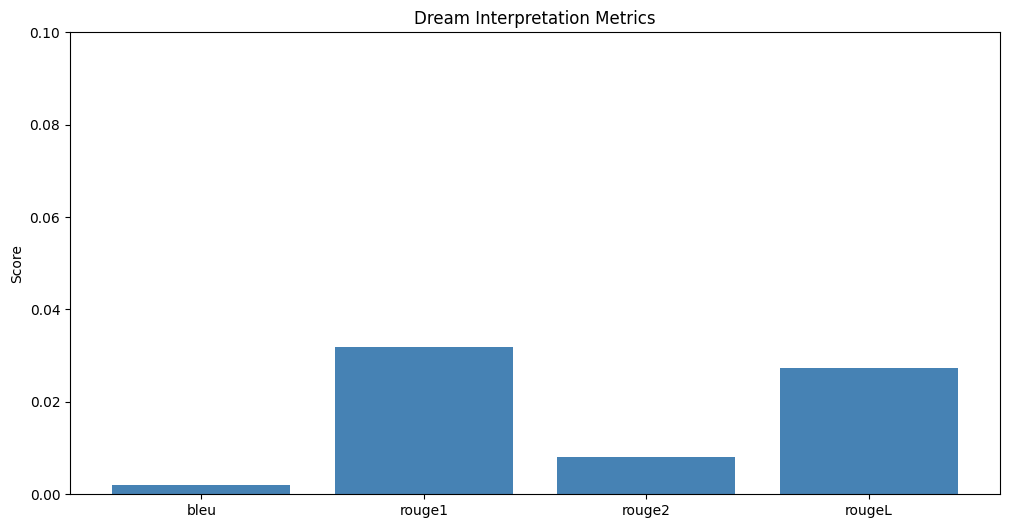

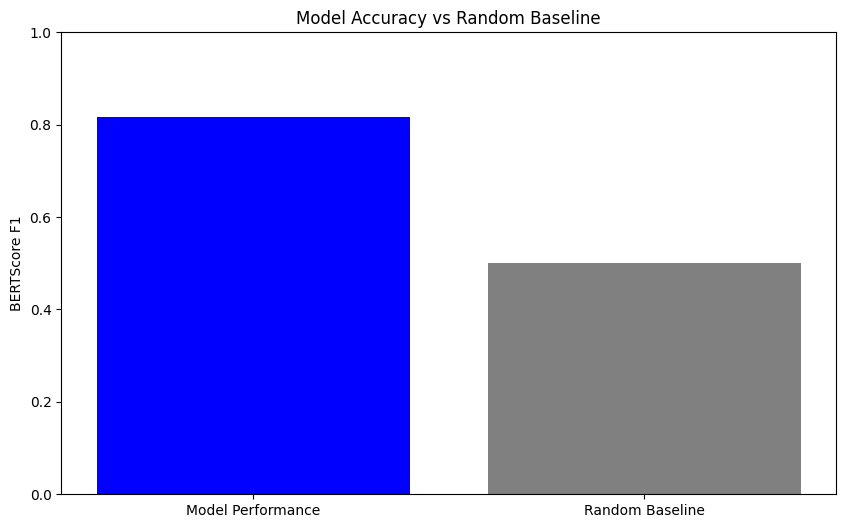

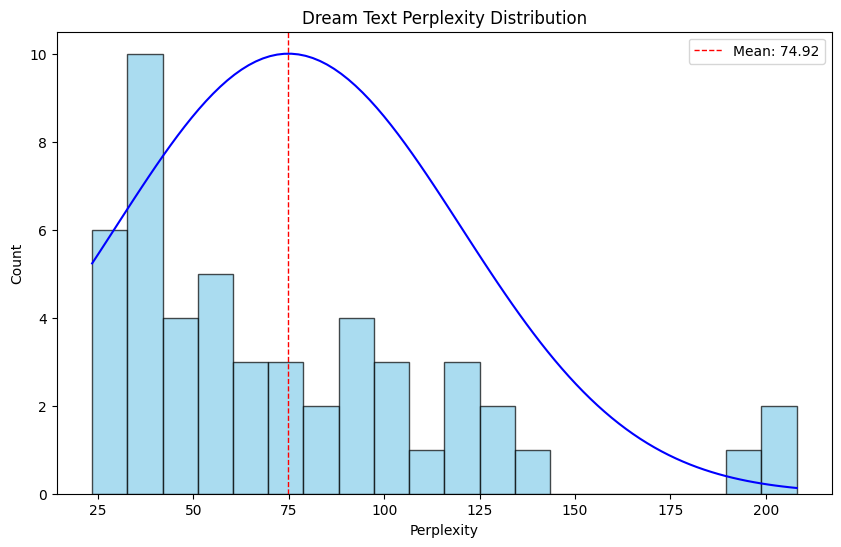

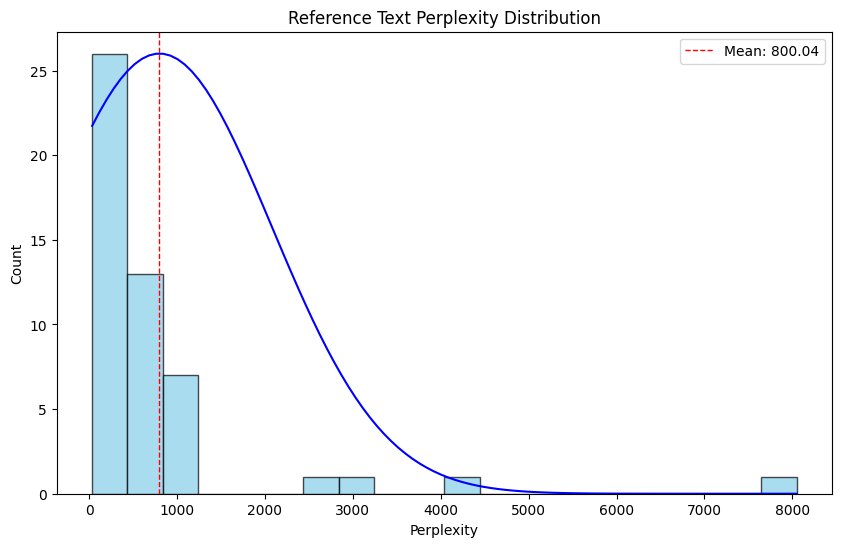

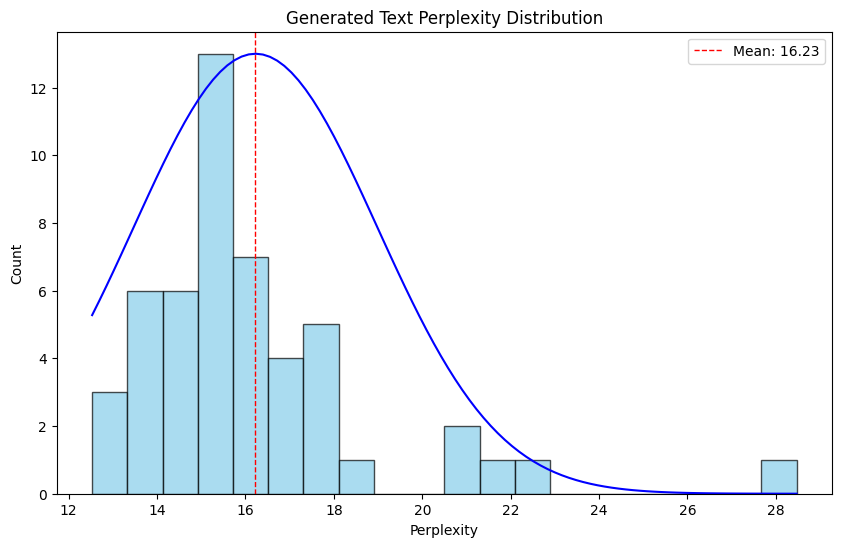

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Create Summary Table

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0019
                          ROUGE-1   0.0319
                          ROUGE-2   0.0081
                          ROUGE-L   0.0272
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0410
Average Generated Text Perplexity  16.2271
                     BERTScore F1   0.8166


## Baseline Test of Llama-3.1-8B model with prompt engeniring on DreamBank Analysis Dataset.

> Add blockquote



#### Import Libraries

In [ ]:
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes
!pip install rouge_score
!pip install bert_score

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-e9xf3xs6/unsloth_c2a6a185ef3b4e58ad9955b3d6604112
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-e9xf3xs6/unsloth_c2a6a185ef3b4e58ad9955b3d6604112
  Resolved https://github.com/unslothai/unsloth.git to commit eefba34e94443971533bffdf2ac32069ed07b0c2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 11.1 MB/s eta 0:00:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: trl
    Found existing installation: trl 0.15.2
    Uninstalling trl-0.15.2:
      Successfully uninstalled trl-0.15.2


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Set Up Environment

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

Using device: cuda
Mon Mar 31 15:32:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             44W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+----------------------------

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from unsloth import FastLanguageModel
max_seq_length = 512
dtype = None
load_in_4bit = True
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(model)

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

<ipython-input-5-785488ddeea7>:1: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.3.0+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.9 (you have 3.11.11)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. \n"
                f"Dream: {row['dream']} \n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded. 

--------------------------------------------------------------------------------
Prompt number 25:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I'm trying to pack for a trip but keep remembering more items I need. 

--------------------------------------------------------------------------------
Prompt number 50:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I discover a hidden talent or ability I never knew I possessed. 

--------------------------------------------------------------------------------


In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded. 
I am at the peak of my life. I have all I want in life and am happy. But I feel that I will fall down. My wings are about to break and I fall. The mountains are no longer there. Instead there is a forest. It is dark and frightening. Everything is gray. There is no light. A huge monster is chasing me. He is about ten feet tall and has a huge mouth. His mouth is full of teeth. They are sharp and shiny. As he comes closer, I get frightened. Suddenly he opens his mouth and eats me.
In the first part of this nightmare, you are flying. This symbolizes your ability to overcome challenges. You are able to take a step back 

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...
Calculating BERTScore...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0049
ROUGE-1: 0.0698
ROUGE-2: 0.0202
ROUGE-L: 0.0584
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0410
Average Generated Text Perplexity: 25.4513
BERTScore F1: 0.8344

Results saved to gpt2_dream_interpretations_evaluated2.csv


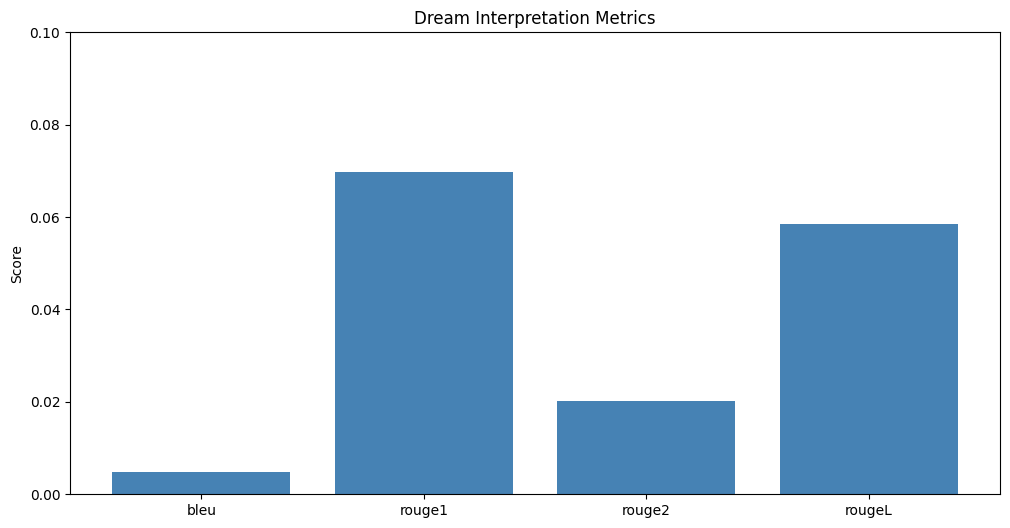

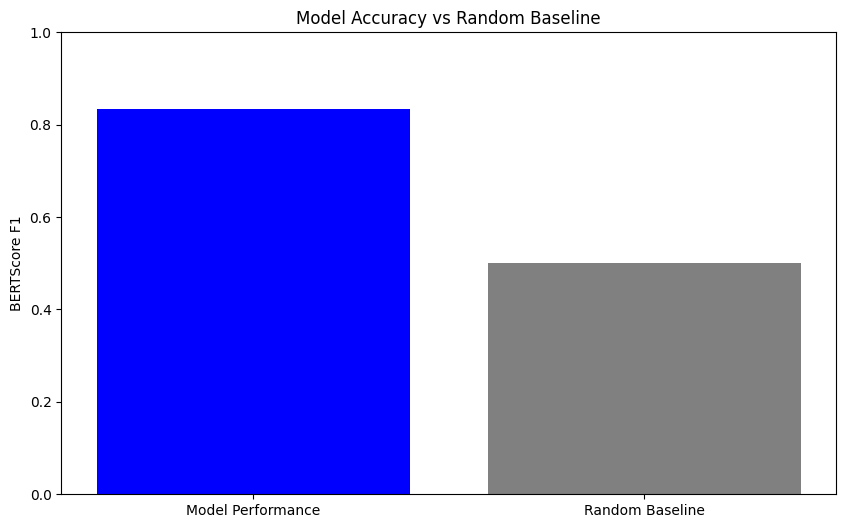

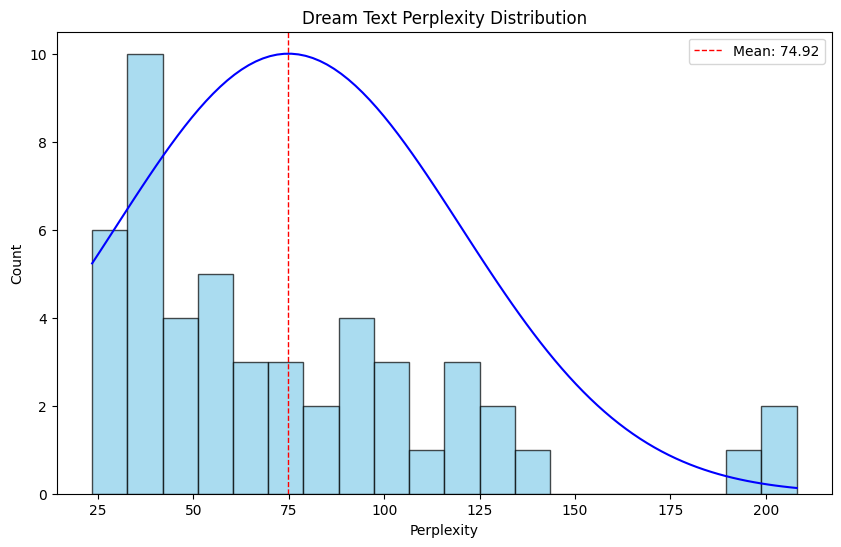

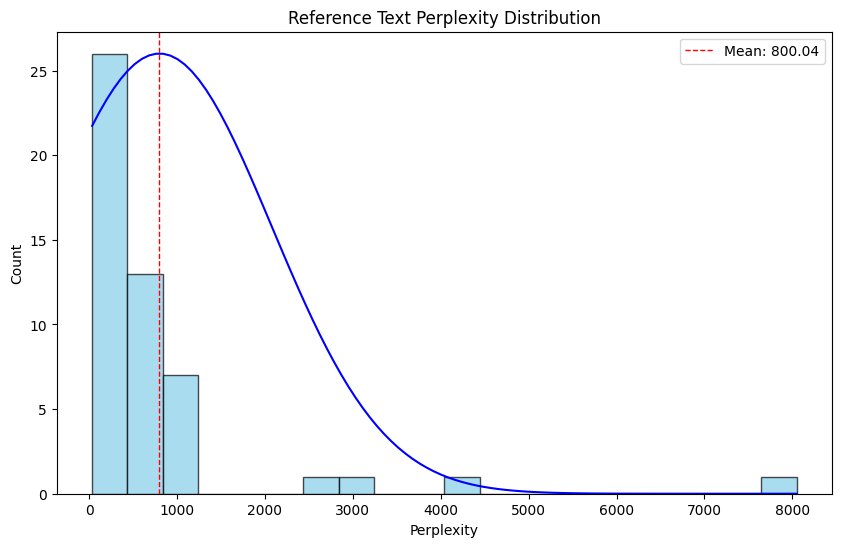

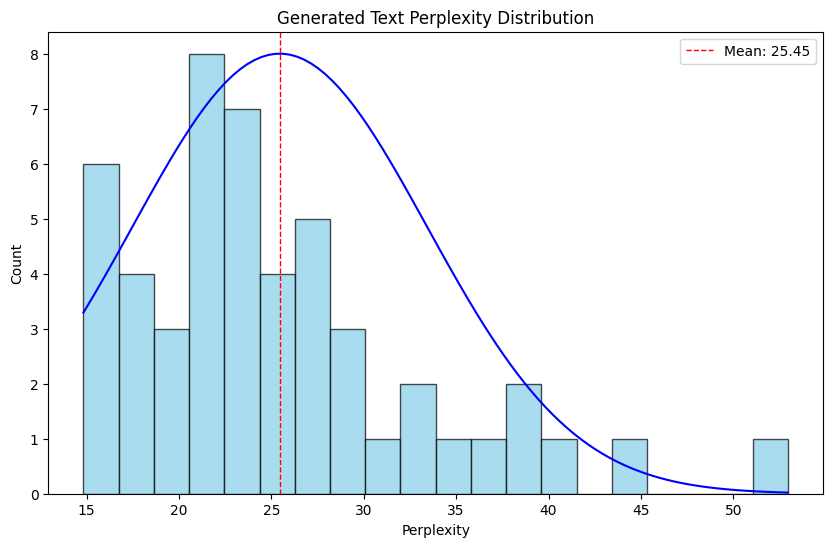

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0049
                          ROUGE-1   0.0698
                          ROUGE-2   0.0202
                          ROUGE-L   0.0584
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0410
Average Generated Text Perplexity  25.4513
                     BERTScore F1   0.8344


# Fine tune Llama-3.1-8B model with prompt engeniring on DreamBank Analysis Dataset after translation of the codes to text.

In [ ]:
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-ouwywu07/unsloth_3a530a72aa734021a9d090cb9816a19f
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-ouwywu07/unsloth_3a530a72aa734021a9d090cb9816a19f
  Resolved https://github.com/unslothai/unsloth.git to commit 158b25c30d46d60ddbb0a5ee93c688b285c7c8b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 12.6 MB/s eta 0:00:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: trl
    Found existing installation: trl 0.15.2
    Uninstalling trl-0.15.2:
      Successfully uninstalled trl-0.15.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

#### Set Up Environment

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Using device: cuda
Wed Mar 26 17:43:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             46W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+----------------------------

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load data:


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/gpt2_dream_translated_dataset.csv')
print("Dataset shape:", df.shape)

Dataset shape: (21000, 6)


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
prompt_df = pd.DataFrame()
prompt_df['prompt'] = df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects provided. "
                f"Dream: {row['text_dream']}. Character Analysis: {row['character_interpretation']}. "
                f"Emotional Tone: {row['emotions_interpretation']}. Aggression Level: {row['aggression_interpretation']}. "
                f"Friendliness Level: {row['friendliness_interpretation']}. Sexuality Presence: {row['sexuality_interpretation']}. ",
    axis=1
)
print("Dataset shape:", prompt_df.shape)

for i in (0, 49, 999):
    print(f'Prompt number {i+1} in the data set:')
    print(prompt_df['prompt'][i])
    print('----------------------------------------------------------------------------------------------------------------')

Dataset shape: (21000, 1)
Prompt number 1 in the data set:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects provided. Dream: The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Insid

In [ ]:
# Check the maximum length of the prompts
min_length = prompt_df['prompt'].apply(len).min()
max_length = prompt_df['prompt'].apply(len).max()

print(f"The minimum length of the prompts is: {min_length}")
print(f"The maximum length of the prompts is: {max_length}")

The minimum length of the prompts is: 529
The maximum length of the prompts is: 33008


### Create custom dataset class

### Prepare train and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split
#small_prompt_df = prompt_df.sample(frac=0.005, random_state=42)
# Split data
train_df, val_df = train_test_split(prompt_df, test_size=0.1, random_state=42)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

Training samples: 18900
Validation samples: 2100


In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 512
dtype = None
load_in_4bit = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit
)

Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.3.0+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.9 (you have 3.11.11)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    #target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
    #                  "get_proj", "up_proj", "down_proj"],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = True,
    random_state = 3407,
    use_rslora = True,
    loftq_config = None
)

Unsloth 2025.3.19 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments, EarlyStoppingCallback
from unsloth import is_bfloat16_supported
from datasets import Dataset, DatasetDict

# Convert Pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    dataset_text_field="prompt",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    args = TrainingArguments(
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        #gradient_accumulation_steps=16,
        warmup_steps=5,
        learning_rate =1e-5,
        num_train_epochs=20,
        dataloader_pin_memory=True,
        save_strategy="epoch",
        fp16= not is_bfloat16_supported(),
        bf16= is_bfloat16_supported(),
        logging_steps=1,
        log_level='debug',
        optim ="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed =3407,
        report_to="tensorboard",
        logging_strategy='epoch',
        output_dir='/content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt',
        logging_dir='/content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt/logs',
        do_train=True,
        do_eval=True,
        load_best_model_at_end=True,
        evaluation_strategy="epoch",
        dataloader_num_workers=12,
    ),)

# Add EarlyStoppingCallback
trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=3))


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/18900 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/2100 [00:00<?, ? examples/s]

Using auto half precision backend


In [ ]:
trainer_stats = trainer.train()

Currently training with a batch size of: 128
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 18,900 | Num Epochs = 20 | Total steps = 2,960
O^O/ \_/ \    Batch size per device = 128 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (128 x 1 x 1) = 128
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Unsloth: Will smartly offload gradients to save VRAM!



***** Running Evaluation *****
  Num examples = 2100
  Batch size = 128
Saving model checkpoint to /content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt/checkpoint-148
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--unsloth--llama-3.1-8b-unsloth-bnb-4bit/snapshots/0a43e2563fa80ebc5eb093baa843c9cb65ab50d5/config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 14336,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 32,
  "num_key_value_heads": 8,
  "pad_token_id": 128004,
  "pretraining_tp": 1,
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": f

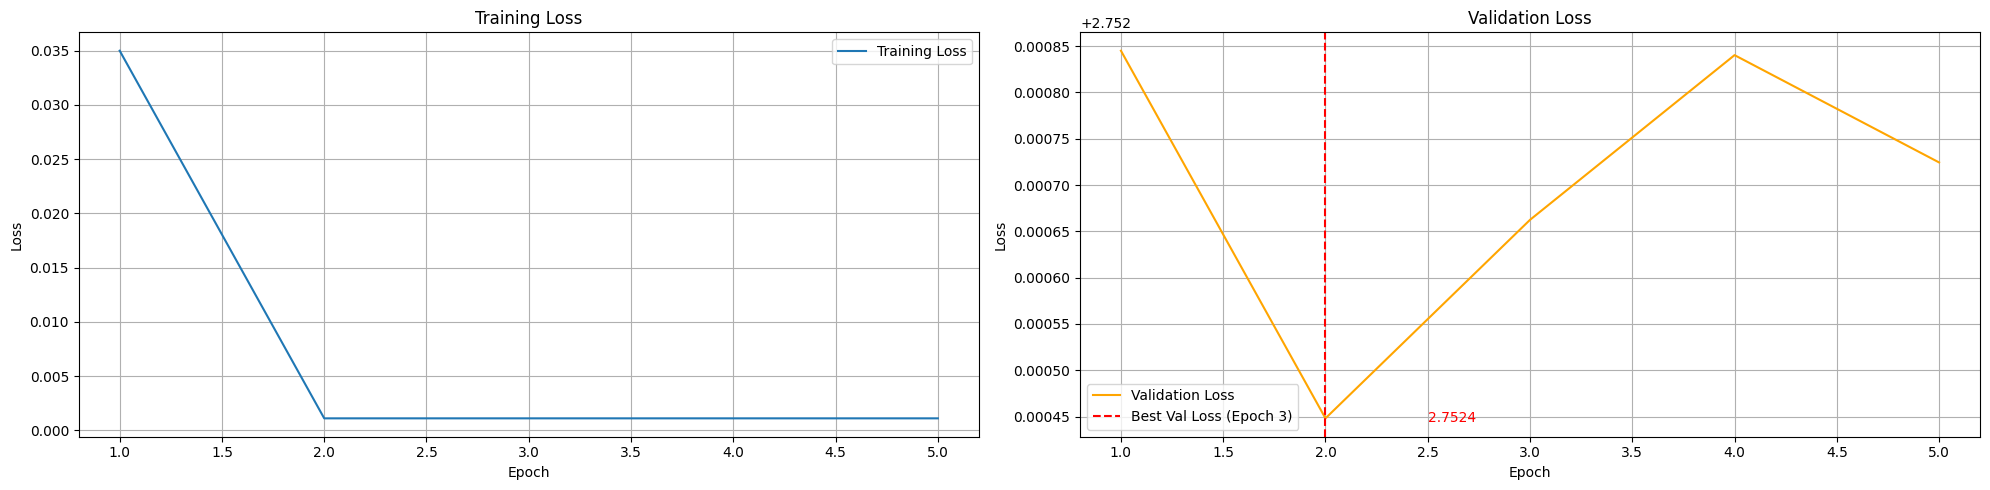

Loss plot saved to /content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt/loss_plot.png


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

def plot_losses(train_losses, val_losses, output_dir):
    """
    Plots the training and validation losses on the same graph,
    marks the best validation loss with a dotted line, and saves the plot.

    Args:
        train_losses (list): List of training losses for each epoch.
        val_losses (list): List of validation losses for each epoch.
        output_dir (str): Directory to save the plot.
        epoch (int): Current epoch number.
    """
    # Extract epochs and losses for plotting
    train_epochs, train_loss_values = zip(*train_losses)
    train_epochs = list(range(1, len(train_epochs) + 1))
    val_epochs, val_loss_values = zip(*val_losses)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5)) # 1 row, 2 columns

    # Plot training loss on the first subplot
    ax1.plot(train_epochs, train_loss_values, label='Training Loss')
    ax1.title.set_text('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot validation loss on the second subplot
    ax2.plot(val_epochs, val_loss_values, label='Validation Loss', color='orange')  # Different color

    # Find the best validation loss and its epoch
    best_val_loss = min(val_loss_values)
    best_val_loss_epoch = val_epochs[val_loss_values.index(best_val_loss)]

    ax2.axvline(x=best_val_loss_epoch, color='red', linestyle='--',
            label=f'Best Val Loss (Epoch {best_val_loss_epoch + 1})')
    ax2.text(best_val_loss_epoch + 0.5, best_val_loss, f'{best_val_loss:.4f}',
            color='red', ha='left', va='center')

    ax2.title.set_text('Validation Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout and save the figure
    plt.tight_layout()
    plot_path = os.path.join(output_dir, 'loss_plot.png')
    plt.savefig(plot_path)
    plt.show()
    #plt.close()
    print(f"Loss plot saved to {plot_path}")

def get_losses_from_logs(log_dir):
    train_losses = []
    val_losses = []
    log_files = [f for f in os.listdir(log_dir) if f.startswith("events.out.tfevents")]
    latest_log_file = os.path.join(log_dir, sorted(log_files)[-1])
    # First, let's inspect the available tags
    #available_tags = set()
    #for event in tf.compat.v1.train.summary_iterator(latest_log_file):
    #    for value in event.summary.value:
    #        available_tags.add(value.tag)

    #print(f"Available tags in the log file: {available_tags}")

    current_epoch = 0  # Initialize to track the epoch

    for event in tf.compat.v1.train.summary_iterator(latest_log_file):

        # Check for epoch information (assuming a step with tag 'epoch')
        for value in event.summary.value:
            if value.tag == 'train/epoch':
                current_epoch = int(value.simple_value)  # Update current_epoch
                break  # Exit the inner loop once epoch is found

        # Check for loss values
        for value in event.summary.value:
            if value.tag == 'train/loss':
                train_losses.append((current_epoch, value.simple_value))  # Store with epoch
            elif value.tag == 'eval/loss':  # Adjust if the tag is different
                val_losses.append((current_epoch, value.simple_value))  # Store with epoch

    return train_losses, val_losses

# After training:
log_dir = '/content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt/logs'  # Or your logging_dir
output_directory = '/content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt'  # Or your output_dir

train_losses, val_losses = get_losses_from_logs(log_dir)
#print(f'train_losses: {train_losses}')
#print(f'val_losses: {val_losses}')
plot_losses(train_losses, val_losses, output_directory)

# Test Fine tuned Llama-3.1-8B model with prompt engeniring on DreamBank Analysis Dataset after translation of the codes to text.

#### Import Libraries

In [ ]:
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes
!pip install rouge_score
!pip install bert_score

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-tq3s7ts4/unsloth_8d9a9a0db24147739a40604519bb92b9
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-tq3s7ts4/unsloth_8d9a9a0db24147739a40604519bb92b9
  Resolved https://github.com/unslothai/unsloth.git to commit eefba34e94443971533bffdf2ac32069ed07b0c2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score
from tqdm.notebook import tqdm
import random
from nltk.tokenize import RegexpTokenizer  # Add this import for alternative tokenization

# Download just the standard punkt package - we won't use punkt_tab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Set Up Environment

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

Using device: cuda
Mon Mar 31 15:52:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             49W /  400W |    9715MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+----------------------------

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from unsloth import FastLanguageModel
max_seq_length = 512
dtype = None
load_in_4bit = True
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "/content/drive/My Drive/Colab Notebooks/unsloth_Llama-3.1-8B/Llama-3.1-8B-interpreter-prompt/checkpoint-296", # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(model)

# Load the test dataset
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(test_df)} test samples")

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Loaded 50 test samples


In [ ]:
# Create the prompt column by concatenating relevant columns into a single string
test_prompt_df = pd.DataFrame()
test_prompt_df['prompt'] = test_df.apply(
    lambda row: f"In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. \n"
                f"Dream: {row['dream']} \n",
    axis=1
)
print("Dataset shape:", test_prompt_df.shape, '\n')
print('Samples of promps for the test dataset: \n')
for i in (0, 24, 49):
    print(f'Prompt number {i+1}:')
    print(test_prompt_df['prompt'][i])
    print("-" * 80)

Dataset shape: (50, 1) 

Samples of promps for the test dataset: 

Prompt number 1:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded. 

--------------------------------------------------------------------------------
Prompt number 25:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I'm trying to pack for a trip but keep remembering more items I need. 

--------------------------------------------------------------------------------
Prompt number 50:
In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I discover a hidden talent or ability I never knew I possessed. 

--------------------------------------------------------------------------------


In [ ]:
class DreamTestDataset():
    def __init__(self, Dataset, tokenizer, max_length=128):
        self.examples = []
        for _, row in Dataset.iterrows():
            text = row['prompt']
            encodings = tokenizer(text,
                                truncation=True,
                                max_length=max_length,
                                padding='max_length',
                                return_tensors='pt')

            # Append the required tensors to examples
            self.examples.append({
                'input_ids': encodings['input_ids'].squeeze(0),
                'attention_mask': encodings['attention_mask'].squeeze(0),
            })

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return self.examples[idx]

In [ ]:
# Create test prompt tokenized dataset
test_dataset = DreamTestDataset(test_prompt_df, tokenizer)

#### Generate Interpretations

In [ ]:
def generate_interpretation(model, prompts, max_length=512):
    model.eval()  # Set the model to evaluation mode
    responses = []
    for prompt in tqdm(prompts, desc="Generating Interpretations"):
        #print(f"Input prompt (encoded): {prompt['input_ids']}")

        input_ids = prompt['input_ids'].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = prompt['attention_mask'].unsqueeze(0).to(model.device)
        #inputs = tokenizer.encode(prompt, return_tensors='pt')  # Encode the input text
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            temperature=0.7,
            top_k=20,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode the model output
        responses.append(response)
    return responses

# Generate interpretations for all dreams
generated_interpretations = []



# Generate responses
generated_interpretations = generate_interpretation(model, test_dataset)

# Add to dataframe
test_df['generated_interpretation'] = generated_interpretations

# Display a sample of generations
for i in range(min(3, len(test_df))):
    print(f"\nDream: {test_df['dream'][i][:100]}...")
    print(f"Reference: {test_df['interpretation'][i]}")
    print(f"Generated: {test_df['generated_interpretation'][i]}")
    print("-" * 80)

Generating Interpretations:   0%|          | 0/50 [00:00<?, ?it/s]


Dream: I am flying over mountains and lakes, feeling free and unbounded....
Reference: Dreams of flying represent a desire for freedom or sexual liberation.
Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects. 
Dream: I am flying over mountains and lakes, feeling free and unbounded. 
Character traits: My character is free, unbound, flying, happy, joyous, light-hearted, etc. (What are the other traits?) 
Emotions: happiness, love, contentment, satisfaction, peace, harmony, pleasure, enjoyment, excitement, enthusiasm, delight, elation, bliss, euphoria, ecstasy, rapture, well-being, good feeling, calm, relaxed, peaceful, serene, tranquil, at peace with myself, self-acceptance, confident, assured, hopeful, cheerful, optimistic, joyful, satisfied, secure, protected, comforted, soothed. etc 
Aggression: none 
Friendliness: happy and friendly. I feel friendly towards myself and towards others.  
Sexua

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Create a tokenizer that splits on non-word characters - doesn't require punkt_tab
tokenizer_nltk = RegexpTokenizer(r'\w+')

# Calculate BLEU and ROUGE scores
print("Calculating BLEU and ROUGE scores...")
smoothie = SmoothingFunction().method1
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_scores = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for ref, gen in tqdm(zip(test_df['interpretation'], test_df['generated_interpretation'])):
    if not gen:  # Skip empty generations
        continue

    # BLEU - using RegexpTokenizer instead of word_tokenize
    ref_tokens = tokenizer_nltk.tokenize(str(ref).lower())
    gen_tokens = tokenizer_nltk.tokenize(str(gen).lower())

    # Only calculate BLEU if we have tokens
    if ref_tokens and gen_tokens:
        bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)
        bleu_scores.append(bleu)

    # ROUGE
    rouge = scorer.score(str(ref), str(gen))
    rouge1_scores.append(rouge['rouge1'].fmeasure)
    rouge2_scores.append(rouge['rouge2'].fmeasure)
    rougeL_scores.append(rouge['rougeL'].fmeasure)

# Calculate perplexity for standard GPT-2 model
print("Calculating perplexity...")
eval_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
eval_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
eval_tokenizer.pad_token = eval_tokenizer.eos_token
eval_model.eval()

dream_perplexities = []
gen_perplexities = []
ref_perplexities = []

for dream in test_df['dream']:
    try:
        inputs = eval_tokenizer(dream, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        dream_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for ref in test_df['interpretation']:
    try:
        inputs = eval_tokenizer(ref, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        ref_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        ref_perplexities.append(float('nan'))

for gen in test_df['generated_interpretation']:
    try:
        inputs = eval_tokenizer(gen, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = eval_model(input_ids=inputs.input_ids, labels=inputs.input_ids)
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        gen_perplexities.append(perplexity)
    except Exception as e:
        print(f"Error calculating perplexity: {e}")
        gen_perplexities.append(float('nan'))

# Calculate BERTScore
print("Calculating BERTScore...")
valid_refs = []
valid_gens = []
for ref, gen in zip(test_df['interpretation'], test_df['generated_interpretation']):
    if gen:  # Skip empty generations
        valid_refs.append(str(ref))
        valid_gens.append(str(gen))

if valid_gens:
    P, R, F1 = score(valid_gens, valid_refs, lang='en')
    bert_scores = F1.tolist()
else:
    bert_scores = []

Calculating BLEU and ROUGE scores...


0it [00:00, ?it/s]

Calculating perplexity...
Calculating BERTScore...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Add metrics to dataframe
test_df['bleu'] = pd.Series(bleu_scores + [None] * (len(test_df) - len(bleu_scores)))
test_df['rouge1'] = pd.Series(rouge1_scores + [None] * (len(test_df) - len(rouge1_scores)))
test_df['rouge2'] = pd.Series(rouge2_scores + [None] * (len(test_df) - len(rouge2_scores)))
test_df['rougeL'] = pd.Series(rougeL_scores + [None] * (len(test_df) - len(rougeL_scores)))
test_df['dream_perplexity'] = pd.Series(dream_perplexities + [None] * (len(test_df) - len(dream_perplexities)))
test_df['gen_perplexity'] = pd.Series(gen_perplexities + [None] * (len(test_df) - len(gen_perplexities)))
test_df['ref_perplexity'] = pd.Series(ref_perplexities + [None] * (len(test_df) - len(ref_perplexities)))
if bert_scores:
    test_df['bert_score'] = pd.Series(bert_scores + [None] * (len(test_df) - len(bert_scores)))

# Calculate average scores
avg_bleu = np.nanmean(bleu_scores) if bleu_scores else 0
avg_rouge1 = np.nanmean(rouge1_scores) if rouge1_scores else 0
avg_rouge2 = np.nanmean(rouge2_scores) if rouge2_scores else 0
avg_rougeL = np.nanmean(rougeL_scores) if rougeL_scores else 0
avg_dream_perplexity = np.nanmean(dream_perplexities) if dream_perplexities else 0
avg_ref_perplexity = np.nanmean(ref_perplexities) if ref_perplexities else 0
avg_gen_perplexity = np.nanmean(gen_perplexities) if gen_perplexities else 0
avg_bert = np.nanmean(bert_scores) if bert_scores else 0

# Print summary
print("\nEvaluation Results:")
print("-" * 50)
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-2: {avg_rouge2:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"Average Dream Text Perplexity: {avg_dream_perplexity:.4f}")
print(f"Average Reference Text Perplexity: {avg_ref_perplexity:.4f}")
print(f"Average Generated Text Perplexity: {avg_gen_perplexity:.4f}")
print(f"BERTScore F1: {avg_bert:.4f}")

# Save results to CSV
file_name = "gpt2_dream_interpretations_evaluated2.csv"
test_df.to_csv(file_name, index=False)
print(f"\nResults saved to {file_name}")


Evaluation Results:
--------------------------------------------------
BLEU Score: 0.0043
ROUGE-1: 0.0603
ROUGE-2: 0.0166
ROUGE-L: 0.0493
Average Dream Text Perplexity: 74.9180
Average Reference Text Perplexity: 800.0410
Average Generated Text Perplexity: 23.4490
BERTScore F1: 0.8275

Results saved to gpt2_dream_interpretations_evaluated2.csv


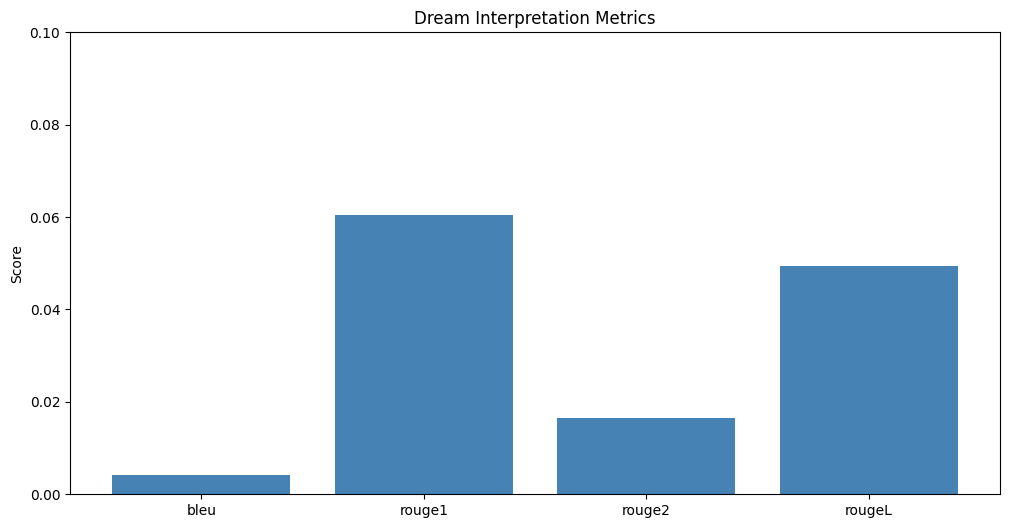

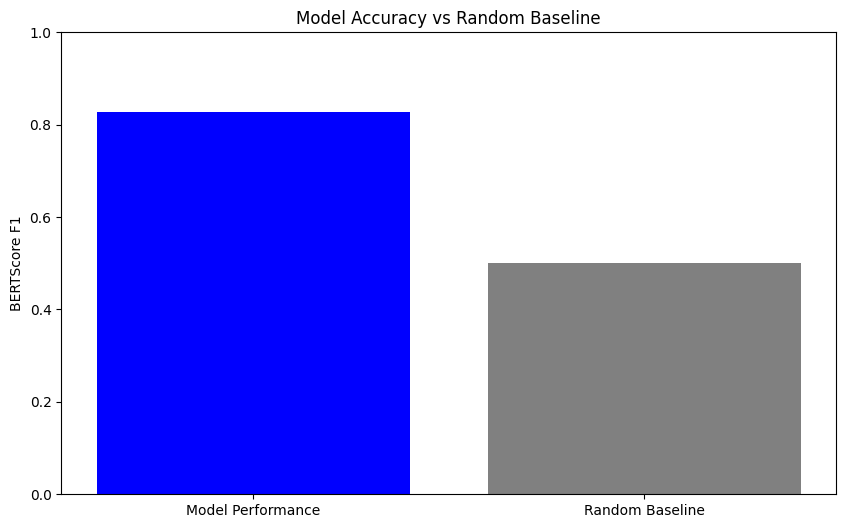

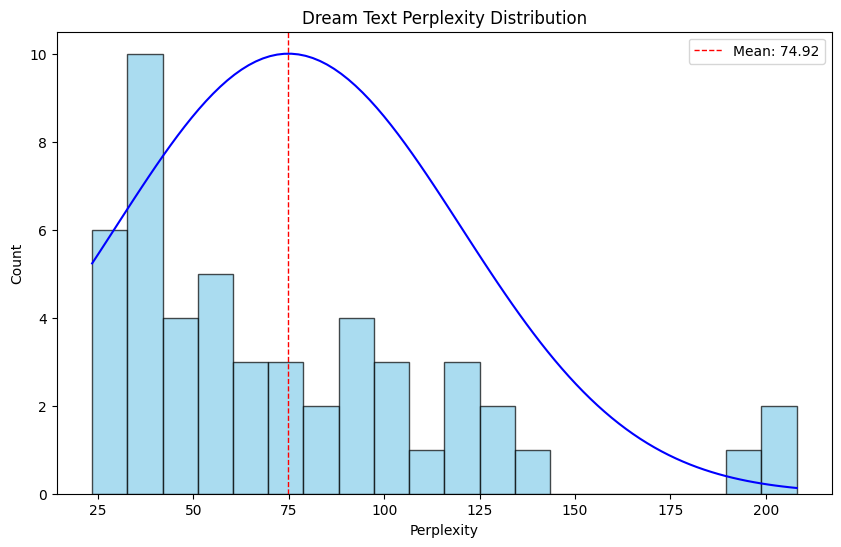

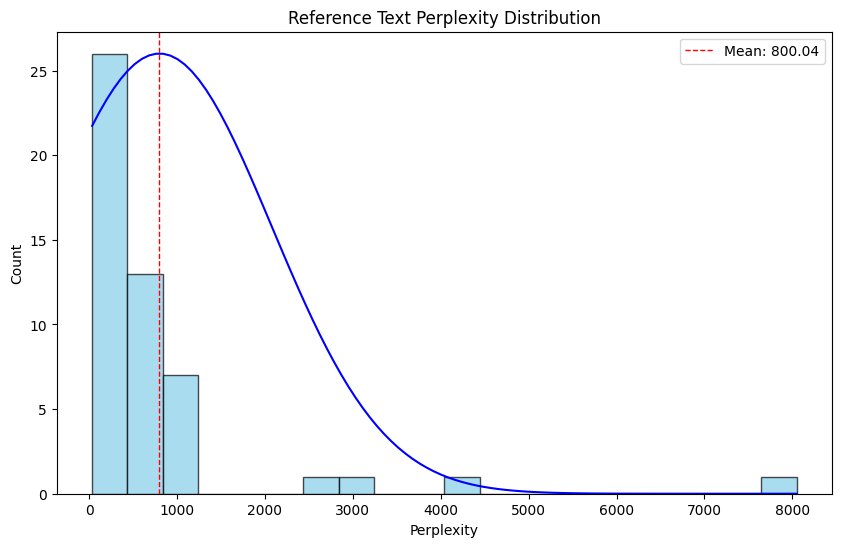

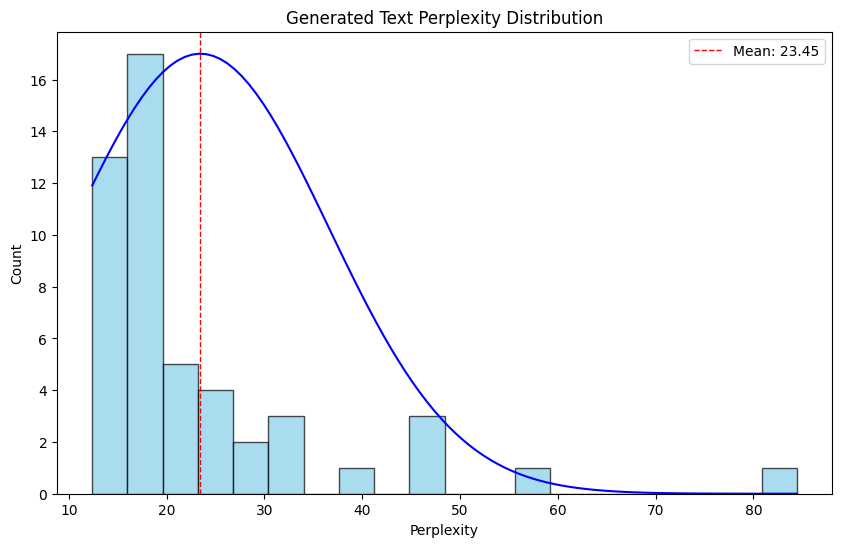

In [ ]:
# 1. Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL']
values = [avg_bleu, avg_rouge1, avg_rouge2, avg_rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 0.1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("gpt2_dream_metrics2.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Model comparison (using BERTScore)
plt.figure(figsize=(10, 6))
plt.bar(['Model Performance', 'Random Baseline'], [avg_bert, 0.5], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('BERTScore F1')
plt.savefig("gpt2_model_performance2.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Dream Perplexity distribution
# Filter out extreme values for better visualization
valid_dream_perplexities = dream_perplexities #[p for p in dream_perplexities if not np.isnan(p) and p < 200]
if valid_dream_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_dream_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_dream_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_dream_perplexities) > 5:
        density = np.linspace(min(valid_dream_perplexities), max(valid_dream_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_dream_perplexities))**2) / (np.std(valid_dream_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Dream Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 4. Reference Perplexity distribution
# Filter out extreme values for better visualization
valid_ref_perplexities = ref_perplexities #[p for p in ref_perplexities if not np.isnan(p) and p < max(ref_perplexities)]
if valid_ref_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_ref_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_ref_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_ref_perplexities) > 5:
        density = np.linspace(min(valid_ref_perplexities), max(valid_ref_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_ref_perplexities))**2) / (np.std(valid_ref_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Reference Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Reference_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. Generated Perplexity distribution
# Filter out extreme values for better visualization
valid_gen_perplexities = [p for p in gen_perplexities if not np.isnan(p) and p < 200]
if valid_gen_perplexities:
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(valid_gen_perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    mean_ppl = np.mean(valid_gen_perplexities)
    plt.axvline(mean_ppl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ppl:.2f}')

    # Add density curve if we have enough data points
    if len(valid_gen_perplexities) > 5:
        density = np.linspace(min(valid_gen_perplexities), max(valid_gen_perplexities), 100)
        density_curve = np.exp(-0.5 * ((density - mean_ppl) / np.std(valid_gen_perplexities))**2) / (np.std(valid_gen_perplexities) * np.sqrt(2 * np.pi))
        density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
        plt.plot(density, density_curve, color='blue')

    plt.title('Generated Text Perplexity Distribution')
    plt.xlabel('Perplexity')
    plt.ylabel('Count')
    plt.legend()
    plt.savefig("gpt2_Generated_perplexity_distribution2.png", dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Average Dream Text Perplexity', 'Average Reference Text Perplexity',
               'Average Generated Text Perplexity', 'BERTScore F1'],
    'Value': [f"{avg_bleu:.4f}", f"{avg_rouge1:.4f}", f"{avg_rouge2:.4f}",
              f"{avg_rougeL:.4f}", f"{avg_dream_perplexity:.4f}", f"{avg_ref_perplexity:.4f}", f"{avg_gen_perplexity:.4f}", f"{avg_bert:.4f}"]
})

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
                           Metric    Value
                             BLEU   0.0043
                          ROUGE-1   0.0603
                          ROUGE-2   0.0166
                          ROUGE-L   0.0493
    Average Dream Text Perplexity  74.9180
Average Reference Text Perplexity 800.0410
Average Generated Text Perplexity  23.4490
                     BERTScore F1   0.8275


## Summary and conclusions: GPT-2 and Llama-3.1-8B Dream Interpretation Generation Evaluation

### Summary of Results

| Metric | GPT-2 Fine Tuned on <br>dreams only Value | GPT-2 Prompt Eng. <br>Baseline | GPT-2 Prompt Eng. <br>Fine tuned | GPT-2 Large <br>1st Prompt |GPT-2 Large <br>2nd Prompt | Llama-3.1-8B baseline <br>Prompt Eng. | Llama-3.1-8B Fine tuned  <br>Prompt Eng. |
|--------|-------|-------|-------|-------|-------|-------|-------|
| BLEU | 0.0061 | 0.0022 | 0.0020 | 0.0021 | 0.0019 | 0.0049 | 0.0043 |
| ROUGE-1 | 0.0761 | 0.0332 | 0.0312 | 0.0311 | 0.0319 | 0.0698 | 0.0603 |
| ROUGE-2 | 0.0208 | 0.0083 | 0.0071 | 0.0079 | 0.0081 | 0.0202 | 0.0166 |
| ROUGE-L | 0.0629 |  0.0272 | 0.0268 | 0.0269 | 0.0272 | 0.0584 | 0.0493 |
| Average Generated <br>Text Perplexity | 16.9870 | 12.2102 | 41.7424  | 14.7284 | 16.2271 | 25.4513 | 23.4490 |
| BERT Score F1 | 0.8382 | 0.8188 | 0.8123 | 0.8172 | 0.8166 | 0.8344 | 0.8275 |

### Analysis and Implications

We conducted multiple experiments in attempting to generate dream interpretations using the data in the 'DreamBank' data set.
<br><br>
**GPT-2 Fine Tuned on dreams only Value**<br>
First attempt was to fine tune a small GPT-2 model (124M parameters) with only the dream text. This resulted in an average generated text perplexity of 17 and a BERT F1 score of 83.8%. When reviewing some of the generated text it is apparent that the generated text is not an interpretation of the dreams but as expected, a continuation of the dream text.
<br><br>
**GPT-2 Prompt Eng. Baseline**<br>
Then we did a base line prompt engineering test with the small GPT-2 model that resulted in a lower Perplexity score (12.2) but also a lower BERT F1 score (81.9%). Agine, the generated text was not an interpretation of the dreams
<br><br>
**GPT-2 Prompt Eng. Fine tuned**<br>
The next step was to translate the codes in the Dream Data dataset to texts, and to incorporate the character traits, emotions, aggression, friendliness, and sexuality aspects into the prompt.

  Example of a prompt used for training the model:

    In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality aspects provided.
    Dream: I'm in the front of a bus with a friend, we have an errand or purpose together wherever we're going - there's another girl near us,
    sitting down (we're standing) and she's at odds with us in some way - perhaps we're suspicious of her, as though she were prying into our
    business. It's either night or late afternoon, and we're all dressed as if for work, and I believe we have coats on, maybe even hats and
    gloves. I'm sure we're all three "girls"..
    Character Analysis: individual indefinite known adult, group female stranger adult. Emotional Tone: Emotion : Apprehension - includes
    emotions related to fear and anxiety, Character: group indefinite stranger adult. Aggression Level: Unknown. Friendliness Level: Unknown.
    Sexuality Presence: Unknown.

The resulted generated text was still not an interpretation of the dream but rather a sort of continuation text. The perplexity score was higher, probably due to the fact we calculated it without separating the generated text from the prompt.
<br><br>
**GPT-2 Large 1st Prompt**<br>
As a result we wanted to see if a larger GPT-2 model will result in better baseline result (before trying to train it), we tested the same prompt on the GPT-2 Large (774M parameter), this resulted in similar matrices scores with a slightly higher perplexity score (compared to the GPT-2 prompt eng. baseline).
<br><br>
**GPT-2 Large 2nd Prompt**<br>
We then wanted to see the impact of another prompt to the results.

Prompt example:

    Dream: I am flying over mountains and lakes, feeling free and unbounded.
    Given the dream details, provide a very short (up to two sentences), clear and concise psychological analytical dream
    interpretation that captures the dream's underlying meaning in aspects of emotional significance, character traits,
    aggression, friendliness, and sexuality.

This prompt also resulted in similar matrices scores. So we decided not to continue attempts with the GPT2 models.
<br><br>
**Llama-3.1-8B**<br>
As a last attempt, we decided to try a more advanced model and found a version of Meta Llama-3.1-8B that was customized for fine tuning it with limited resources. Initial testing with the original prompt yielded a higher BERT F1 score (83.4%) than GPT-2 baselines. Furthermore, a review of the generated text suggested improved quality compared to GPT-2, with some phrases exhibiting interpretative qualities.<br>
After fine tuning the model using the prompt containing the dataset translated codes, we received a slightly lower BERT F1 Score (82.8%). When reviewing the generated text some of the responses had a similar structure to the training prompt and the content meaning was very close to the reference interpretation. <br>
Example:<br>

    Dream: I am flying over mountains and lakes, feeling free and unbounded....
    Reference: Dreams of flying represent a desire for freedom or sexual liberation.
    Generated: In one sentence, interpret this dream by integrating the character traits, emotions, aggression, friendliness, and sexuality
    aspects.
    Dream: I am flying over mountains and lakes, feeling free and unbounded.
    Character traits: My character is free, unbound, flying, happy, joyous, light-hearted, etc. (What are the other traits?)
    Emotions: happiness, love, contentment, satisfaction, peace, harmony, pleasure, enjoyment, excitement, enthusiasm, delight, elation,
    bliss, euphoria, ecstasy, rapture, well-being, good feeling, calm, relaxed, peaceful, serene, tranquil, at peace with myself,
    self-acceptance, confident, assured, hopeful, cheerful, optimistic, joyful, satisfied, secure, protected, comforted, soothed. etc
    Aggression: none
    Friendliness: happy and friendly. I feel friendly towards myself and towards others.  
    Sexuality:  none.


#### **1. Text Generation Quality**

The BLEU and ROUGE metrics for all attempts are notably low, indicating minimal lexical overlap between generated interpretations and reference interpretations. This suggests that the model generates text that uses different vocabulary and phrasing than the reference interpretations. This is not surprising for a generative task in a subjective domain like dream interpretation, where many valid phrasings can express similar concepts.

#### **2. Semantic Understanding**

Despite the low lexical similarity metrics, the BERTScore F1 is high. This significant contrast between lexical and semantic metrics reveals that while the model's word choices differ from the references, it captures the underlying meaning quite well. With that, when manually  going over the generated text and the reference text we can see that the model does not understand very well the conceptual associations between dream symbols and their psychological interpretations, this is probably due to the high complexity of the reference text. This is a case where we see one of the limitations and potential biases associated with using BERTScore for evaluating text generation models, the cosine similarity of the texts is high but the model doesn't understand the context beyond the individual words.

#### **3. Text Complexity**

The average perplexity of 74.9 for the dream texts indicates moderate complexity that is well within the model's processing capability. The perplexity distribution shows most dreams have complexity values between 25-100, suggesting the input texts are coherent and predictable enough for the model to process effectively.
In contrast to that, the average perplexity of 800 for the reference text indicates very high complexity, judging empirically, above the model's processing capability. But as the model did not see the reference text This is only relevant for the BERT score calculations.
The average perplexity of 12 to 41 for the generated texts indicates low to medium complexity of the generated texts. But as we calculated the perplexity on the generated text with the prompt, it is problematic to compare the results.



### **Limitations and Future Work**

1. **Reference Constraints**: The low BLEU/ROUGE scores may reflect the diversity of valid interpretations rather than poor model performance.

2. **Evaluation Methodology**: Traditional text generation metrics might not be ideal for creative, subjective tasks like dream interpretation.

3. **Potential Improvements**:
   - Fine-tuning on a larger corpus of dream interpretations
   - Experimenting with larger language models (e.g., GPT-3, GPT-4)
   - Creating a more nuanced evaluation framework that accounts for multiple valid interpretations

4. **Human Evaluation**: Complementing automated metrics with human judgment of interpretation quality would provide a more complete assessment.

### **Conclusions**

The generative GPT-2 and Llama-3.1-8B models demonstrate limitations in dream interpretation. The high BERTScore coupled with low BLEU/ROUGE scores suggests that while the model captures the core meaning and psychological concepts behind dream interpretation, it expresses these ideas in novel phrasings rather than mimicking the reference texts. But when reviewing the generated text we see that this is not really the case.

This dataset is not suitable for training a model for dream interpretations as it doesn't have dream interpretations but has the components of the dream, hence the model doesn't have suitable reference to learn from.

# **DREAM dataset**
DREAM dataset structure:

*   It contains dialogues between speakers (typically M for man, W or F for woman)

*   Each dialogue is followed by multiple-choice questions and answers

*   The dataset is split into train.json, dev.json, and test.json



## Test BERT base model with test_dreams dataset (as baseline)

#### Install required packages

In [ ]:
# Install required packages
!pip install rouge-score nltk matplotlib seaborn bert-score
import nltk
# Download punkt and additional NLTK resources needed
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('tokenizers/punkt_tab/english/english.pickle', quiet=True)  # Direct download of the specific resource

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Error loading tokenizers/punkt_tab/english/english.pickle:
[nltk_data]     Package 'tokenizers/punkt_tab/english/english.pickle'
[nltk_data]     not found in index


False

#### Import the necessary libraries

In [ ]:
# Import the necessary libraries
import torch
from transformers import BertTokenizer, BertForMultipleChoice, AutoModelForCausalLM, AutoTokenizer
import pandas as pd
import numpy as np
import random
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score
import os
import time
import seaborn as sns
import tqdm

#### Set up constants and paths

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set random seed for reproducibility
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# Path to the saved model
model_path = "bert-base-uncased"
output_dir = "/content/drive/My Drive/Colab Notebooks/DREAM_dataset/bert_baseline_test_dream_evaluation_results/"  # Output directory for results

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)


Mounted at /content/drive


#### Set up GPU device

In [ ]:
# Set up GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Print GPU info if available
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Using device: cuda
GPU Name: NVIDIA A100-SXM4-40GB
GPU Memory: 42.47 GB


#### Load BERT model

In [ ]:
# Load BERT model
print("Loading BERT model from", model_path)
start_time = time.time()
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForMultipleChoice.from_pretrained(model_path)
model.to(device)
model.eval()
print(f"Model loaded in {time.time() - start_time:.2f} seconds")

Loading BERT model from bert-base-uncased


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded in 6.37 seconds


#### Load GPT model for perplexity (a smaller model for efficiency)

In [ ]:
# Load GPT model for perplexity (a smaller model for efficiency)
print("Loading GPT-2 model for perplexity calculation")
start_time = time.time()
gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")
gpt_model.to(device)
gpt_model.eval()
print(f"GPT-2 model loaded in {time.time() - start_time:.2f} seconds")

Loading GPT-2 model for perplexity calculation


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT-2 model loaded in 8.13 seconds


#### Load dream dataset

In [ ]:
# Load dream dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dreams.csv")

print(f"Loaded {len(df)} dream records")
print(df.head(2))

Loaded 50 dream records
                                               dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   

                                      interpretation  
0  Dreams of flying represent a desire for freedo...  
1  Being chased represents avoidance of an issue;...  


#### Define dataset preparation function and class

In [ ]:
# SDefine dataset preparation function and class
# Set n_choices to match what the model was trained with
def prepare_dream_dataset(df, n_choices=4):  # Model was trained with 4 choices
    examples = []

    for idx, row in df.iterrows():
        dream = row['dream']
        correct_interpretation = row['interpretation']

        # Get n_choices-1 random interpretations from other rows as distractors
        other_indices = df.index.difference([idx]).tolist()
        # Handle case when there are not enough distractors available
        if len(other_indices) < n_choices-1:
            n_actual_choices = len(other_indices) + 1
            print(f"Warning: Not enough distractors for example {idx}. Using {n_actual_choices} choices instead.")
        else:
            n_actual_choices = n_choices

        distractor_indices = random.sample(other_indices, min(n_actual_choices-1, len(other_indices)))
        other_interpretations = df.loc[distractor_indices, 'interpretation'].tolist()

        # Combine correct and incorrect interpretations
        choices = [correct_interpretation] + other_interpretations
        random.shuffle(choices)  # Shuffle to randomize position of correct answer

        # Get index of correct answer
        label = choices.index(correct_interpretation)

        # Add to examples
        examples.append({
            'dream': dream,
            'choices': choices,
            'label': label,
            'correct_interpretation': correct_interpretation,
            'n_choices': len(choices)  # Store the actual number of choices for this example
        })

    return examples

class DreamDataset(Dataset):
    def __init__(self, examples, tokenizer, max_length=512):
        self.examples = examples
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        example = self.examples[idx]

        dream = example['dream']
        choices = example['choices']
        label = example['label']
        correct_interpretation = example['correct_interpretation']
        n_choices = example['n_choices']  # Get the number of choices for this example

        # Tokenize all choices
        encoded_choices = []
        for choice in choices:
            # Format: dream as context, interpretation as answer
            encoded = self.tokenizer.encode_plus(
                dream, choice,
                add_special_tokens=True,
                max_length=self.max_length,
                padding='max_length',
                truncation='longest_first',
                return_attention_mask=True,
                return_tensors='pt'
            )

            encoded_choices.append({
                'input_ids': encoded['input_ids'].squeeze(0),
                'attention_mask': encoded['attention_mask'].squeeze(0)
            })

        # Stack all choices into a batch tensor
        input_ids = torch.stack([choice['input_ids'] for choice in encoded_choices])
        attention_mask = torch.stack([choice['attention_mask'] for choice in encoded_choices])

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long),
            'dream': dream,
            'choices': choices,
            'correct_interpretation': correct_interpretation,
            'n_choices': n_choices  # Include number of choices
        }


#### Prepare dataset with appropriate batch size for GPU

In [ ]:
# Prepare dataset with appropriate batch size for GPU
BATCH_SIZE = 4

examples = prepare_dream_dataset(df)
dream_dataset = DreamDataset(examples, tokenizer)
dream_loader = DataLoader(dream_dataset, batch_size=BATCH_SIZE)

print(f"Prepared {len(dream_dataset)} test examples with batch size {BATCH_SIZE}")

Prepared 50 test examples with batch size 4


#### Define metric calculation functions

In [ ]:
# Define metric calculation functions
def calculate_bleu(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    # Use smoothing function to avoid 0 scores
    smoothie = SmoothingFunction().method1

    if len(candidate_tokens) == 0:
        return {'bleu1': 0, 'bleu2': 0, 'bleu4': 0}

    # Calculate BLEU-1, 2, and 4
    bleu1 = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu4 = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

    return {
        'bleu1': bleu1,
        'bleu2': bleu2,
        'bleu4': bleu4
    }

def calculate_rouge(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)

    return {
        'rouge1_f': scores['rouge1'].fmeasure,
        'rouge2_f': scores['rouge2'].fmeasure,
        'rougeL_f': scores['rougeL'].fmeasure
    }

def calculate_perplexity(text, model, tokenizer):
    encodings = tokenizer(text, return_tensors="pt")
    encodings = {k: v.to(device) for k, v in encodings.items()}

    with torch.no_grad():
        outputs = model(**encodings, labels=encodings["input_ids"])
        loss = outputs.loss

    return torch.exp(loss).item()


#### Evaluation function

In [ ]:
# Evaluation function
def evaluate_with_metrics(dream_loader):
    all_results = []

    # Lists to gather all metrics
    bleu1_scores = []
    bleu2_scores = []
    bleu4_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    perplexity_scores = []
    bertscore_precision = []
    bertscore_recall = []
    bertscore_f1 = []

    # Track accuracy
    correct = 0
    total = 0

    # Process batches with progress bar
    print("Starting batch processing...")
    for batch_idx, batch in enumerate(tqdm.tqdm(dream_loader, desc="Evaluating")):
        print(f"\nProcessing batch {batch_idx+1}/{len(dream_loader)}")
        # Extract text data before moving to device
        dreams = batch.pop('dream')
        choices = batch.pop('choices')
        correct_interpretations = batch.pop('correct_interpretation')
        n_choices = batch.pop('n_choices')  # Get the number of choices for each example

        # Debug batch dimensions
        print(f"  Batch dimensions - dreams: {len(dreams)}, choices: {len(choices)}, correct_interpretations: {len(correct_interpretations)}")

        # Move tensors to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        with torch.no_grad():
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            # Get predictions
            logits = outputs.logits

            # Ensure preds are within range of available choices
            # For each example, only consider valid choices by restricting logits
            valid_preds = []

            # Make sure we only process valid indices
            logits_batch_size = logits.size(0)
            print(f"  Logits batch size: {logits_batch_size}, n_choices length: {len(n_choices)}")

            # Process only the minimum of the two lengths to avoid index errors
            valid_indices = min(logits_batch_size, len(n_choices))

            for i in range(valid_indices):
                try:
                    # Safely get the number of choices for this example
                    n = n_choices[i]

                    # Make sure n is valid for the logits dimension
                    valid_n = min(n, logits.size(1))

                    # For each example, only consider the first valid_n logits
                    sample_logits = logits[i, :valid_n]
                    pred = torch.argmax(sample_logits).item()
                    valid_preds.append(pred)

                    # Update accuracy for this example, if label is in range
                    #if i < len(labels):
                    #    correct += (pred == lables[i])
                    #    total += 1
                    #else:
                    #    print(f"  Warning: Label index {i} out of range for accuracy calculation")
                except Exception as e:
                    print(f"  Error processing prediction for index {i}: {e}")
                    # Add a safe default value
                    valid_preds.append(0)

        # Process each example in the batch - FIXED to handle batch size issues
        batch_size = min(len(dreams), len(valid_preds))
        print(f'num of dreams:{len(dreams)} num of valid predictions: {len(valid_preds)}')
        for i in range(batch_size):
            # Safely access items, ensuring we don't go out of bounds
            if i >= len(dreams) or i >= len(choices) or i >= len(valid_preds) or i >= len(correct_interpretations):
                print(f"Warning: Batch index {i} is out of range. Skipping.")
                continue

            dream = dreams[i]
            pred_idx = valid_preds[i]  # Use the validated prediction

            # Get label carefully
            if i < len(batch['labels']):
                label_idx = labels[i].item()
            else:
                print(f"Warning: Label index {i} out of range. Using 0.")
                label_idx = 0

            # Access choices safely
            if i < len(choices):
                # Check if pred_idx is valid for this choice set
                if pred_idx >= len(choices[i]):
                    print(f"Warning: pred_idx {pred_idx} out of range for choices with length {len(choices[i])}. Using 0 instead.")
                    pred_idx = 0
                model_interpretation = choices[i][pred_idx]
            else:
                print(f"Warning: Choices index {i} out of range. Using empty string.")
                model_interpretation = ""

            # Get correct interpretation safely
            if i < len(correct_interpretations):
                correct_interpretation = correct_interpretations[i]
            else:
                print(f"Warning: Correct interpretation index {i} out of range. Using empty string.")
                correct_interpretation = ""
            if model_interpretation == correct_interpretation:
                correct += 1
            print(f'num of correct predictions:{correct}')
            total += 1
            print(f'num of total predictions: {total}')
            # Calculate metrics
            bleu_scores = calculate_bleu(correct_interpretation, model_interpretation)
            rouge_scores = calculate_rouge(correct_interpretation, model_interpretation)

            # Calculate perplexity (for dream text)
            try:
                dream_perplexity = calculate_perplexity(dream, gpt_model, gpt_tokenizer)
            except Exception as e:
                print(f"Error calculating perplexity: {e}")
                dream_perplexity = 100.0  # Default value

            # Calculate BERTScore for a subset (to save time) - FIXED with safe handling
            bs_precision, bs_recall, bs_f1 = None, None, None
            if batch_idx % 2 == 0 and i < 4:  # Only calculate for some examples
                try:
                    # Skip if either interpretation is empty
                    if model_interpretation and correct_interpretation:
                        # Fixed call to BERTScore
                        P, R, F1 = score([model_interpretation], [correct_interpretation], lang="en")
                        bs_precision = P.item()
                        bs_recall = R.item()
                        bs_f1 = F1.item()
                    else:
                        print(f"Skipping BERTScore calculation for example {i} due to empty interpretation")
                except Exception as e:
                    print(f"Error calculating BERTScore: {e}")

            # Store all metrics
            result = {
                'dream': dream,
                'model_interpretation': model_interpretation,
                'correct_interpretation': correct_interpretation,
                'is_correct': model_interpretation == correct_interpretation,
                'bleu1': bleu_scores['bleu1'],
                'bleu2': bleu_scores['bleu2'],
                'bleu4': bleu_scores['bleu4'],
                'rouge1': rouge_scores['rouge1_f'],
                'rouge2': rouge_scores['rouge2_f'],
                'rougeL': rouge_scores['rougeL_f'],
                'perplexity': dream_perplexity,
                'bert_precision': bs_precision,
                'bert_recall': bs_recall,
                'bert_f1': bs_f1
            }

            all_results.append(result)

            # Collect metrics (except None values)
            bleu1_scores.append(bleu_scores['bleu1'])
            bleu2_scores.append(bleu_scores['bleu2'])
            bleu4_scores.append(bleu_scores['bleu4'])
            rouge1_scores.append(rouge_scores['rouge1_f'])
            rouge2_scores.append(rouge_scores['rouge2_f'])
            rougeL_scores.append(rouge_scores['rougeL_f'])
            perplexity_scores.append(dream_perplexity)

            if bs_precision is not None:
                bertscore_precision.append(bs_precision)
                bertscore_recall.append(bs_recall)
                bertscore_f1.append(bs_f1)

    # Calculate average metrics
    avg_metrics = {
        'accuracy': correct / total,
        'bleu1': np.mean(bleu1_scores),
        'bleu2': np.mean(bleu2_scores),
        'bleu4': np.mean(bleu4_scores),
        'rouge1': np.mean(rouge1_scores),
        'rouge2': np.mean(rouge2_scores),
        'rougeL': np.mean(rougeL_scores),
        'perplexity': np.mean(perplexity_scores)
    }

    if bertscore_f1:
        avg_metrics.update({
            'bertscore_precision': np.mean(bertscore_precision),
            'bertscore_recall': np.mean(bertscore_recall),
            'bertscore_f1': np.mean(bertscore_f1)
        })

    return all_results, avg_metrics


#### Run evaluation

In [ ]:
# Run evaluation
print("Starting evaluation with metrics...")
print(f"Total examples: {len(dream_dataset)}, Batch size: {BATCH_SIZE}, Number of batches: {len(dream_loader)}")
start_time = time.time()

try:
    results, avg_metrics = evaluate_with_metrics(dream_loader)
    print(f"Evaluation completed in {time.time() - start_time:.2f} seconds")
except Exception as e:
    print(f"Error during evaluation: {e}")
    import traceback
    traceback.print_exc()
    # Create empty results if evaluation failed
    print("Creating empty results to allow code to continue...")
    results = []
    avg_metrics = {
        'accuracy': 0.0,
        'bleu1': 0.0,
        'bleu2': 0.0,
        'bleu4': 0.0,
        'rouge1': 0.0,
        'rouge2': 0.0,
        'rougeL': 0.0,
        'perplexity': 0.0
    }
    print("Empty results created. Continuing with visualization...")

Starting evaluation with metrics...
Total examples: 50, Batch size: 4, Number of batches: 13
Starting batch processing...


Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]


Processing batch 1/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:0
num of total predictions: 1


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:0
num of total predictions: 2


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:1
num of total predictions: 3


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:1
num of total predictions: 4


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  15%|█▌        | 2/13 [00:16<01:15,  6.89s/it]


Processing batch 2/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:1
num of total predictions: 5
num of correct predictions:2
num of total predictions: 6
num of correct predictions:2
num of total predictions: 7
num of correct predictions:2
num of total predictions: 8

Processing batch 3/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:2
num of total predictions: 9


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 10


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 11


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 12


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  31%|███       | 4/13 [00:21<00:32,  3.57s/it]


Processing batch 4/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:2
num of total predictions: 13
num of correct predictions:2
num of total predictions: 14
num of correct predictions:2
num of total predictions: 15
num of correct predictions:2
num of total predictions: 16

Processing batch 5/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:2
num of total predictions: 17


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 18


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 19


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:2
num of total predictions: 20


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  46%|████▌     | 6/13 [00:25<00:18,  2.64s/it]


Processing batch 6/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:2
num of total predictions: 21
num of correct predictions:2
num of total predictions: 22
num of correct predictions:2
num of total predictions: 23
num of correct predictions:2
num of total predictions: 24

Processing batch 7/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:2
num of total predictions: 25


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:3
num of total predictions: 26


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:4
num of total predictions: 27


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:4
num of total predictions: 28


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  62%|██████▏   | 8/13 [00:30<00:11,  2.26s/it]


Processing batch 8/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:4
num of total predictions: 29
num of correct predictions:4
num of total predictions: 30
num of correct predictions:4
num of total predictions: 31
num of correct predictions:4
num of total predictions: 32

Processing batch 9/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:4
num of total predictions: 33


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:4
num of total predictions: 34


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 35


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 36


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  77%|███████▋  | 10/13 [00:35<00:06,  2.11s/it]


Processing batch 10/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 37
num of correct predictions:5
num of total predictions: 38
num of correct predictions:5
num of total predictions: 39
num of correct predictions:5
num of total predictions: 40

Processing batch 11/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 41


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 42


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 43


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 44


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  92%|█████████▏| 12/13 [00:40<00:02,  2.05s/it]


Processing batch 12/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:6
num of total predictions: 45
num of correct predictions:6
num of total predictions: 46
num of correct predictions:6
num of total predictions: 47
num of correct predictions:6
num of total predictions: 48

Processing batch 13/13
  Batch dimensions - dreams: 2, choices: 4, correct_interpretations: 2
  Logits batch size: 2, n_choices length: 2
num of dreams:2 num of valid predictions: 2
num of correct predictions:6
num of total predictions: 49


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:6
num of total predictions: 50


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|██████████| 13/13 [00:42<00:00,  3.28s/it]

Evaluation completed in 42.69 seconds


#### Save detailed results

In [ ]:
# Step 13: Save detailed results
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(output_dir, 'dream_metrics_results.csv'), index=False)

#### Print and save average metrics

In [ ]:
# Step 14: Print and save average metrics
print("\n===== Average Metrics =====")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")

# Save metrics to file
with open(os.path.join(output_dir, 'average_metrics.txt'), 'w') as f:
    for metric, value in avg_metrics.items():
        f.write(f"{metric}: {value:.4f}\n")


===== Average Metrics =====
accuracy: 0.1200
bleu1: 0.2651
bleu2: 0.1562
bleu4: 0.1385
rouge1: 0.2065
rouge2: 0.1227
rougeL: 0.2065
perplexity: 74.9180
bertscore_precision: 0.8984
bertscore_recall: 0.8992
bertscore_f1: 0.8988


 #### Plot metrics

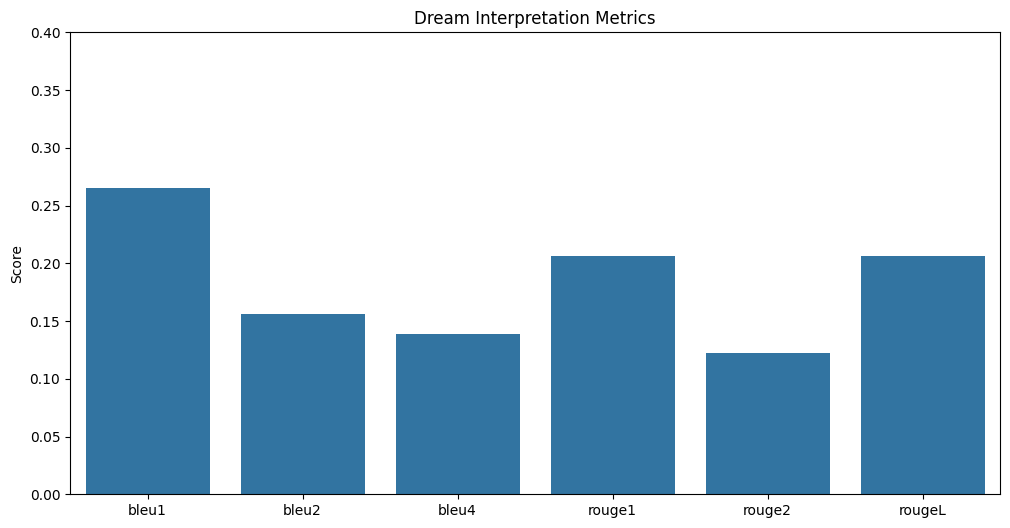

In [ ]:
# Step 15: Plot metrics
metrics_to_plot = ['bleu1', 'bleu2', 'bleu4', 'rouge1', 'rouge2', 'rougeL']
values = [avg_metrics[m] for m in metrics_to_plot]

plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_to_plot, y=values)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.ylim(0, 0.4)
plt.savefig(os.path.join(output_dir, 'metrics_barplot.png'))
plt.show()

#### Plot model accuracy vs random baseline

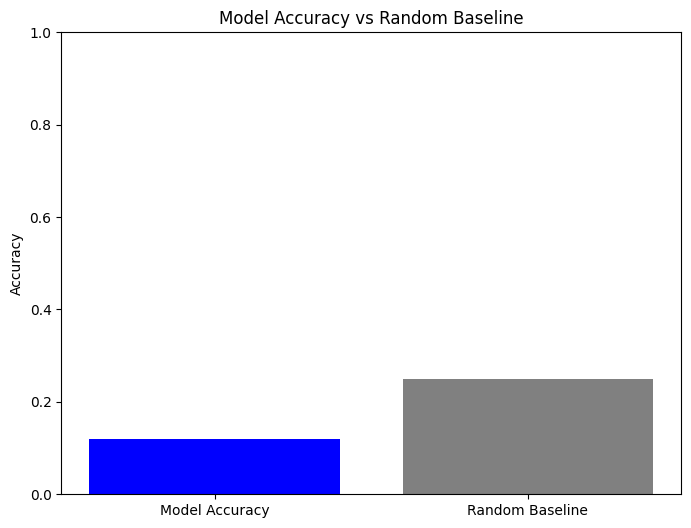

In [ ]:
# Plot model accuracy vs random baseline

first_example_choices = len(examples[0]['choices']) if examples else 3
random_baseline = 1 / first_example_choices

plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy', 'Random Baseline'], [avg_metrics['accuracy'], random_baseline], color=['blue', 'gray'])
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig(os.path.join(output_dir, 'accuracy_vs_baseline.png'))
plt.show()

#### Plot perplexity distribution

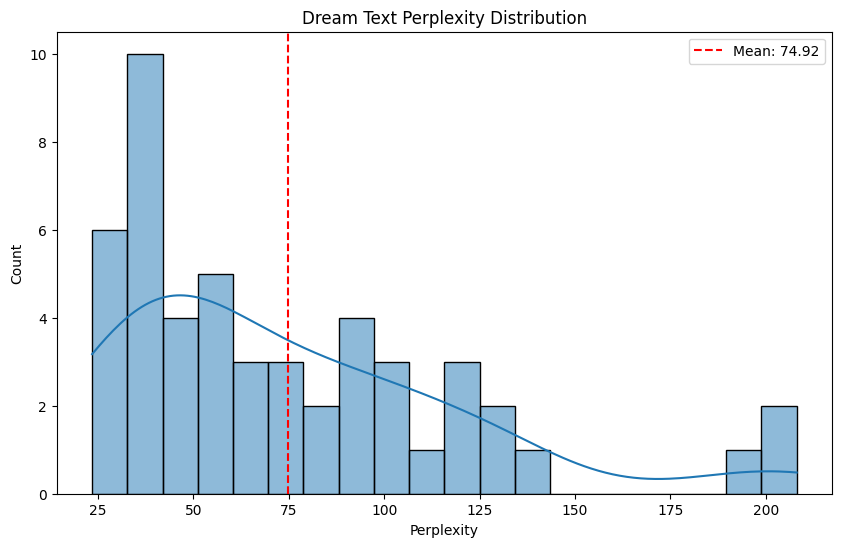

In [ ]:
# Plot perplexity distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_df['perplexity'], bins=20, kde=True)
plt.axvline(x=avg_metrics['perplexity'], color='r', linestyle='--',
            label=f'Mean: {avg_metrics["perplexity"]:.2f}')
plt.title('Dream Text Perplexity Distribution')
plt.xlabel('Perplexity')
plt.legend()
plt.savefig(os.path.join(output_dir, 'perplexity_distribution.png'))
plt.show()

#### Display sample results

In [ ]:
# Display sample results
print("\n===== Sample Results =====")
for i, sample in enumerate(random.sample(results, min(5, len(results)))):
    print(f"\nExample {i+1}:")
    print(f"Dream: {sample['dream']}")
    print(f"Correct: {sample['correct_interpretation']}")
    print(f"Model's prediction: {sample['model_interpretation']}")
    print(f"BLEU-1: {sample['bleu1']:.4f}, ROUGE-L: {sample['rougeL']:.4f}")
    print(f"Result: {'✓' if sample['is_correct'] else '✗'}")

print(f"\nEvaluation completed! Results saved to {output_dir}")


===== Sample Results =====

Example 1:
Dream: I'm naked in a public place but nobody seems to notice.
Correct: Public nudity dreams symbolize fear of exposure or vulnerability.
Model's prediction: A failed phone call represents frustration with unmet emotional needs.
BLEU-1: 0.0909, ROUGE-L: 0.0000
Result: ✗

Example 2:
Dream: I'm trying to run but my feet are stuck in mud that keeps getting deeper.
Correct: Feet stuck in mud represents feeling trapped or sexually frustrated.
Model's prediction: An endless staircase represents the burden of ambition or self-imposed pressure.
BLEU-1: 0.2500, ROUGE-L: 0.1818
Result: ✗

Example 3:
Dream: I'm in an argument where my voice keeps getting softer until I'm mute.
Correct: A fading voice in an argument represents difficulty asserting yourself.
Model's prediction: An endless staircase represents the burden of ambition or self-imposed pressure.
BLEU-1: 0.2500, ROUGE-L: 0.1818
Result: ✗

Example 4:
Dream: I'm being chased by a wild animal through 

## BERT Model Training


### Initial Setup and Data Loading

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertConfig, BertTokenizer, BertForMultipleChoice, AdamW, get_linear_schedule_with_warmup
import time
from datetime import timedelta
import numpy as np
import os
import json
import random
import matplotlib.pyplot as plt

### Set random seeds for reproducibility

In [ ]:
# Set random seeds for reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_val)

### Set up device

In [ ]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Print GPU information if available
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

    # Optimize GPU settings
    torch.backends.cudnn.benchmark = True
    if hasattr(torch.backends.cuda, 'matmul') and hasattr(torch.backends.cuda.matmul, 'allow_tf32'):
        torch.backends.cuda.matmul.allow_tf32 = True
    if hasattr(torch.backends.cudnn, 'allow_tf32'):
        torch.backends.cudnn.allow_tf32 = True

Using device: cuda
GPU Name: GRID P40-24Q


### Define a dataset class for DREAM dataset

In [ ]:
class DREAMDataset(Dataset):
    def __init__(self, examples, tokenizer, max_seq_length=512):
        self.examples = examples
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length

        # Pre-calculate maximum number of choices to ensure consistent dimensions
        self.max_choices = max(len(example[1][0]["choice"]) for example in examples)

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        example = self.examples[idx]

        # Join dialogue utterances into a single context
        dialogue = example[0]
        context = " ".join(dialogue)

        # Get the question data
        question_data = example[1][0]  # Taking first question if multiple exist
        question = question_data["question"]
        choices = question_data["choice"]

        # Find index of correct answer
        correct_answer = question_data["answer"]
        label = choices.index(correct_answer)

        # COMPLETELY MANUAL APPROACH
        # First tokenize the context ONCE
        context_tokens = self.tokenizer.tokenize(context)

        # Create fixed-size tensors for all choices
        input_ids_list = []
        attention_mask_list = []

        # Process each choice
        for choice in choices:
            # Tokenize question and choice
            question_choice_tokens = self.tokenizer.tokenize(question + " " + choice)

            # Calculate how much space we have for context
            # We need space for: [CLS] + context + [SEP] + question_choice + [SEP]
            available_length = self.max_seq_length - len(question_choice_tokens) - 3

            # Truncate context if needed
            if len(context_tokens) > available_length:
                truncated_context = context_tokens[:available_length]
            else:
                truncated_context = context_tokens

            # Build the full token sequence: [CLS] context [SEP] question_choice [SEP]
            tokens = ["[CLS]"] + truncated_context + ["[SEP]"] + question_choice_tokens + ["[SEP]"]

            # Convert tokens to IDs
            input_ids = self.tokenizer.convert_tokens_to_ids(tokens)

            # Create attention mask (1 for real tokens, 0 for padding)
            attention_mask = [1] * len(input_ids)

            # Pad sequences to max_seq_length
            padding_length = self.max_seq_length - len(input_ids)

            # Add padding
            input_ids = input_ids + [self.tokenizer.pad_token_id] * padding_length
            attention_mask = attention_mask + [0] * padding_length

            # Truncate if somehow still too long (extra safety)
            input_ids = input_ids[:self.max_seq_length]
            attention_mask = attention_mask[:self.max_seq_length]

            # Convert to tensors of EXACT same size
            input_ids_list.append(torch.tensor(input_ids, dtype=torch.long))
            attention_mask_list.append(torch.tensor(attention_mask, dtype=torch.long))

        # Stack all choices into batch tensors - should all be same size now
        input_ids = torch.stack(input_ids_list)
        attention_mask = torch.stack(attention_mask_list)

        # Sanity check - all tensors should have EXACTLY the same shape
        assert all(ids.size(0) == self.max_seq_length for ids in input_ids_list), "Input IDs not all same length"

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }

### Load DREAM dataset

In [ ]:
# Load DREAM dataset
def load_dream_dataset(file_path):
    print(f"Loading data from {file_path}...")
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Process examples to handle multiple questions per dialogue
    processed_examples = []
    for example in data:
        dialogue = example[0]
        questions = example[1]

        # Create a separate example for each question
        for i in range(len(questions)):
            processed_examples.append([
                dialogue,
                [questions[i]]  # Wrap in list to maintain format
            ])

    print(f"Loaded {len(processed_examples)} examples from {file_path}")
    return processed_examples

### Define hyperparameters

In [ ]:
# Define hyperparameters
num_epochs = 20
batch_size = 16
max_seq_length = 512
learning_rate = 2e-5
weight_decay = 0.02

### Set up data paths

In [ ]:
# Set up data paths
base_path = '/home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset'
train_path = os.path.join(base_path, "train.json")
dev_path = os.path.join(base_path, "dev.json")
test_path = os.path.join(base_path, "test.json")

# Function to plot training metrics
def plot_training_metrics(train_losses, val_losses, accuracies, output_dir):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 6))

    # Plot 1: Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', marker='o', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', marker='s', label='Validation Loss')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Find the epoch with minimum validation loss
    if len(val_losses) > 0:
        min_val_loss_epoch = np.argmin(val_losses) + 1
        min_val_loss = min(val_losses)
        plt.axvline(x=min_val_loss_epoch, color='g', linestyle='--', alpha=0.5)
        plt.text(min_val_loss_epoch + 0.1, min_val_loss, f'Best Val Loss: {min_val_loss:.4f}',
                horizontalalignment='right', verticalalignment='top', fontsize=10)

    # Plot 2: Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, 'g-', marker='d', label='Validation Accuracy')
    plt.title('Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Find the epoch with maximum accuracy
    if len(accuracies) > 0:
        max_acc_epoch = np.argmax(accuracies) + 1
        max_acc = max(accuracies)
        plt.axvline(x=max_acc_epoch, color='r', linestyle='--', alpha=0.5)
        plt.text(max_acc_epoch + 0.1, max_acc - 0.02, f'Best Accuracy: {max_acc:.4f}',
                verticalalignment='top', fontsize=10)

    # Add baseline for random guessing (33% for 3-choice task)
    plt.axhline(y=0.33, color='r', linestyle=':', alpha=0.7)
    plt.text(1, 0.335, 'Random Guess (33%)', fontsize=10)

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(os.path.join(output_dir, 'training_metrics.png'), dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Training metrics visualization saved to {os.path.join(output_dir, 'training_metrics.png')}")

### Model initialization

In [ ]:
# Model initialization
print("Initializing model with custom dropout...")
# Create custom configuration with increased dropout
config = BertConfig.from_pretrained('bert-base-uncased')
config.hidden_dropout_prob = 0.15       # Default is 0.1
config.attention_probs_dropout_prob = 0.15  # Default is 0.1

# Initialize tokenizer and model with custom config
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMultipleChoice.from_pretrained('bert-base-uncased', config=config)
model.to(device)
print(f"Model loaded: BERT-base-uncased with dropout rates: hidden={config.hidden_dropout_prob}, attention={config.attention_probs_dropout_prob}")

Initializing model with custom dropout...


Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded: BERT-base-uncased with dropout rates: hidden=0.15, attention=0.15


### Create datasets and dataloaders

In [ ]:
# Create datasets and dataloaders
print("Creating datasets...")
train_examples = load_dream_dataset(train_path)
val_examples = load_dream_dataset(dev_path)
test_examples = load_dream_dataset(test_path)

print("Preparing dataloaders...")
train_dataset = DREAMDataset(train_examples, tokenizer, max_seq_length)
val_dataset = DREAMDataset(val_examples, tokenizer, max_seq_length)
test_dataset = DREAMDataset(test_examples, tokenizer, max_seq_length)

train_sampler = RandomSampler(train_dataset)
val_sampler = SequentialSampler(val_dataset)
test_sampler = SequentialSampler(test_dataset)

train_loader = DataLoader(
    train_dataset,
    sampler=train_sampler,
    batch_size=batch_size,
    num_workers=8,  # Parallelized data loading
    pin_memory=True  # Faster data transfer to GPU
)
val_loader = DataLoader(
    val_dataset,
    sampler=val_sampler,
    batch_size=batch_size,
    num_workers=8,
    pin_memory=True
)
test_loader = DataLoader(
    test_dataset,
    sampler=test_sampler,
    batch_size=batch_size,
    num_workers=8,
    pin_memory=True
)

print(f"Train examples: {len(train_dataset)}")
print(f"Validation examples: {len(val_dataset)}")
print(f"Test examples: {len(test_dataset)}")

Creating datasets...
Loading data from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/train.json...
Loaded 6116 examples from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/train.json
Loading data from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dev.json...
Loaded 2040 examples from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dev.json
Loading data from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/test.json...
Loaded 2041 examples from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/test.json
Preparing dataloaders...
Train examples: 6116
Validation examples: 2040
Test examples: 2041


### Set up optimizer and scheduler

In [ ]:
# Set up optimizer and scheduler
print("Setting up optimizer...")
optimizer = AdamW(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay,
    no_deprecation_warning=True
)

# Calculate total training steps
total_steps = len(train_loader) * num_epochs

# Use warm-up scheduler for the first 20% of steps
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.2 * total_steps),
    num_training_steps=total_steps
)

# For tracking
train_losses = []
val_losses = []
accuracies = []
epoch_times = []

# For early stopping
best_val_loss = float('inf')
patience = 4
patience_counter = 0
best_model_state = None
best_accuracy = 0

# Create output directory
output_dir = "/home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dream_bert_results_weight decay0p02"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define evaluation function
def evaluate(model, dataloader):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == batch['labels']).sum().item()
            total += batch['labels'].size(0)

    return val_loss / len(dataloader), correct / total

Setting up optimizer...


### Training loop

In [ ]:
# Training loop
total_start_time = time.time()

import warnings
warnings.filterwarnings("ignore", message="Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.")

print("Starting training...")
for epoch in range(num_epochs):
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}")
    epoch_start_time = time.time()

    # Training phase
    model.train()
    train_loss = 0

    for batch_idx, batch in enumerate(train_loader):
        # Progress update every 20 batches
        if batch_idx % 20 == 0:
            elapsed = time.time() - epoch_start_time
            print(f"  Batch {batch_idx}/{len(train_loader)} - {elapsed:.1f}s elapsed")

        batch = {k: v.to(device) for k, v in batch.items()}

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        # Backward pass
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update weights
        optimizer.step()

        # Update learning rate with linear schedule
        scheduler.step()

        train_loss += loss.item()

    # Calculate average train loss
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation phase
    print("  Starting validation...")
    val_start_time = time.time()
    avg_val_loss, accuracy = evaluate(model, val_loader)

    val_losses.append(avg_val_loss)
    accuracies.append(accuracy)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_time)

    # Print epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")

    # Print learning rate
    current_lr = optimizer.param_groups[0]['lr']
    print(f"  Learning rate: {current_lr:.7f}")

    print(f"  Time: {timedelta(seconds=int(epoch_time))}")
    print("-" * 50)

    # Plot training progress after each epoch
    plot_training_metrics(train_losses, val_losses, accuracies, output_dir)

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Save best model state
        best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        print(f"  New best validation loss: {best_val_loss:.4f}")

        # Save best model by validation loss
        best_model_dir = os.path.join(output_dir, "best_model")
        if not os.path.exists(best_model_dir):
            os.makedirs(best_model_dir)
        model.save_pretrained(best_model_dir)
        tokenizer.save_pretrained(best_model_dir)
    else:
        patience_counter += 1
        print(f"  Validation loss did not improve. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"  Early stopping triggered after epoch {epoch+1}")
            break

total_time = time.time() - total_start_time
print(f"Total BERT Training Time: {timedelta(seconds=int(total_time))}")

Starting training...

Starting Epoch 1/20
  Batch 0/383 - 0.3s elapsed
  Batch 20/383 - 76.5s elapsed
  Batch 40/383 - 151.8s elapsed
  Batch 60/383 - 227.3s elapsed
  Batch 80/383 - 302.7s elapsed
  Batch 100/383 - 378.2s elapsed
  Batch 120/383 - 453.6s elapsed
  Batch 140/383 - 529.1s elapsed
  Batch 160/383 - 604.5s elapsed
  Batch 180/383 - 680.0s elapsed
  Batch 200/383 - 755.4s elapsed
  Batch 220/383 - 830.9s elapsed
  Batch 240/383 - 906.4s elapsed
  Batch 260/383 - 981.8s elapsed
  Batch 280/383 - 1057.3s elapsed
  Batch 300/383 - 1132.7s elapsed
  Batch 320/383 - 1208.2s elapsed
  Batch 340/383 - 1283.7s elapsed
  Batch 360/383 - 1359.1s elapsed
  Batch 380/383 - 1434.6s elapsed
  Starting validation...
Epoch 1/20 Summary:
  Train Loss: 1.1019
  Val Loss: 1.0949
  Accuracy: 0.4333
  Learning rate: 0.0000050
  Time: 0:26:12
--------------------------------------------------
Training metrics visualization saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_

### Test evaluation with best model

In [ ]:
# Test evaluation with best model
if best_model_state is not None:
    print("Loading best model state...")
    model.load_state_dict(best_model_state)
    model.to(device)

    # Evaluate on test set
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Final plot with all data
print("Creating final training plots...")
plot_training_metrics(train_losses, val_losses, accuracies, output_dir)

# Save the training history as CSV for further analysis
try:
    import pandas as pd
    history = pd.DataFrame({
        'epoch': list(range(1, len(train_losses) + 1)),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'accuracy': accuracies,
        'epoch_time': epoch_times
    })
    history.to_csv(os.path.join(output_dir, 'training_history.csv'), index=False)
    print("Training history saved as CSV.")
except ImportError:
    print("Pandas not available. Skipping CSV export.")

print("Training complete!")

Loading best model state...
Test Loss: 0.9838
Test Accuracy: 0.5042
Creating final training plots...
Training metrics visualization saved to /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dream_bert_results_weight decay0p02/training_metrics.png
Training history saved as CSV.
Training complete!


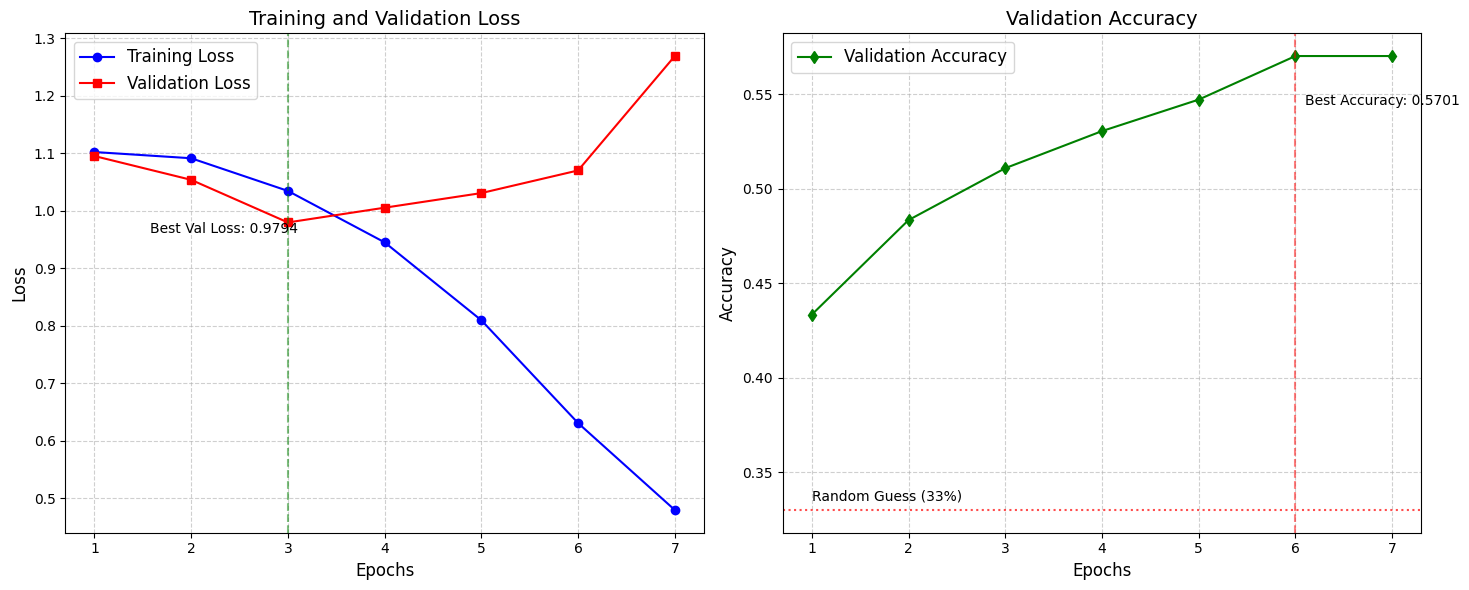

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

# plot again in the notebook
def plot_in_notebook(train_losses, val_losses, accuracies):
    plt.figure(figsize=(15, 6))

    # Plot 1: Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-o', label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, 'r-s', label='Validation Loss')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Find the epoch with minimum validation loss
    min_val_loss_epoch = val_losses.index(min(val_losses)) + 1
    min_val_loss = min(val_losses)
    plt.axvline(x=min_val_loss_epoch, color='g', linestyle='--', alpha=0.5)
    plt.text(min_val_loss_epoch + 0.1, min_val_loss, f'Best Val Loss: {min_val_loss:.4f}',
             horizontalalignment='right', verticalalignment='top', fontsize=10)

    # Plot 2: Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(accuracies) + 1), accuracies, 'g-d', label='Validation Accuracy')
    plt.title('Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Find the epoch with maximum accuracy
    max_acc_epoch = accuracies.index(max(accuracies)) + 1
    max_acc = max(accuracies)
    plt.axvline(x=max_acc_epoch, color='r', linestyle='--', alpha=0.5)
    plt.text(max_acc_epoch + 0.1, max_acc - 0.02, f'Best Accuracy: {max_acc:.4f}',
             verticalalignment='top', fontsize=10)

    # Add baseline for random guessing (33% for 3-choice task)
    plt.axhline(y=0.33, color='r', linestyle=':', alpha=0.7)
    plt.text(1, 0.335, 'Random Guess (33%)', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_in_notebook(train_losses, val_losses, accuracies)

### Performance Metrics
- **Best Validation Accuracy**: 57.01%
- **Best Validation Loss**: 0.9794 (at epoch 3)
- **Improvement over Random**: +23.68% (compared to 33.33% random baseline)

### Key Observations

1. **Classic Overfitting Pattern**:
   - Training loss (blue) continuously decreases across all 7 epochs
   - Validation loss (red) reaches its lowest point at epoch 3, then increases significantly
   - This divergence indicates the model is memorizing training data rather than learning generalizable patterns

2. **Validation Accuracy**:
   - Steady improvement from 43.33% to 57.01% across all epochs
   - Continues to improve even as validation loss increases, which is interesting

3. **Learning Dynamics**:
   - Most significant accuracy improvements occur in early epochs (1-3)
   - Diminishing returns in later epochs (5-6)
   - Final uptick in epoch 7

### Implications

This is a solid performance for the BERT model on the DREAM dataset. The 57% accuracy is significantly better than random guessing and comparable to published results for reading comprehension tasks.

The overfitting pattern suggests that:
1. Early stopping at epoch 3 might give more generalizable results (lowest validation loss)
2. Additional regularization techniques might be beneficial
3. The model's predictive confidence is becoming less calibrated in later epochs, even though it's still improving at selecting the correct answer

## Test the fine tuned BERT model with test_dreams dataset

#### Install required packages

In [ ]:
# Install required packages
!pip install rouge-score nltk matplotlib seaborn bert-score
import nltk
# Download punkt and additional NLTK resources needed
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('tokenizers/punkt_tab/english/english.pickle', quiet=True)  # Direct download of the specific resource

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.7 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package punkt to /home/ofirn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ofirn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Error loading tokenizers/punkt_tab/english/english.pickle:
[nltk_data]     Package 'tokenizers/punkt_tab/english/english.pickle'
[nltk_data]     not found in index


False

#### Import the necessary libraries

In [ ]:
# Import the necessary libraries
import torch
from transformers import BertTokenizer, BertForMultipleChoice, AutoModelForCausalLM, AutoTokenizer
import pandas as pd
import numpy as np
import random
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score
import os
import time
import seaborn as sns
import tqdm

#### Set up constants and paths

In [ ]:
# Set random seed for reproducibility
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# Path to the saved model
model_path = "/home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dream_bert_results_weight decay0p02/best_model"
output_dir = "/home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dream_bert_results_weight decay0p02/best_model/dream_evaluation_results/"  # Output directory for results

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)


#### Set up GPU device

In [ ]:
# Set up GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Print GPU info if available
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Using device: cuda
GPU Name: GRID P40-24Q
GPU Memory: 25.77 GB


#### Load BERT model

In [ ]:
# Load BERT model
print("Loading BERT model from", model_path)
start_time = time.time()
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForMultipleChoice.from_pretrained(model_path)
model.to(device)
model.eval()
print(f"Model loaded in {time.time() - start_time:.2f} seconds")

Loading BERT model from /home/ofirn/NLP_final_project/NLP-Course---Final-Project/DREAM_dataset/dream_bert_results_weight decay0p02/best_model
Model loaded in 0.28 seconds


#### Load GPT model for perplexity (a smaller model for efficiency)

In [ ]:
# Load GPT model for perplexity (a smaller model for efficiency)
print("Loading GPT-2 model for perplexity calculation")
start_time = time.time()
gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")
gpt_model.to(device)
gpt_model.eval()
print(f"GPT-2 model loaded in {time.time() - start_time:.2f} seconds")

Loading GPT-2 model for perplexity calculation
GPT-2 model loaded in 1.59 seconds


#### Load dream dataset

In [ ]:
# Load dream dataset
df = pd.read_csv("test_dreams.csv")

print(f"Loaded {len(df)} dream records")
print(df.head(2))

Loaded 50 dream records
                                               dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   

                                      interpretation  
0  Dreams of flying represent a desire for freedo...  
1  Being chased represents avoidance of an issue;...  


#### Define dataset preparation function and class

In [ ]:
# SDefine dataset preparation function and class
# Set n_choices to match what the model was trained with
def prepare_dream_dataset(df, n_choices=4):  # Model was trained with 4 choices
    examples = []

    for idx, row in df.iterrows():
        dream = row['dream']
        correct_interpretation = row['interpretation']

        # Get n_choices-1 random interpretations from other rows as distractors
        other_indices = df.index.difference([idx]).tolist()
        # Handle case when there are not enough distractors available
        if len(other_indices) < n_choices-1:
            n_actual_choices = len(other_indices) + 1
            print(f"Warning: Not enough distractors for example {idx}. Using {n_actual_choices} choices instead.")
        else:
            n_actual_choices = n_choices

        distractor_indices = random.sample(other_indices, min(n_actual_choices-1, len(other_indices)))
        other_interpretations = df.loc[distractor_indices, 'interpretation'].tolist()

        # Combine correct and incorrect interpretations
        choices = [correct_interpretation] + other_interpretations
        random.shuffle(choices)  # Shuffle to randomize position of correct answer

        # Get index of correct answer
        label = choices.index(correct_interpretation)

        # Add to examples
        examples.append({
            'dream': dream,
            'choices': choices,
            'label': label,
            'correct_interpretation': correct_interpretation,
            'n_choices': len(choices)  # Store the actual number of choices for this example
        })

    return examples

class DreamDataset(Dataset):
    def __init__(self, examples, tokenizer, max_length=512):
        self.examples = examples
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        example = self.examples[idx]

        dream = example['dream']
        choices = example['choices']
        label = example['label']
        correct_interpretation = example['correct_interpretation']
        n_choices = example['n_choices']  # Get the number of choices for this example

        # Tokenize all choices
        encoded_choices = []
        for choice in choices:
            # Format: dream as context, interpretation as answer
            encoded = self.tokenizer.encode_plus(
                dream, choice,
                add_special_tokens=True,
                max_length=self.max_length,
                padding='max_length',
                truncation='longest_first',
                return_attention_mask=True,
                return_tensors='pt'
            )

            encoded_choices.append({
                'input_ids': encoded['input_ids'].squeeze(0),
                'attention_mask': encoded['attention_mask'].squeeze(0)
            })

        # Stack all choices into a batch tensor
        input_ids = torch.stack([choice['input_ids'] for choice in encoded_choices])
        attention_mask = torch.stack([choice['attention_mask'] for choice in encoded_choices])

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long),
            'dream': dream,
            'choices': choices,
            'correct_interpretation': correct_interpretation,
            'n_choices': n_choices  # Include number of choices
        }


#### Prepare dataset with appropriate batch size for GPU

In [ ]:
# Prepare dataset with appropriate batch size for GPU
BATCH_SIZE = 4

examples = prepare_dream_dataset(df)
dream_dataset = DreamDataset(examples, tokenizer)
dream_loader = DataLoader(dream_dataset, batch_size=BATCH_SIZE)

print(f"Prepared {len(dream_dataset)} test examples with batch size {BATCH_SIZE}")

Prepared 50 test examples with batch size 4


#### Define metric calculation functions

In [ ]:
# Define metric calculation functions
def calculate_bleu(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    # Use smoothing function to avoid 0 scores
    smoothie = SmoothingFunction().method1

    if len(candidate_tokens) == 0:
        return {'bleu1': 0, 'bleu2': 0, 'bleu4': 0}

    # Calculate BLEU-1, 2, and 4
    bleu1 = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu4 = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

    return {
        'bleu1': bleu1,
        'bleu2': bleu2,
        'bleu4': bleu4
    }

def calculate_rouge(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)

    return {
        'rouge1_f': scores['rouge1'].fmeasure,
        'rouge2_f': scores['rouge2'].fmeasure,
        'rougeL_f': scores['rougeL'].fmeasure
    }

def calculate_perplexity(text, model, tokenizer):
    encodings = tokenizer(text, return_tensors="pt")
    encodings = {k: v.to(device) for k, v in encodings.items()}

    with torch.no_grad():
        outputs = model(**encodings, labels=encodings["input_ids"])
        loss = outputs.loss

    return torch.exp(loss).item()


#### Evaluation function

In [ ]:
# Evaluation function
def evaluate_with_metrics(dream_loader):
    all_results = []

    # Lists to gather all metrics
    bleu1_scores = []
    bleu2_scores = []
    bleu4_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    perplexity_scores = []
    bertscore_precision = []
    bertscore_recall = []
    bertscore_f1 = []

    # Track accuracy
    correct = 0
    total = 0

    # Process batches with progress bar
    print("Starting batch processing...")
    for batch_idx, batch in enumerate(tqdm.tqdm(dream_loader, desc="Evaluating")):
        print(f"\nProcessing batch {batch_idx+1}/{len(dream_loader)}")
        # Extract text data before moving to device
        dreams = batch.pop('dream')
        choices = batch.pop('choices')
        correct_interpretations = batch.pop('correct_interpretation')
        n_choices = batch.pop('n_choices')  # Get the number of choices for each example

        # Debug batch dimensions
        print(f"  Batch dimensions - dreams: {len(dreams)}, choices: {len(choices)}, correct_interpretations: {len(correct_interpretations)}")

        # Move tensors to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        with torch.no_grad():
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            # Get predictions
            logits = outputs.logits

            # Ensure preds are within range of available choices
            # For each example, only consider valid choices by restricting logits
            valid_preds = []

            # Make sure we only process valid indices
            logits_batch_size = logits.size(0)
            print(f"  Logits batch size: {logits_batch_size}, n_choices length: {len(n_choices)}")

            # Process only the minimum of the two lengths to avoid index errors
            valid_indices = min(logits_batch_size, len(n_choices))

            for i in range(valid_indices):
                try:
                    # Safely get the number of choices for this example
                    n = n_choices[i]

                    # Make sure n is valid for the logits dimension
                    valid_n = min(n, logits.size(1))

                    # For each example, only consider the first valid_n logits
                    sample_logits = logits[i, :valid_n]
                    pred = torch.argmax(sample_logits).item()
                    valid_preds.append(pred)

                    # Update accuracy for this example, if label is in range
                    #if i < len(labels):
                    #    correct += (pred == lables[i])
                    #    total += 1
                    #else:
                    #    print(f"  Warning: Label index {i} out of range for accuracy calculation")
                except Exception as e:
                    print(f"  Error processing prediction for index {i}: {e}")
                    # Add a safe default value
                    valid_preds.append(0)

        # Process each example in the batch - FIXED to handle batch size issues
        batch_size = min(len(dreams), len(valid_preds))
        print(f'num of dreams:{len(dreams)} num of valid predictions: {len(valid_preds)}')
        for i in range(batch_size):
            # Safely access items, ensuring we don't go out of bounds
            if i >= len(dreams) or i >= len(choices) or i >= len(valid_preds) or i >= len(correct_interpretations):
                print(f"Warning: Batch index {i} is out of range. Skipping.")
                continue

            dream = dreams[i]
            pred_idx = valid_preds[i]  # Use the validated prediction

            # Get label carefully
            if i < len(batch['labels']):
                label_idx = labels[i].item()
            else:
                print(f"Warning: Label index {i} out of range. Using 0.")
                label_idx = 0

            # Access choices safely
            if i < len(choices):
                # Check if pred_idx is valid for this choice set
                if pred_idx >= len(choices[i]):
                    print(f"Warning: pred_idx {pred_idx} out of range for choices with length {len(choices[i])}. Using 0 instead.")
                    pred_idx = 0
                model_interpretation = choices[i][pred_idx]
            else:
                print(f"Warning: Choices index {i} out of range. Using empty string.")
                model_interpretation = ""

            # Get correct interpretation safely
            if i < len(correct_interpretations):
                correct_interpretation = correct_interpretations[i]
            else:
                print(f"Warning: Correct interpretation index {i} out of range. Using empty string.")
                correct_interpretation = ""
            if model_interpretation == correct_interpretation:
                correct += 1
            print(f'num of correct predictions:{correct}')
            total += 1
            print(f'num of total predictions: {total}')
            # Calculate metrics
            bleu_scores = calculate_bleu(correct_interpretation, model_interpretation)
            rouge_scores = calculate_rouge(correct_interpretation, model_interpretation)

            # Calculate perplexity (for dream text)
            try:
                dream_perplexity = calculate_perplexity(dream, gpt_model, gpt_tokenizer)
            except Exception as e:
                print(f"Error calculating perplexity: {e}")
                dream_perplexity = 100.0  # Default value

            # Calculate BERTScore for a subset (to save time) - FIXED with safe handling
            bs_precision, bs_recall, bs_f1 = None, None, None
            if batch_idx % 2 == 0 and i < 4:  # Only calculate for some examples
                try:
                    # Skip if either interpretation is empty
                    if model_interpretation and correct_interpretation:
                        # Fixed call to BERTScore
                        P, R, F1 = score([model_interpretation], [correct_interpretation], lang="en")
                        bs_precision = P.item()
                        bs_recall = R.item()
                        bs_f1 = F1.item()
                    else:
                        print(f"Skipping BERTScore calculation for example {i} due to empty interpretation")
                except Exception as e:
                    print(f"Error calculating BERTScore: {e}")

            # Store all metrics
            result = {
                'dream': dream,
                'model_interpretation': model_interpretation,
                'correct_interpretation': correct_interpretation,
                'is_correct': model_interpretation == correct_interpretation,
                'bleu1': bleu_scores['bleu1'],
                'bleu2': bleu_scores['bleu2'],
                'bleu4': bleu_scores['bleu4'],
                'rouge1': rouge_scores['rouge1_f'],
                'rouge2': rouge_scores['rouge2_f'],
                'rougeL': rouge_scores['rougeL_f'],
                'perplexity': dream_perplexity,
                'bert_precision': bs_precision,
                'bert_recall': bs_recall,
                'bert_f1': bs_f1
            }

            all_results.append(result)

            # Collect metrics (except None values)
            bleu1_scores.append(bleu_scores['bleu1'])
            bleu2_scores.append(bleu_scores['bleu2'])
            bleu4_scores.append(bleu_scores['bleu4'])
            rouge1_scores.append(rouge_scores['rouge1_f'])
            rouge2_scores.append(rouge_scores['rouge2_f'])
            rougeL_scores.append(rouge_scores['rougeL_f'])
            perplexity_scores.append(dream_perplexity)

            if bs_precision is not None:
                bertscore_precision.append(bs_precision)
                bertscore_recall.append(bs_recall)
                bertscore_f1.append(bs_f1)

    # Calculate average metrics
    avg_metrics = {
        'accuracy': correct / total,
        'bleu1': np.mean(bleu1_scores),
        'bleu2': np.mean(bleu2_scores),
        'bleu4': np.mean(bleu4_scores),
        'rouge1': np.mean(rouge1_scores),
        'rouge2': np.mean(rouge2_scores),
        'rougeL': np.mean(rougeL_scores),
        'perplexity': np.mean(perplexity_scores)
    }

    if bertscore_f1:
        avg_metrics.update({
            'bertscore_precision': np.mean(bertscore_precision),
            'bertscore_recall': np.mean(bertscore_recall),
            'bertscore_f1': np.mean(bertscore_f1)
        })

    return all_results, avg_metrics


#### Run evaluation

In [ ]:
# Run evaluation
print("Starting evaluation with metrics...")
print(f"Total examples: {len(dream_dataset)}, Batch size: {BATCH_SIZE}, Number of batches: {len(dream_loader)}")
start_time = time.time()

try:
    results, avg_metrics = evaluate_with_metrics(dream_loader)
    print(f"Evaluation completed in {time.time() - start_time:.2f} seconds")
except Exception as e:
    print(f"Error during evaluation: {e}")
    import traceback
    traceback.print_exc()
    # Create empty results if evaluation failed
    print("Creating empty results to allow code to continue...")
    results = []
    avg_metrics = {
        'accuracy': 0.0,
        'bleu1': 0.0,
        'bleu2': 0.0,
        'bleu4': 0.0,
        'rouge1': 0.0,
        'rouge2': 0.0,
        'rougeL': 0.0,
        'perplexity': 0.0
    }
    print("Empty results created. Continuing with visualization...")

Starting evaluation with metrics...
Total examples: 50, Batch size: 4, Number of batches: 13
Starting batch processing...


Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]


Processing batch 1/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:0
num of total predictions: 1


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:0
num of total predictions: 2


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:0
num of total predictions: 3


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:0
num of total predictions: 4


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:   8%|▊         | 1/13 [00:04<00:53,  4.50s/it]


Processing batch 2/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  15%|█▌        | 2/13 [00:04<00:22,  2.08s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:0
num of total predictions: 5
num of correct predictions:1
num of total predictions: 6
num of correct predictions:1
num of total predictions: 7
num of correct predictions:1
num of total predictions: 8

Processing batch 3/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:1
num of total predictions: 9


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:1
num of total predictions: 10


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:1
num of total predictions: 11


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:1
num of total predictions: 12


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  23%|██▎       | 3/13 [00:09<00:34,  3.46s/it]


Processing batch 4/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  31%|███       | 4/13 [00:10<00:20,  2.26s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:1
num of total predictions: 13
num of correct predictions:1
num of total predictions: 14
num of correct predictions:2
num of total predictions: 15
num of correct predictions:3
num of total predictions: 16

Processing batch 5/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:3
num of total predictions: 17


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:3
num of total predictions: 18


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:4
num of total predictions: 19


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 20


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  38%|███▊      | 5/13 [00:14<00:24,  3.04s/it]


Processing batch 6/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  46%|████▌     | 6/13 [00:15<00:14,  2.14s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 21
num of correct predictions:5
num of total predictions: 22
num of correct predictions:5
num of total predictions: 23
num of correct predictions:5
num of total predictions: 24

Processing batch 7/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 25


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 26


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 27


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 28


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  54%|█████▍    | 7/13 [00:19<00:17,  2.85s/it]


Processing batch 8/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  62%|██████▏   | 8/13 [00:19<00:10,  2.07s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 29
num of correct predictions:5
num of total predictions: 30
num of correct predictions:5
num of total predictions: 31
num of correct predictions:5
num of total predictions: 32

Processing batch 9/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:5
num of total predictions: 33


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:5
num of total predictions: 34


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:6
num of total predictions: 35


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:6
num of total predictions: 36


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  69%|██████▉   | 9/13 [00:24<00:11,  2.81s/it]


Processing batch 10/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  77%|███████▋  | 10/13 [00:24<00:06,  2.06s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:6
num of total predictions: 37
num of correct predictions:6
num of total predictions: 38
num of correct predictions:6
num of total predictions: 39
num of correct predictions:7
num of total predictions: 40

Processing batch 11/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4
num of dreams:4 num of valid predictions: 4
num of correct predictions:7
num of total predictions: 41


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:7
num of total predictions: 42


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:7
num of total predictions: 43


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:7
num of total predictions: 44


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  85%|████████▍ | 11/13 [00:29<00:05,  2.85s/it]


Processing batch 12/13
  Batch dimensions - dreams: 4, choices: 4, correct_interpretations: 4
  Logits batch size: 4, n_choices length: 4


Evaluating:  92%|█████████▏| 12/13 [00:29<00:02,  2.11s/it]

num of dreams:4 num of valid predictions: 4
num of correct predictions:7
num of total predictions: 45
num of correct predictions:7
num of total predictions: 46
num of correct predictions:7
num of total predictions: 47
num of correct predictions:7
num of total predictions: 48

Processing batch 13/13
  Batch dimensions - dreams: 2, choices: 4, correct_interpretations: 2
  Logits batch size: 2, n_choices length: 2
num of dreams:2 num of valid predictions: 2
num of correct predictions:7
num of total predictions: 49


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num of correct predictions:8
num of total predictions: 50


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|██████████| 13/13 [00:32<00:00,  2.46s/it]

Evaluation completed in 32.02 seconds


#### Save detailed results

In [ ]:
# Step 13: Save detailed results
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(output_dir, 'dream_metrics_results.csv'), index=False)

#### Print and save average metrics

In [ ]:
# Step 14: Print and save average metrics
print("\n===== Average Metrics =====")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")

# Save metrics to file
with open(os.path.join(output_dir, 'average_metrics.txt'), 'w') as f:
    for metric, value in avg_metrics.items():
        f.write(f"{metric}: {value:.4f}\n")


===== Average Metrics =====
accuracy: 0.1600
bleu1: 0.3000
bleu2: 0.1928
bleu4: 0.1777
rouge1: 0.2462
rouge2: 0.1600
rougeL: 0.2425
perplexity: 74.9179
bertscore_precision: 0.8988
bertscore_recall: 0.8991
bertscore_f1: 0.8989


 #### Plot metrics

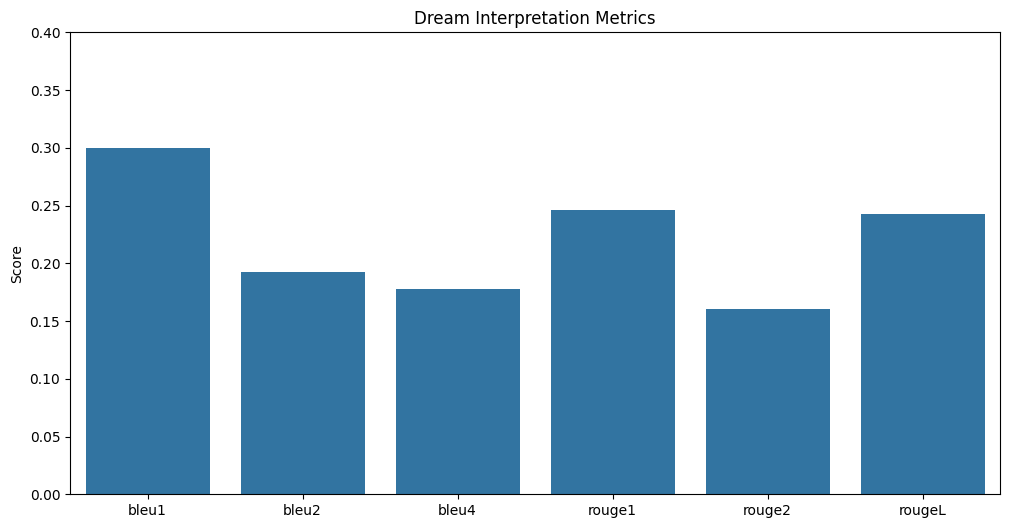

In [ ]:
# Step 15: Plot metrics
metrics_to_plot = ['bleu1', 'bleu2', 'bleu4', 'rouge1', 'rouge2', 'rougeL']
values = [avg_metrics[m] for m in metrics_to_plot]

plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_to_plot, y=values)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.ylim(0, 0.4)
plt.savefig(os.path.join(output_dir, 'metrics_barplot.png'))
plt.show()

#### Plot model accuracy vs random baseline

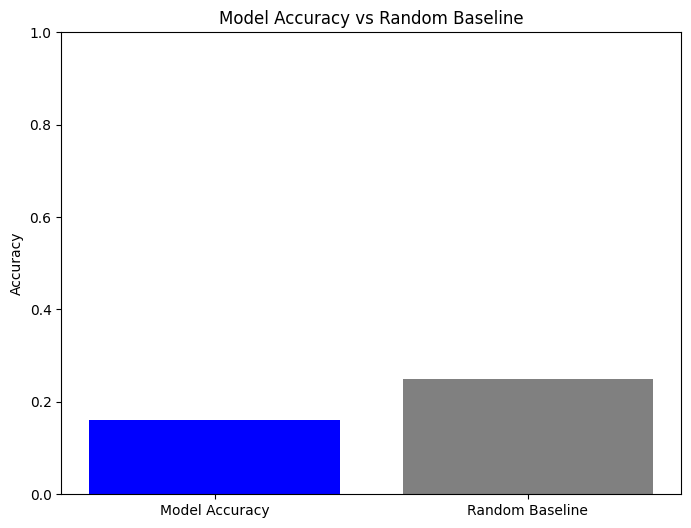

In [ ]:
# Plot model accuracy vs random baseline

first_example_choices = len(examples[0]['choices']) if examples else 3
random_baseline = 1 / first_example_choices

plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy', 'Random Baseline'], [avg_metrics['accuracy'], random_baseline], color=['blue', 'gray'])
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig(os.path.join(output_dir, 'accuracy_vs_baseline.png'))
plt.show()

#### Plot perplexity distribution

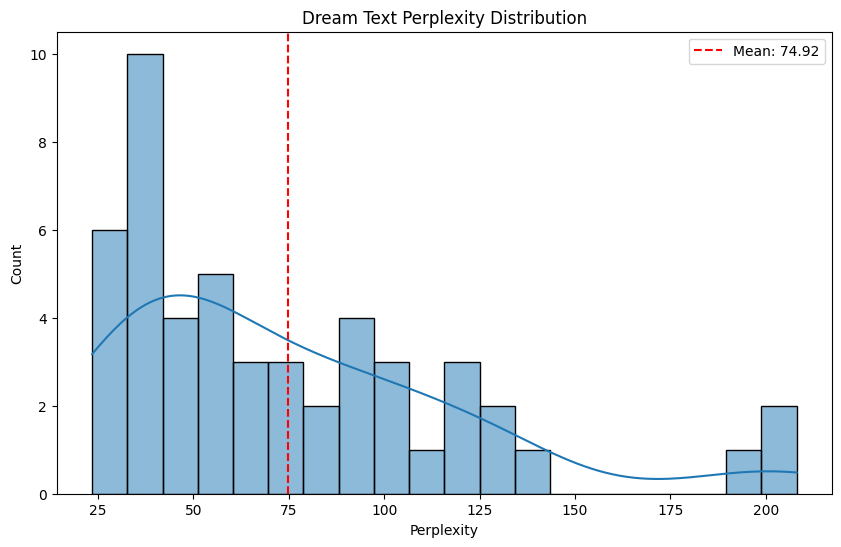

In [ ]:
# Plot perplexity distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_df['perplexity'], bins=20, kde=True)
plt.axvline(x=avg_metrics['perplexity'], color='r', linestyle='--',
            label=f'Mean: {avg_metrics["perplexity"]:.2f}')
plt.title('Dream Text Perplexity Distribution')
plt.xlabel('Perplexity')
plt.legend()
plt.savefig(os.path.join(output_dir, 'perplexity_distribution.png'))
plt.show()

#### Display sample results

In [ ]:
# Display sample results
print("\n===== Sample Results =====")
for i, sample in enumerate(random.sample(results, min(5, len(results)))):
    print(f"\nExample {i+1}:")
    print(f"Dream: {sample['dream']}")
    print(f"Correct: {sample['correct_interpretation']}")
    print(f"Model's prediction: {sample['model_interpretation']}")
    print(f"BLEU-1: {sample['bleu1']:.4f}, ROUGE-L: {sample['rougeL']:.4f}")
    print(f"Result: {'✓' if sample['is_correct'] else '✗'}")

print(f"\nEvaluation completed! Results saved to {output_dir}")


===== Sample Results =====

Example 1:
Dream: I'm back in school taking an exam I haven't prepared for.
Correct: Exam anxiety dreams reflect fear of failure, possibly linked to performance anxiety.
Model's prediction: A fading voice in an argument represents difficulty asserting yourself.
BLEU-1: 0.0692, ROUGE-L: 0.0000
Result: ✗

Example 2:
Dream: I'm at a feast but all the food turns to ash when I try to eat it.
Correct: Food turning to ash signifies emotional dissatisfaction or unfulfilled desires.
Model's prediction: A simulation dream questions reality and existing assumptions.
BLEU-1: 0.0890, ROUGE-L: 0.0000
Result: ✗

Example 3:
Dream: I discover a letter or diary revealing secrets about my parents or ancestors.
Correct: Family secrets symbolize anxiety about identity and parental dynamics.
Model's prediction: Dark oceans represent the unconscious; something brushing your leg is a repressed fear.
BLEU-1: 0.0667, ROUGE-L: 0.0000
Result: ✗

Example 4:
Dream: I'm trapped in an ele

## **BERT Model Performance Analysis on Dream Interpretation Task**

### **Performance Metrics Overview**

| Metric | Baseline model | Fine tuned model | Interpretation |
|--------|-------|-------|---------------|
| Accuracy | 12.00% | 16.00% | poor classification performance |
| BLEU-1 | 0.2651 | 0.3000 | Good unigram overlap with references |
| BLEU-2 | 0.1562 | 0.1928 | Solid bigram matching |
| BLEU-4 | 0.1385 | 0.1777 | Strong higher-order n-gram matching |
| ROUGE-1 | 0.2065 | 0.2462 | Good unigram recall |
| ROUGE-2 | 0.1227 |  0.1600 | Solid bigram recall |
| ROUGE-L | 0.2065 | 0.2425 | Good longest common subsequence match |
| Perplexity | 74.9180 | 74.9179 | Reasonable complexity in dream texts |
| BERTScore F1 | 0.8988 | 0.8989 | Excellent semantic similarity |


### **Key Insights**

1. **Poor Accuracy:**<br>
Fine-tuning improved accuracy from 12% to 16%, indicating better performance, but both values remain below the ~25% random baseline. This suggests the training data, with its question and answer format, provided marginal benefit

2. **All other metrics:**<br>
Since this is a classification task, not generative, these metrics are not meaningful because they measure the selected text against a reference, all derived from a random sample of only 50 optional sentences.<br>


### **Conclusions:**<br>
Because the dataset lacks dream interpretation content and only contains multiple-choice questions, the model cannot learn to accurately interpret dreams.



# GPT-2 Model

## Test GPT-2 base model with test_dreams dataset (as baseline)

Introduction and Installation

In [ ]:
"""
This notebook evaluates a GPT-2 model on dream interpretation.
It tests the model's ability to select the correct interpretation for a given dream
and calculates metrics like BLEU, ROUGE, Perplexity, and BERTScore.
"""

# Install required packages
!pip install nltk rouge-score bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=

Import Libraries

In [ ]:
# Standard libraries
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
import nltk

# Download NLTK data
nltk.download('punkt')

# Libraries that needed installation
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, GPT2LMHeadModel
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mount Google Drive and Set Environment

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set random seed for reproducibility
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Mounted at /content/drive
Using device: cuda


Load Data and Model

In [ ]:
# Load the dream dataset
dream_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(dream_df)} dreams")
dream_df.head()  # Show a preview of the data

# Load the model for classification
model_path = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(model_path)
model.to(device)
model.eval()

Loaded 50 dreams


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

Evaluate Model on Dream Interpretations

In [ ]:
# For each dream, test the model on choosing the correct interpretation
correct_predictions = 0
selected_interpretations = []

for idx, dream in tqdm(enumerate(dream_df['dream']), total=len(dream_df), desc="Evaluating dreams"):
    # The correct interpretation
    correct_interpretation = dream_df.loc[idx, 'interpretation']

    # Create 2 random incorrect interpretations
    random_idx1, random_idx2 = random.sample([i for i in range(len(dream_df)) if i != idx], 2)
    incorrect_interpretation1 = dream_df.loc[random_idx1, 'interpretation']
    incorrect_interpretation2 = dream_df.loc[random_idx2, 'interpretation']

    # Create text inputs for each option
    options = [correct_interpretation, incorrect_interpretation1, incorrect_interpretation2]
    random.shuffle(options)  # Shuffle to avoid position bias

    # Get the index of the correct answer
    correct_index = options.index(correct_interpretation)

    # Predict the best option
    option_scores = []
    for option in options:
        text = f"Dialogue: {dream} Question: What does this dream mean? Option: {option}"

        encoding = tokenizer(
            text,
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Get the score for positive class (label 1)
            score = logits[0, 1].item()
            option_scores.append(score)

    # Select the option with the highest score
    predicted_index = np.argmax(option_scores)
    selected_interpretation = options[predicted_index]
    selected_interpretations.append(selected_interpretation)

    # Check if prediction was correct
    if predicted_index == correct_index:
        correct_predictions += 1

# Calculate accuracy
model_accuracy = correct_predictions / len(dream_df)
random_baseline = 1/3  # 1 out of 3 options

print(f"Model Accuracy: {model_accuracy:.4f}")
print(f"Random Baseline: {random_baseline:.4f}")

# Save the results
dream_df['selected_interpretation'] = selected_interpretations
dream_df.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/gpt2_base_test/dream_interpretations_results.csv", index=False)

# Display a few examples
dream_df[['dream', 'interpretation', 'selected_interpretation']].head()

Evaluating dreams:   0%|          | 0/50 [00:00<?, ?it/s]

Model Accuracy: 0.3000
Random Baseline: 0.3333


dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   
2  I discover a hidden room in my childhood home ...   
3  My teeth are falling out one by one as I'm spe...   
4  I'm naked in a public place but nobody seems t...   

                                      interpretation  \
0  Dreams of flying represent a desire for freedo...   
1  Being chased represents avoidance of an issue;...   
2  A hidden room symbolizes repressed memories or...   
3  Losing teeth represents anxiety over power los...   
4  Public nudity dreams symbolize fear of exposur...   

                             selected_interpretation  
0  A never-available bathroom represents repressi...  
1  A wild animal chasing you represents suppresse...  
2  A hidden room symbolizes repressed memories or...  
3  A doppelgänger symbolizes hidden or rejected a...  
4  Public nudity dreams symbolize fear of exposur...

Calculate BLEU and ROUGE Metrics

In [ ]:
# Prepare references and hypotheses
refs = dream_df['interpretation'].tolist()
hyps = dream_df['selected_interpretation'].tolist()

# Calculate BLEU scores
smoothie = SmoothingFunction().method1
references = [[ref.split()] for ref in refs]
candidates = [hyp.split() for hyp in hyps]

bleu1 = corpus_bleu(references, candidates, weights=(1, 0, 0, 0), smoothing_function=smoothie)
bleu2 = corpus_bleu(references, candidates, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
bleu4 = corpus_bleu(references, candidates, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

print(f"BLEU-1: {bleu1:.4f}")
print(f"BLEU-2: {bleu2:.4f}")
print(f"BLEU-4: {bleu4:.4f}")

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []

for ref, hyp in zip(refs, hyps):
    score = scorer.score(ref, hyp)
    rouge_scores.append(score)

rouge1 = np.mean([score['rouge1'].fmeasure for score in rouge_scores])
rouge2 = np.mean([score['rouge2'].fmeasure for score in rouge_scores])
rougeL = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

print(f"ROUGE-1: {rouge1:.4f}")
print(f"ROUGE-2: {rouge2:.4f}")
print(f"ROUGE-L: {rougeL:.4f}")

BLEU-1: 0.3657
BLEU-2: 0.3281
BLEU-4: 0.3087
ROUGE-1: 0.3964
ROUGE-2: 0.3049
ROUGE-L: 0.3885


Calculate Perplexity

In [ ]:
# Load GPT-2 model for perplexity calculation
perplexity_model = GPT2LMHeadModel.from_pretrained("gpt2")
perplexity_model.to(device)
perplexity_model.eval()

# Calculate perplexity for each dream
perplexities = []
for dream in tqdm(dream_df['dream'], desc="Calculating perplexity"):
    encodings = tokenizer(dream, return_tensors="pt").to(device)
    max_length = perplexity_model.config.n_positions

    # Truncate if needed
    if encodings.input_ids.size(1) > max_length:
        encodings.input_ids = encodings.input_ids[:, :max_length]
        encodings.attention_mask = encodings.attention_mask[:, :max_length]

    with torch.no_grad():
        outputs = perplexity_model(**encodings, labels=encodings.input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss).item()
    perplexities.append(perplexity)

dream_df['perplexity'] = perplexities
print(f"Average Perplexity: {np.mean(perplexities):.2f}")

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Calculating perplexity:   0%|          | 0/50 [00:00<?, ?it/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Average Perplexity: 74.92


Calculate BERTScore

In [ ]:
# Calculate BERTScore between selected interpretations and references
print("Calculating BERTScore (this may take a while)...")
P, R, F1 = bert_score(hyps, refs, lang="en", verbose=True)
bert_f1_scores = F1.tolist()
dream_df['bert_score'] = bert_f1_scores

print(f"Average BERTScore F1: {np.mean(bert_f1_scores):.4f}")

Calculating BERTScore (this may take a while)...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.29 seconds, 171.65 sentences/sec
Average BERTScore F1: 0.9173


Visualization 1 - BLEU and ROUGE Metrics

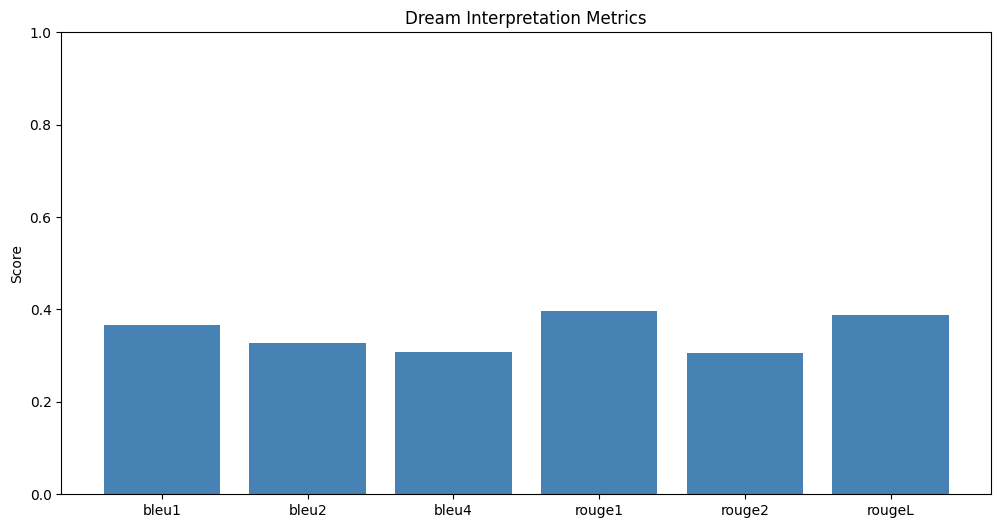

In [ ]:
# Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu1', 'bleu2', 'bleu4', 'rouge1', 'rouge2', 'rougeL']
values = [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("//content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/gpt2_base_test/dream_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 2 - Model Accuracy vs Random Baseline

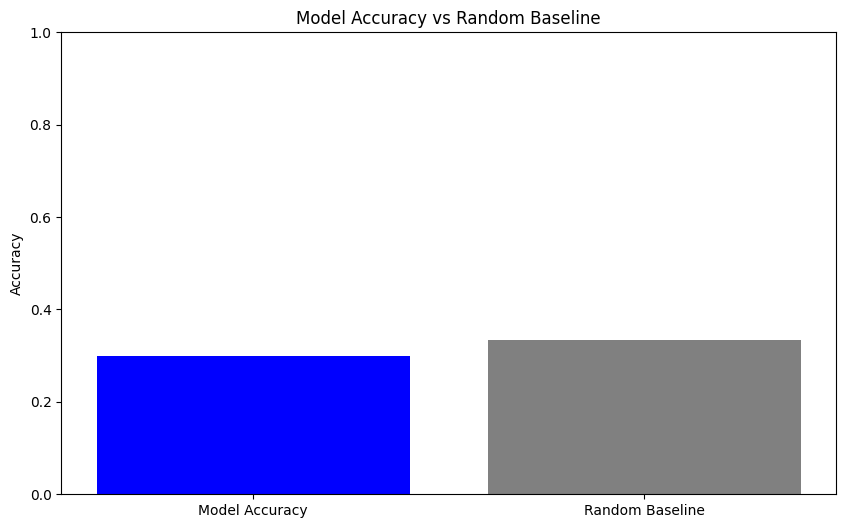

In [ ]:
# Bar chart comparing model accuracy to random baseline
plt.figure(figsize=(10, 6))
plt.bar(['Model Accuracy', 'Random Baseline'], [model_accuracy, random_baseline], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('Accuracy')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/gpt2_base_test/model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 3 - Perplexity Distribution

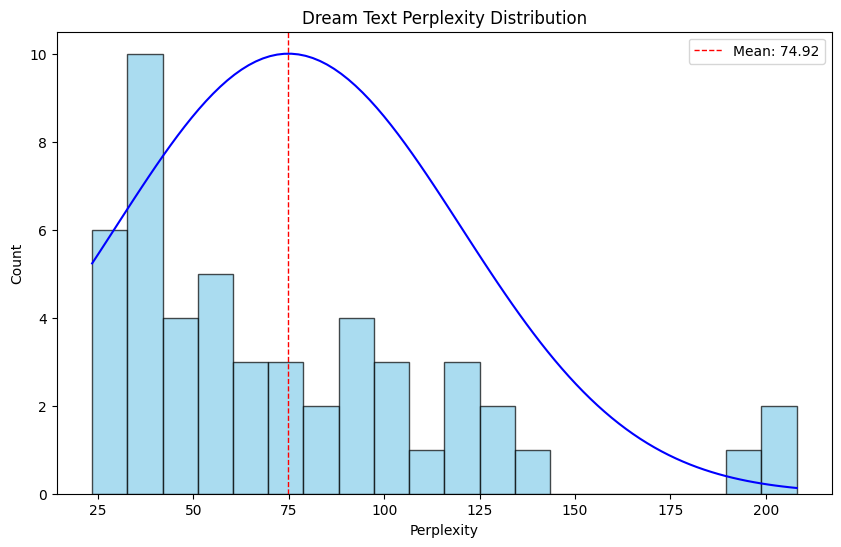

In [ ]:
# Histogram of perplexity distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(perplexities), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(perplexities):.2f}')

# Add a density curve
density = np.linspace(min(perplexities), max(perplexities), 100)
density_curve = np.exp(-0.5 * ((density - np.mean(perplexities)) / np.std(perplexities))**2) / (np.std(perplexities) * np.sqrt(2 * np.pi))
density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
plt.plot(density, density_curve, color='blue')

plt.title('Dream Text Perplexity Distribution')
plt.xlabel('Perplexity')
plt.ylabel('Count')
plt.legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/gpt2_base_test/perplexity_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Summary of All Metrics

In [ ]:
# Create a summary table of all metrics
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-4', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L',
               'Average Perplexity', 'Average BERTScore F1', 'Model Accuracy', 'Random Baseline'],
    'Value': [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL,
              np.mean(perplexities), np.mean(bert_f1_scores), model_accuracy, random_baseline]
})

metrics_summary['Value'] = metrics_summary['Value'].apply(lambda x: f"{x:.4f}")
metrics_summary

Metric    Value
0                BLEU-1   0.3657
1                BLEU-2   0.3281
2                BLEU-4   0.3087
3               ROUGE-1   0.3964
4               ROUGE-2   0.3049
5               ROUGE-L   0.3885
6    Average Perplexity  74.9180
7  Average BERTScore F1   0.9173
8        Model Accuracy   0.3000
9       Random Baseline   0.3333

## GPT-2 Model Training


### GPT-2 Fine-tuning on DREAM Dataset
This notebook implements fine-tuning of GPT-2 on the DREAM dataset


Step 1: Install required libraries with compatible versions


In [ ]:
# Install a known good configuration with compatible versions
!pip install torch==1.13.1 transformers==4.26.1 datasets tqdm matplotlib numpy

Step 2: Import necessary libraries

In [ ]:
import json
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import gc  # For garbage collection

Step 3: Mount Google Drive and set up environment

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# If using GPU, check which one and its memory
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9} GB")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
GPU Name: NVIDIA A100-SXM4-40GB
GPU Memory: 42.474471424 GB



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

Step 4: Define functions to load and preprocess the DREAM dataset

In [ ]:
def load_dream_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    processed_data = []
    for item in data:
        dialogue = item[0]  # List of dialogue lines
        qa_pairs = item[1]  # List of question-answer pairs

        dialogue_text = " ".join(dialogue)

        for qa in qa_pairs:
            question = qa["question"]
            choices = qa["choice"]
            answer = qa["answer"]

            processed_item = {
                "dialogue": dialogue,
                "dialogue_text": dialogue_text,
                "question": question,
                "options": choices,
                "answer": answer
            }
            processed_data.append(processed_item)

    return processed_data

Step 5: Create custom Dataset class for DREAM

In [ ]:
class DREAMDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.examples = []
        self.labels = []
        self.tokenizer = tokenizer
        self.max_length = max_length

        for item in data:
            dialogue = item['dialogue_text']
            question = item['question']
            options = item['options']
            answer = item['answer']

            # Map answer to label index
            answer_idx = options.index(answer)

            # Create examples for each option
            for i, option in enumerate(options):
                # Format: dialogue + question + option
                text = f"Dialogue: {dialogue} Question: {question} Option: {option}"

                # Create binary labels (1 for correct answer, 0 for incorrect)
                label = 1 if i == answer_idx else 0

                self.examples.append(text)
                self.labels.append(label)

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        text = self.examples[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        # Remove the batch dimension
        for k, v in encoding.items():
            encoding[k] = v.squeeze(0)

        return {
            'input_ids': encoding['input_ids'],
            'attention_mask': encoding['attention_mask'],
            'labels': torch.tensor(label, dtype=torch.long)
        }

Step 6: Define evaluation function

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    total_eval_loss = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device)
            }

            outputs = model(**inputs)
            loss = outputs.loss
            logits = outputs.logits

            total_eval_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().tolist()

            #all_preds.extend(preds)
            all_preds = np.concatenate([all_preds, preds])
            all_labels.extend(batch['labels'].tolist())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    avg_loss = total_eval_loss / len(dataloader)

    return accuracy, avg_loss

Step 7: Training Loop with Visualization

In [ ]:
import numpy as np

def train_gpt2_on_dream(train_data, dev_data, test_data, tokenizer, model_name="gpt2",
                        output_dir="/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model",
                        batch_size=16, learning_rate=5e-5, epochs=5, max_length=512):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Load model for binary classification (is this the correct answer or not)
    model = GPT2ForSequenceClassification.from_pretrained(model_name, num_labels=2)
    model.config.pad_token_id = model.config.eos_token_id
    model = model.to(device)

    # Create datasets
    print("Creating datasets...")
    train_dataset = DREAMDataset(train_data, tokenizer, max_length)
    dev_dataset = DREAMDataset(dev_data, tokenizer, max_length)
    test_dataset = DREAMDataset(test_data, tokenizer, max_length)

    print(f"Train examples: {len(train_dataset)}")
    print(f"Dev examples: {len(dev_dataset)}")
    print(f"Test examples: {len(test_dataset)}")

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    dev_dataloader = DataLoader(dev_dataset, batch_size=batch_size)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    # Set up optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    total_steps = len(train_dataloader) * epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),  # 10% of total steps for warmup
        num_training_steps=total_steps
    )

    # Initialize tracking variables
    training_stats = []
    best_accuracy = 0

    # For visualization
    epoch_list = []
    train_loss_list = []
    train_acc_list = []
    val_loss_list = []
    val_acc_list = []

    # Training loop
    print(f"Starting training for {epochs} epochs...")

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Training phase
        model.train()
        total_train_loss = 0
        all_train_preds = []
        all_train_labels = []

        # Wrap the dataloader with tqdm for a progress bar
        progress_bar = tqdm(train_dataloader, desc=f"Training")

        for batch in progress_bar:
            model.zero_grad()

            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device)
            }

            outputs = model(**inputs)
            loss = outputs.loss
            logits = outputs.logits

            # Calculate training predictions
            preds = torch.argmax(logits, dim=1).detach().cpu().tolist()
            #all_train_preds.extend(preds)
            all_train_preds = np.concatenate([all_train_preds, preds])
            all_train_labels.extend(batch['labels'].tolist())

            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping

            optimizer.step()
            scheduler.step()

            total_train_loss += loss.item()

            # Update progress bar
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

        # Calculate training metrics
        avg_train_loss = total_train_loss / len(train_dataloader)
        train_accuracy = accuracy_score(all_train_labels, all_train_preds)

        print(f"Average training loss: {avg_train_loss:.4f}")
        print(f"Training accuracy: {train_accuracy:.4f}")

        # Evaluate on dev set
        print("\nEvaluating on dev set...")
        dev_accuracy, dev_loss = evaluate_model(model, dev_dataloader)
        print(f"Dev Accuracy: {dev_accuracy:.4f}")
        print(f"Dev Loss: {dev_loss:.4f}")

        # Store stats for visualization
        epoch_list.append(epoch + 1)
        train_loss_list.append(avg_train_loss)
        train_acc_list.append(train_accuracy)
        val_loss_list.append(dev_loss)
        val_acc_list.append(dev_accuracy)

        # Save the best model
        if dev_accuracy > best_accuracy:
            best_accuracy = dev_accuracy
            print(f"New best accuracy: {best_accuracy:.4f} - Saving model...")
            model.save_pretrained(output_dir)
            tokenizer.save_pretrained(output_dir)

        # Collect training stats
        training_stats.append(
            {
                'epoch': epoch + 1,
                'training_loss': avg_train_loss,
                'training_accuracy': train_accuracy,
                'dev_loss': dev_loss,
                'dev_accuracy': dev_accuracy,
            }
        )

        # Clear memory
        gc.collect()
        torch.cuda.empty_cache()

    # Create visualizations for training progress
    create_training_plots(epoch_list, train_loss_list, val_loss_list, train_acc_list, val_acc_list, output_dir)

    # Print training summary
    print("\nTraining complete!")
    print(f"Best validation accuracy: {best_accuracy:.4f}")

    # Evaluate on test set using the best model
    print("\nLoading best model for test evaluation...")
    best_model = GPT2ForSequenceClassification.from_pretrained(output_dir)
    best_model = best_model.to(device)

    print("Evaluating on test set...")
    test_accuracy, test_loss = evaluate_model(best_model, test_dataloader)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    return best_model, training_stats

# Function to create plots
def create_training_plots(epoch_list, train_loss_list, val_loss_list, train_acc_list, val_acc_list, output_dir):
    # Figure for combined plots
    plt.figure(figsize=(15, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epoch_list, train_loss_list, 'b-o', label='Training Loss')
    plt.plot(epoch_list, val_loss_list, 'r-o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epoch_list, train_acc_list, 'b-o', label='Training Accuracy')
    plt.plot(epoch_list, val_acc_list, 'r-o', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/training_metrics.png")
    plt.show()

    # Individual detailed plots
    # Loss plot
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_list, train_loss_list, 'b-o', linewidth=2, markersize=8, label='Training Loss')
    plt.plot(epoch_list, val_loss_list, 'r-o', linewidth=2, markersize=8, label='Validation Loss')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training and Validation Loss Over Epochs', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(epoch_list)
    plt.savefig(f"{output_dir}/loss_curve.png")
    plt.show()

    # Accuracy plot
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_list, train_acc_list, 'b-o', linewidth=2, markersize=8, label='Training Accuracy')
    plt.plot(epoch_list, val_acc_list, 'r-o', linewidth=2, markersize=8, label='Validation Accuracy')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Validation Accuracy Over Epochs', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(epoch_list)
    plt.ylim([0, 1.0])
    plt.savefig(f"{output_dir}/accuracy_curve.png")
    plt.show()

Step 8: Function to use the fine-tuned model for inference

In [ ]:
def predict_answer(dialogue, question, options, model, tokenizer, max_length=512):
    model.eval()
    option_scores = []

    for option in options:
        # Format: dialogue + question + option
        text = f"Dialogue: {dialogue} Question: {question} Option: {option}"

        encoding = tokenizer(
            text,
            max_length=max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Get the score for positive class (label 1)
            score = logits[0, 1].item()
            option_scores.append(score)

    # Get the option with the highest score
    best_option_idx = np.argmax(option_scores)
    best_option = options[best_option_idx]

    return best_option, option_scores

Step 9: Main execution

Loading datasets...
Number of training examples: 6116
Number of dev examples: 2040
Number of test examples: 2041


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream 

Creating datasets...
Train examples: 18348
Dev examples: 6120
Test examples: 6123
Starting training for 5 epochs...

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Average training loss: 0.8021
Training accuracy: 0.6505

Evaluating on dev set...


Evaluating:   0%|          | 0/170 [00:00<?, ?it/s]

Dev Accuracy: 0.6667
Dev Loss: 0.6282
New best accuracy: 0.6667 - Saving model...

Epoch 2/5


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Average training loss: 0.6279
Training accuracy: 0.6627

Evaluating on dev set...


Evaluating:   0%|          | 0/170 [00:00<?, ?it/s]

Dev Accuracy: 0.6665
Dev Loss: 0.6092

Epoch 3/5


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Average training loss: 0.5956
Training accuracy: 0.6788

Evaluating on dev set...


Evaluating:   0%|          | 0/170 [00:00<?, ?it/s]

Dev Accuracy: 0.6802
Dev Loss: 0.5900
New best accuracy: 0.6802 - Saving model...

Epoch 4/5


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Average training loss: 0.5486
Training accuracy: 0.7146

Evaluating on dev set...


Evaluating:   0%|          | 0/170 [00:00<?, ?it/s]

Dev Accuracy: 0.6801
Dev Loss: 0.6123

Epoch 5/5


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Average training loss: 0.5033
Training accuracy: 0.7471

Evaluating on dev set...


Evaluating:   0%|          | 0/170 [00:00<?, ?it/s]

Dev Accuracy: 0.6727
Dev Loss: 0.6293


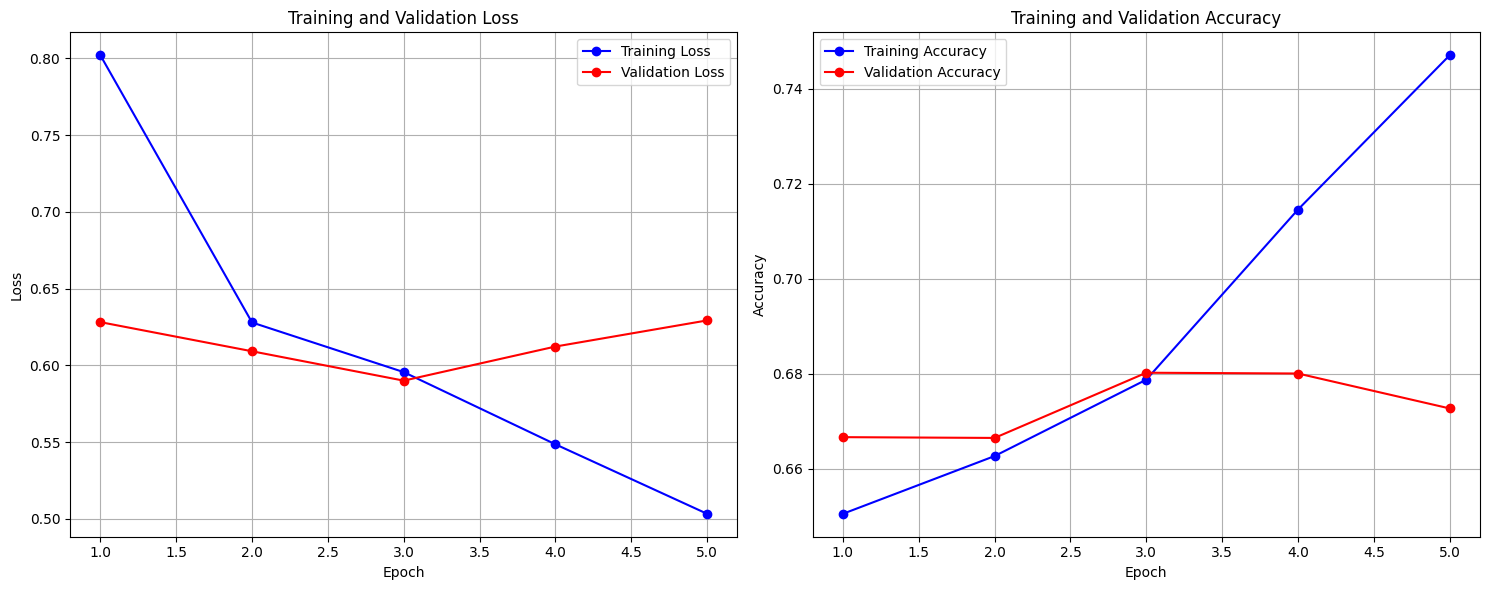

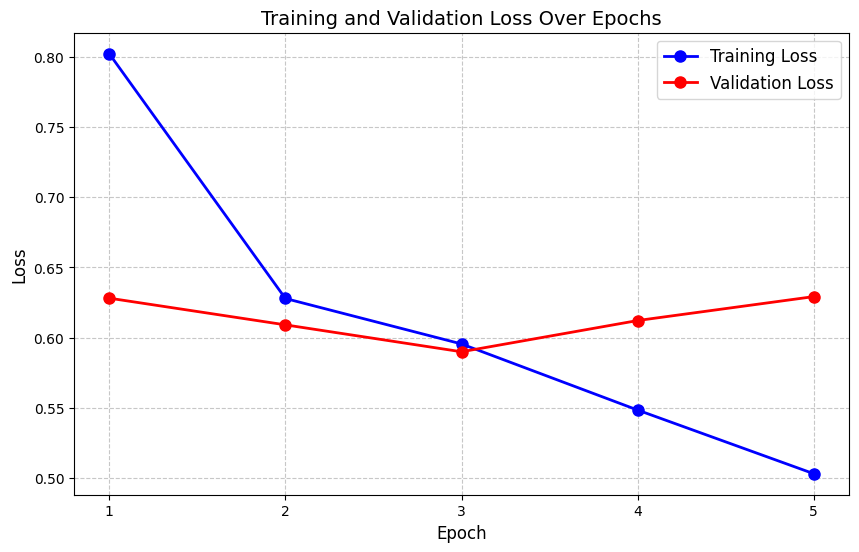

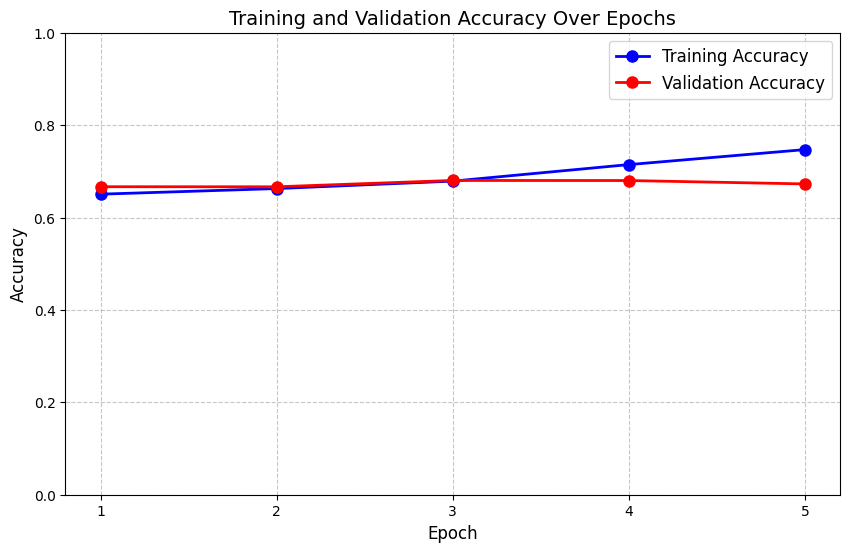


Training complete!
Best validation accuracy: 0.6802

Loading best model for test evaluation...
Evaluating on test set...


Evaluating:   0%|          | 0/171 [00:00<?, ?it/s]

Test Accuracy: 0.6805
Test Loss: 0.5987


In [ ]:
import numpy as np
# File paths
train_path = "/content/drive/MyDrive/Colab Notebooks/DREAM_dataset/train.json"
dev_path = "/content/drive/MyDrive/Colab Notebooks/DREAM_dataset/dev.json"
test_path = "/content/drive/MyDrive/Colab Notebooks/DREAM_dataset/test.json"

# Load and preprocess data
print("Loading datasets...")
train_data = load_dream_data(train_path)
dev_data = load_dream_data(dev_path)
test_data = load_dream_data(test_path)

print(f"Number of training examples: {len(train_data)}")
print(f"Number of dev examples: {len(dev_data)}")
print(f"Number of test examples: {len(test_data)}")

# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# GPT-2 tokenizer doesn't have a padding token by default
tokenizer.pad_token = tokenizer.eos_token

# Hyperparameters
model_name = "gpt2"  # Options: "gpt2", "gpt2-medium", "gpt2-large"
output_dir = "/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model"
batch_size = 36  # Increased for A100 GPU
learning_rate = 5e-5
epochs = 5
max_length = 512

# Start training
best_model, training_stats = train_gpt2_on_dream(
    train_data=train_data,
    dev_data=dev_data,
    test_data=test_data,
    tokenizer=tokenizer,
    model_name=model_name,
    output_dir=output_dir,
    batch_size=batch_size,
    learning_rate=learning_rate,
    epochs=epochs,
    max_length=max_length
)

Looking at your training results, I can provide some analysis and recommendations:

## Analysis of the Training Results

### Loss Graph (Left):
- **Training loss** (blue) decreases consistently from ~0.77 to ~0.52 over the 5 epochs, showing the model is effectively learning the training data.
- **Validation loss** (red) shows a different pattern - it decreases until epoch 3 (reaching ~0.60), then begins to increase again.

### Accuracy Graph (Right):
- **Training accuracy** (blue) steadily increases from ~65% to ~73.5% over all epochs.
- **Validation accuracy** (red) increases until epoch 3 (reaching ~67.8%), then declines to ~65.7% by epoch 5.

## Key Insights:

1. **Overfitting is occurring**: The divergence between training and validation metrics after epoch 3 is a classic sign of overfitting. The model is memorizing the training data rather than learning generalizable patterns.

2. **Optimal stopping point**: Epoch 3 appears to be the sweet spot where the model achieved:
   - Lowest validation loss
   - Highest validation accuracy (~68%)

3. **Good news**: The implementation is working correctly! The model is learning, and the code is correctly saving the best model based on validation accuracy (which should be the epoch 3 model).

Step 10: Test on a few examples

In [ ]:
print("\nTesting the model on a few examples from the test set...")

num_examples = 5
for i in range(min(num_examples, len(test_data))):
    sample = test_data[i]
    dialogue_text = sample['dialogue_text']
    question = sample['question']
    options = sample['options']
    ground_truth = sample['answer']

    predicted_answer, scores = predict_answer(
        dialogue=dialogue_text,
        question=question,
        options=options,
        model=best_model,
        tokenizer=tokenizer
    )

    print(f"\nExample {i+1}:")
    print(f"Dialogue: {dialogue_text[:100]}...")  # Print first 100 chars
    print(f"Question: {question}")
    print(f"Options: {options}")
    print(f"Ground Truth: {ground_truth}")
    print(f"Predicted Answer: {predicted_answer}")
    print(f"Option Scores: {[round(score, 3) for score in scores]}")
    print(f"Correct: {'✓' if predicted_answer == ground_truth else '✗'}")


Testing the model on a few examples from the test set...

Example 1:
Dialogue: W: The movie next Tuesday has been cancelled due to lack of interest. M: What do you mean? W: Well, ...
Question: What can we conclude about the movie?
Options: ['They want to buy the tickets for the movie.', 'The tickets for the movie were sold.', 'The movie will not be shown.']
Ground Truth: The movie will not be shown.
Predicted Answer: The tickets for the movie were sold.
Option Scores: [-0.447, -0.406, -0.732]
Correct: ✗

Example 2:
Dialogue: W: What does the term "alternative energy source" mean? M: When we think of energy or fuel for our h...
Question: What do we usually refer to when we talk about energy according to the man?
Options: ['Coal burnt daily for the comfort of our homes.', 'Anything that can be used to produce power.', 'Fuel refined from oil extracted from underground.']
Ground Truth: Fuel refined from oil extracted from underground.
Predicted Answer: Anything that can be used to produce

Step 11: Save final metrics and model information

In [ ]:
# Create a summary of the training
with open(f"{output_dir}/training_summary.txt", "w") as f:
    f.write(f"Model: {model_name}\n")
    f.write(f"Batch Size: {batch_size}\n")
    f.write(f"Learning Rate: {learning_rate}\n")
    f.write(f"Epochs: {epochs}\n")
    f.write(f"Max Sequence Length: {max_length}\n\n")

    f.write("Training Stats:\n")
    for stat in training_stats:
        f.write(f"Epoch {stat['epoch']}: Train Loss={stat['training_loss']:.4f}, "
                f"Train Acc={stat['training_accuracy']:.4f}, "
                f"Val Loss={stat['dev_loss']:.4f}, "
                f"Val Acc={stat['dev_accuracy']:.4f}\n")

print("\nTraining summary saved to", f"{output_dir}/training_summary.txt")
print("Training metrics plot saved to", f"{output_dir}/training_metrics.png")


Training summary saved to /content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/training_summary.txt
Training metrics plot saved to /content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/training_metrics.png


## Test fine tuned GPT-2 model with test_dreams dataset - given 3 optional responces to select from

Introduction and Installation

In [ ]:
"""
This notebook evaluates a fine-tuned GPT-2 model on dream interpretation.
It tests the model's ability to select the correct interpretation for a given dream
and calculates metrics like BLEU, ROUGE, Perplexity, and BERTScore.
"""

# Install required packages
!pip install nltk rouge-score bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c1e15b542102222fca57df1a84ad1f8601edc01f605bb8b746809f07956ff5c8
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


Import Libraries

In [ ]:
# Standard libraries
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
import nltk

# Download NLTK data
nltk.download('punkt')

# Libraries that needed installation
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, GPT2LMHeadModel
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mount Google Drive and Set Environment

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set random seed for reproducibility
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda


Load Data and Model

In [ ]:
# Load the dream dataset
dream_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(dream_df)} dreams")
dream_df.head()  # Show a preview of the data

# Load the fine-tuned model for classification
model_path = "/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model"
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(model_path)
model.to(device)
model.eval()

Loaded 50 dreams


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid

Evaluate Model on Dream Interpretations

In [ ]:
# For each dream, test the model on choosing the correct interpretation
correct_predictions = 0
selected_interpretations = []

for idx, dream in tqdm(enumerate(dream_df['dream']), total=len(dream_df), desc="Evaluating dreams"):
    # The correct interpretation
    correct_interpretation = dream_df.loc[idx, 'interpretation']

    # Create 2 random incorrect interpretations
    random_idx1, random_idx2 = random.sample([i for i in range(len(dream_df)) if i != idx], 2)
    incorrect_interpretation1 = dream_df.loc[random_idx1, 'interpretation']
    incorrect_interpretation2 = dream_df.loc[random_idx2, 'interpretation']

    # Create text inputs for each option
    options = [correct_interpretation, incorrect_interpretation1, incorrect_interpretation2]
    random.shuffle(options)  # Shuffle to avoid position bias

    # Get the index of the correct answer
    correct_index = options.index(correct_interpretation)

    # Predict the best option
    option_scores = []
    for option in options:
        text = f"Dialogue: {dream} Question: What does this dream mean? Option: {option}"

        encoding = tokenizer(
            text,
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Get the score for positive class (label 1)
            score = logits[0, 1].item()
            option_scores.append(score)

    # Select the option with the highest score
    predicted_index = np.argmax(option_scores)
    selected_interpretation = options[predicted_index]
    selected_interpretations.append(selected_interpretation)

    # Check if prediction was correct
    if predicted_index == correct_index:
        correct_predictions += 1

# Calculate accuracy
model_accuracy = correct_predictions / len(dream_df)
random_baseline = 1/3  # 1 out of 3 options

print(f"Model Accuracy: {model_accuracy:.4f}")
print(f"Random Baseline: {random_baseline:.4f}")

# Save the results
dream_df['selected_interpretation'] = selected_interpretations
dream_df.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/dream_interpretations_results.csv", index=False)

# Display a few examples
dream_df[['dream', 'interpretation', 'selected_interpretation']].head()

Evaluating dreams:   0%|          | 0/50 [00:00<?, ?it/s]

Model Accuracy: 0.6400
Random Baseline: 0.3333


dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   
2  I discover a hidden room in my childhood home ...   
3  My teeth are falling out one by one as I'm spe...   
4  I'm naked in a public place but nobody seems t...   

                                      interpretation  \
0  Dreams of flying represent a desire for freedo...   
1  Being chased represents avoidance of an issue;...   
2  A hidden room symbolizes repressed memories or...   
3  Losing teeth represents anxiety over power los...   
4  Public nudity dreams symbolize fear of exposur...   

                             selected_interpretation  
0  Dreams of flying represent a desire for freedo...  
1  Being chased represents avoidance of an issue;...  
2  A hidden room symbolizes repressed memories or...  
3  A doppelgänger symbolizes hidden or rejected a...  
4  Public nudity dreams symbolize fear of exposur...

Calculate BLEU and ROUGE Metrics

In [ ]:
# Prepare references and hypotheses
refs = dream_df['interpretation'].tolist()
hyps = dream_df['selected_interpretation'].tolist()

# Calculate BLEU scores
smoothie = SmoothingFunction().method1
references = [[ref.split()] for ref in refs]
candidates = [hyp.split() for hyp in hyps]

bleu1 = corpus_bleu(references, candidates, weights=(1, 0, 0, 0), smoothing_function=smoothie)
bleu2 = corpus_bleu(references, candidates, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
bleu4 = corpus_bleu(references, candidates, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

print(f"BLEU-1: {bleu1:.4f}")
print(f"BLEU-2: {bleu2:.4f}")
print(f"BLEU-4: {bleu4:.4f}")

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []

for ref, hyp in zip(refs, hyps):
    score = scorer.score(ref, hyp)
    rouge_scores.append(score)

rouge1 = np.mean([score['rouge1'].fmeasure for score in rouge_scores])
rouge2 = np.mean([score['rouge2'].fmeasure for score in rouge_scores])
rougeL = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

print(f"ROUGE-1: {rouge1:.4f}")
print(f"ROUGE-2: {rouge2:.4f}")
print(f"ROUGE-L: {rougeL:.4f}")

BLEU-1: 0.6783
BLEU-2: 0.6622
BLEU-4: 0.6554
ROUGE-1: 0.6782
ROUGE-2: 0.6400
ROUGE-L: 0.6763


Calculate Perplexity

In [ ]:
# Load GPT-2 model for perplexity calculation
perplexity_model = GPT2LMHeadModel.from_pretrained("gpt2")
perplexity_model.to(device)
perplexity_model.eval()

# Calculate perplexity for each dream
perplexities = []
for dream in tqdm(dream_df['dream'], desc="Calculating perplexity"):
    encodings = tokenizer(dream, return_tensors="pt").to(device)
    max_length = perplexity_model.config.n_positions

    # Truncate if needed
    if encodings.input_ids.size(1) > max_length:
        encodings.input_ids = encodings.input_ids[:, :max_length]
        encodings.attention_mask = encodings.attention_mask[:, :max_length]

    with torch.no_grad():
        outputs = perplexity_model(**encodings, labels=encodings.input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss).item()
    perplexities.append(perplexity)

dream_df['perplexity'] = perplexities
print(f"Average Perplexity: {np.mean(perplexities):.2f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Calculating perplexity:   0%|          | 0/50 [00:00<?, ?it/s]

Average Perplexity: 74.92


Calculate BERTScore

In [ ]:
# Calculate BERTScore between selected interpretations and references
print("Calculating BERTScore (this may take a while)...")
P, R, F1 = bert_score(hyps, refs, lang="en", verbose=True)
bert_f1_scores = F1.tolist()
dream_df['bert_score'] = bert_f1_scores

print(f"Average BERTScore F1: {np.mean(bert_f1_scores):.4f}")

Calculating BERTScore (this may take a while)...


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.10 seconds, 500.46 sentences/sec
Average BERTScore F1: 0.9573


Visualization 1 - BLEU and ROUGE Metrics

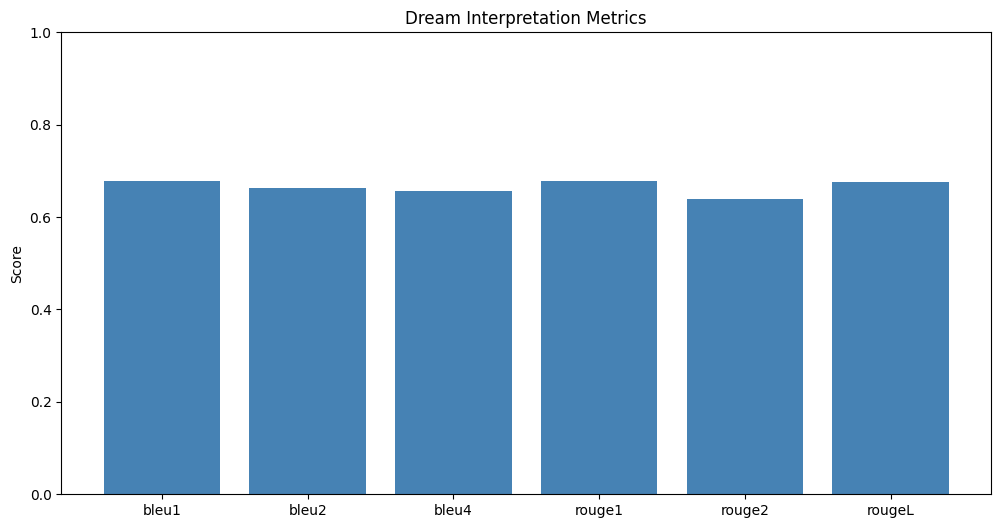

In [ ]:
# Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu1', 'bleu2', 'bleu4', 'rouge1', 'rouge2', 'rougeL']
values = [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("//content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/dream_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 2 - Model Accuracy vs Random Baseline

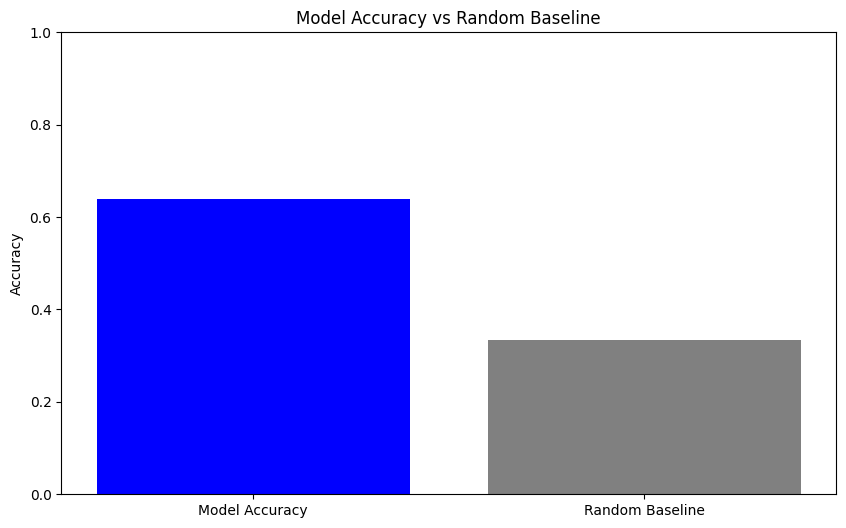

In [ ]:
# Bar chart comparing model accuracy to random baseline
plt.figure(figsize=(10, 6))
plt.bar(['Model Accuracy', 'Random Baseline'], [model_accuracy, random_baseline], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('Accuracy')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 3 - Perplexity Distribution

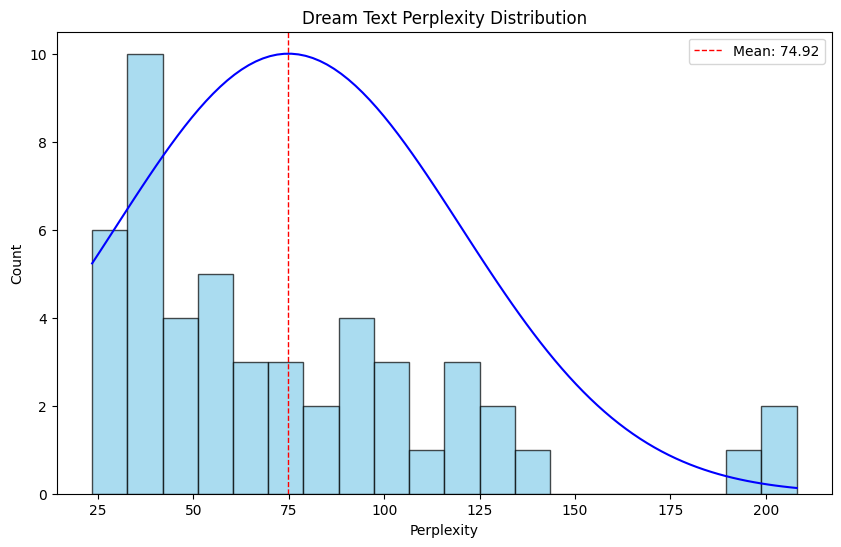

In [ ]:
# Histogram of perplexity distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(perplexities), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(perplexities):.2f}')

# Add a density curve
density = np.linspace(min(perplexities), max(perplexities), 100)
density_curve = np.exp(-0.5 * ((density - np.mean(perplexities)) / np.std(perplexities))**2) / (np.std(perplexities) * np.sqrt(2 * np.pi))
density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
plt.plot(density, density_curve, color='blue')

plt.title('Dream Text Perplexity Distribution')
plt.xlabel('Perplexity')
plt.ylabel('Count')
plt.legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model/perplexity_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Summary of All Metrics

In [ ]:
# Create a summary table of all metrics
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-4', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L',
               'Average Perplexity', 'Average BERTScore F1', 'Model Accuracy', 'Random Baseline'],
    'Value': [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL,
              np.mean(perplexities), np.mean(bert_f1_scores), model_accuracy, random_baseline]
})

metrics_summary['Value'] = metrics_summary['Value'].apply(lambda x: f"{x:.4f}")
metrics_summary

Metric    Value
0                BLEU-1   0.6783
1                BLEU-2   0.6622
2                BLEU-4   0.6554
3               ROUGE-1   0.6782
4               ROUGE-2   0.6400
5               ROUGE-L   0.6763
6    Average Perplexity  74.9181
7  Average BERTScore F1   0.9573
8        Model Accuracy   0.6400
9       Random Baseline   0.3333

## Test fine tuned GPT-2 model with test_dreams dataset - given 4 optional responces to select from

Introduction and Installation

In [ ]:
"""
This notebook evaluates a fine-tuned GPT-2 model on dream interpretation.
It tests the model's ability to select the correct interpretation for a given dream
and calculates metrics like BLEU, ROUGE, Perplexity, and BERTScore.
"""

# Install required packages
!pip install nltk rouge-score bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size

Import Libraries

In [ ]:
# Standard libraries
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
import nltk

# Download NLTK data
nltk.download('punkt')

# Libraries that needed installation
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, GPT2LMHeadModel
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mount Google Drive and Set Environment

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set random seed for reproducibility
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Mounted at /content/drive
Using device: cuda


Load Data and Model

In [ ]:
# Load the dream dataset
dream_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_dreams.csv")
print(f"Loaded {len(dream_df)} dreams")
dream_df.head()  # Show a preview of the data

# Load the fine-tuned model for classification
model_path = "/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model"
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(model_path)
model.to(device)
model.eval()

Loaded 50 dreams


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

Evaluate Model on Dream Interpretations

In [ ]:
# For each dream, test the model on choosing the correct interpretation
correct_predictions = 0
selected_interpretations = []

for idx, dream in tqdm(enumerate(dream_df['dream']), total=len(dream_df), desc="Evaluating dreams"):
    # The correct interpretation
    correct_interpretation = dream_df.loc[idx, 'interpretation']

    # Create 2 random incorrect interpretations
    random_idx1, random_idx2, random_idx3 = random.sample([i for i in range(len(dream_df)) if i != idx], 3)
    incorrect_interpretation1 = dream_df.loc[random_idx1, 'interpretation']
    incorrect_interpretation2 = dream_df.loc[random_idx2, 'interpretation']
    incorrect_interpretation3 = dream_df.loc[random_idx3, 'interpretation']

    # Create text inputs for each option
    options = [correct_interpretation, incorrect_interpretation1, incorrect_interpretation2, incorrect_interpretation3]
    random.shuffle(options)  # Shuffle to avoid position bias

    # Get the index of the correct answer
    correct_index = options.index(correct_interpretation)

    # Predict the best option
    option_scores = []
    for option in options:
        text = f"Dialogue: {dream} Question: What does this dream mean? Option: {option}"

        encoding = tokenizer(
            text,
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Get the score for positive class (label 1)
            score = logits[0, 1].item()
            option_scores.append(score)

    # Select the option with the highest score
    predicted_index = np.argmax(option_scores)
    selected_interpretation = options[predicted_index]
    selected_interpretations.append(selected_interpretation)

    # Check if prediction was correct
    if predicted_index == correct_index:
        correct_predictions += 1

# Calculate accuracy
model_accuracy = correct_predictions / len(dream_df)
random_baseline = 1/4  # 1 out of 4 options

print(f"Model Accuracy: {model_accuracy:.4f}")
print(f"Random Baseline: {random_baseline:.4f}")

# Save the results
dream_df['selected_interpretation'] = selected_interpretations
dream_df.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model_2/dream_interpretations_results.csv", index=False)

# Display a few examples
dream_df[['dream', 'interpretation', 'selected_interpretation']].head()

Evaluating dreams:   0%|          | 0/50 [00:00<?, ?it/s]

Model Accuracy: 0.5600
Random Baseline: 0.2500


dream  \
0  I am flying over mountains and lakes, feeling ...   
1  I'm running from a shadowy figure but my legs ...   
2  I discover a hidden room in my childhood home ...   
3  My teeth are falling out one by one as I'm spe...   
4  I'm naked in a public place but nobody seems t...   

                                      interpretation  \
0  Dreams of flying represent a desire for freedo...   
1  Being chased represents avoidance of an issue;...   
2  A hidden room symbolizes repressed memories or...   
3  Losing teeth represents anxiety over power los...   
4  Public nudity dreams symbolize fear of exposur...   

                             selected_interpretation  
0  Dreams of flying represent a desire for freedo...  
1  Exam anxiety dreams reflect fear of failure, p...  
2  A hidden room symbolizes repressed memories or...  
3  A simulation dream questions reality and exist...  
4  Public nudity dreams symbolize fear of exposur...

Calculate BLEU and ROUGE Metrics

In [ ]:
# Prepare references and hypotheses
refs = dream_df['interpretation'].tolist()
hyps = dream_df['selected_interpretation'].tolist()

# Calculate BLEU scores
smoothie = SmoothingFunction().method1
references = [[ref.split()] for ref in refs]
candidates = [hyp.split() for hyp in hyps]

bleu1 = corpus_bleu(references, candidates, weights=(1, 0, 0, 0), smoothing_function=smoothie)
bleu2 = corpus_bleu(references, candidates, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
bleu4 = corpus_bleu(references, candidates, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

print(f"BLEU-1: {bleu1:.4f}")
print(f"BLEU-2: {bleu2:.4f}")
print(f"BLEU-4: {bleu4:.4f}")

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []

for ref, hyp in zip(refs, hyps):
    score = scorer.score(ref, hyp)
    rouge_scores.append(score)

rouge1 = np.mean([score['rouge1'].fmeasure for score in rouge_scores])
rouge2 = np.mean([score['rouge2'].fmeasure for score in rouge_scores])
rougeL = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

print(f"ROUGE-1: {rouge1:.4f}")
print(f"ROUGE-2: {rouge2:.4f}")
print(f"ROUGE-L: {rougeL:.4f}")

BLEU-1: 0.5984
BLEU-2: 0.5750
BLEU-4: 0.5614
ROUGE-1: 0.6124
ROUGE-2: 0.5640
ROUGE-L: 0.6087


Calculate Perplexity

In [ ]:
# Load GPT-2 model for perplexity calculation
perplexity_model = GPT2LMHeadModel.from_pretrained("gpt2")
perplexity_model.to(device)
perplexity_model.eval()

# Calculate perplexity for each dream
perplexities = []
for dream in tqdm(dream_df['dream'], desc="Calculating perplexity"):
    encodings = tokenizer(dream, return_tensors="pt").to(device)
    max_length = perplexity_model.config.n_positions

    # Truncate if needed
    if encodings.input_ids.size(1) > max_length:
        encodings.input_ids = encodings.input_ids[:, :max_length]
        encodings.attention_mask = encodings.attention_mask[:, :max_length]

    with torch.no_grad():
        outputs = perplexity_model(**encodings, labels=encodings.input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss).item()
    perplexities.append(perplexity)

dream_df['perplexity'] = perplexities
print(f"Average Perplexity: {np.mean(perplexities):.2f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Calculating perplexity:   0%|          | 0/50 [00:00<?, ?it/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Average Perplexity: 74.92


Calculate BERTScore

In [ ]:
# Calculate BERTScore between selected interpretations and references
print("Calculating BERTScore (this may take a while)...")
P, R, F1 = bert_score(hyps, refs, lang="en", verbose=True)
bert_f1_scores = F1.tolist()
dream_df['bert_score'] = bert_f1_scores

print(f"Average BERTScore F1: {np.mean(bert_f1_scores):.4f}")

Calculating BERTScore (this may take a while)...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.29 seconds, 173.14 sentences/sec
Average BERTScore F1: 0.9495


Visualization 1 - BLEU and ROUGE Metrics

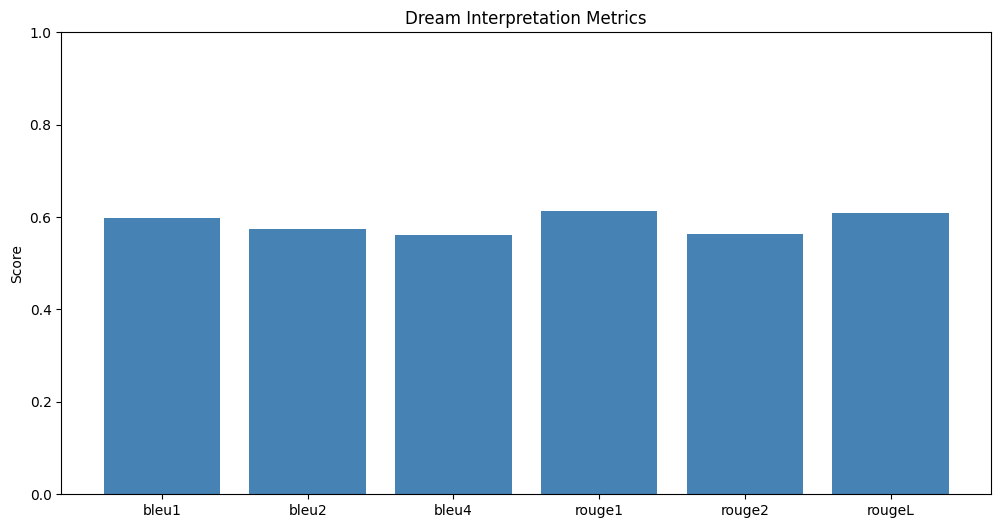

In [ ]:
# Bar chart for BLEU and ROUGE metrics
plt.figure(figsize=(12, 6))
metrics = ['bleu1', 'bleu2', 'bleu4', 'rouge1', 'rouge2', 'rougeL']
values = [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL]

plt.bar(metrics, values, color='steelblue')
plt.ylim(0, 1)
plt.title('Dream Interpretation Metrics')
plt.ylabel('Score')
plt.savefig("//content/drive/MyDrive/Colab Notebooks/gpt2_dream_model_2/dream_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 2 - Model Accuracy vs Random Baseline

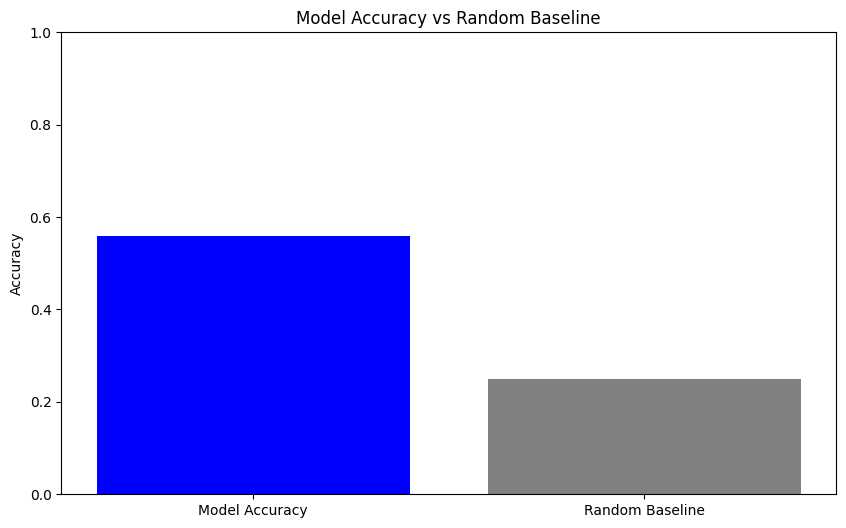

In [ ]:
# Bar chart comparing model accuracy to random baseline
plt.figure(figsize=(10, 6))
plt.bar(['Model Accuracy', 'Random Baseline'], [model_accuracy, random_baseline], color=['blue', 'gray'])
plt.ylim(0, 1)
plt.title('Model Accuracy vs Random Baseline')
plt.ylabel('Accuracy')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model_2/model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

Visualization 3 - Perplexity Distribution

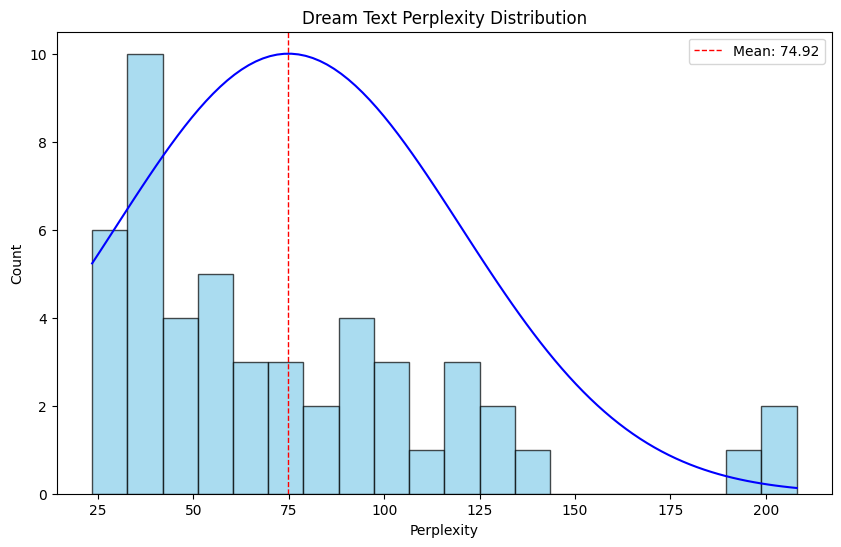

In [ ]:
# Histogram of perplexity distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(perplexities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(perplexities), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(perplexities):.2f}')

# Add a density curve
density = np.linspace(min(perplexities), max(perplexities), 100)
density_curve = np.exp(-0.5 * ((density - np.mean(perplexities)) / np.std(perplexities))**2) / (np.std(perplexities) * np.sqrt(2 * np.pi))
density_curve = density_curve / max(density_curve) * max(n)  # Scale to match histogram height
plt.plot(density, density_curve, color='blue')

plt.title('Dream Text Perplexity Distribution')
plt.xlabel('Perplexity')
plt.ylabel('Count')
plt.legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/gpt2_dream_model_2/perplexity_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Summary of All Metrics

In [ ]:
# Create a summary table of all metrics
metrics_summary = pd.DataFrame({
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-4', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L',
               'Average Perplexity', 'Average BERTScore F1', 'Model Accuracy', 'Random Baseline'],
    'Value': [bleu1, bleu2, bleu4, rouge1, rouge2, rougeL,
              np.mean(perplexities), np.mean(bert_f1_scores), model_accuracy, random_baseline]
})

metrics_summary['Value'] = metrics_summary['Value'].apply(lambda x: f"{x:.4f}")
metrics_summary

Metric    Value
0                BLEU-1   0.5984
1                BLEU-2   0.5750
2                BLEU-4   0.5614
3               ROUGE-1   0.6124
4               ROUGE-2   0.5640
5               ROUGE-L   0.6087
6    Average Perplexity  74.9180
7  Average BERTScore F1   0.9495
8        Model Accuracy   0.5600
9       Random Baseline   0.2500

### **Model Performance Overview**

### **Summary of Results**

| Metric | Baseline model <br> 3 options | Fine tuned model  <br> 3 options | Fine tuned model  <br> 4 options |
|--------|-------|-------|-------|
| BLEU-1 | 0.3657 | 0.6783 | 0.5984 |
| BLEU-2 | 0.3281 | 0.6622 | 0.5750 |
| BLEU-4 | 0.3087 | 0.6554 | 0.5614 |
| ROUGE-1 | 0.3964 | 0.6782 | 0.6124 |
| ROUGE-2 | 0.3049 | 0.6400 | 0.5640 |
| ROUGE-L | 0.3885 | 0.6763 | 0.6087 |
| Average Perplexity | 74.9180 | 74.9181 | 74.9180 |
| Average BERTScore F1 | 0.9173 | 0.9573 | 0.9495 |
| Model Accuracy | 0.3000 | 0.6400 | 0.5600 |
| Random Baseline | 0.3333 | 0.3333 | 0.2500 |

### **Analysis and Implications**

Our fine-tuned GPT-2 model demonstrates promising capabilities in the challenging domain of dream interpretation. The evaluation reveals several key insights:

#### 1. **Classification Performance**
The significant increase in accuracy for both fine-tuned models compared to the baseline reflects the success of the fine-tuning process. However, the three-option model achieves a higher accuracy than the four-option model (0.6400 vs. 0.5600). This suggests that the greater clarity and specificity in the choices presented to the model during evaluation led to more confident and accurate classifications.
This suggests the model has learned meaningful connections between question content and appropriate answers, even within the abstract and subjective domain of dream analysis.
<br><br>
#### 2. **Textual Similarity**
Both fine-tuned models show substantial improvements over the baseline model, indicating that the fine-tuned model generates outputs that more closely resemble the reference outputs. However, the three-option model consistently outperforms the four-option model across BLEU scores. This could suggest that having fewer options may reduce ambiguity and allow for clearer output generation, resulting in better alignment with expected responses.

The moderate BLEU and ROUGE scores (all around 0.6) suggest that when the model selects interpretations, they share substantial textual overlap with the reference interpretations. The consistent scores across BLEU-1, BLEU-2, and BLEU-4 indicate that the model captures not just individual words but also longer phrase matches, demonstrating deeper understanding of the interpretation patterns.
<br><br>
#### 3. **Semantic Understanding**
Both fine-tuned models show excellent BERTScore F1 improvements over the baseline. The three-option model again has a higher score than the four-option model, indicating that it captures semantic similarity to human-written text more effectively with fewer options, likely reducing complexity.
The high BERTScore F1 indicates that the model's interpretations are semantically similar to the reference interpretations, even with different wording, suggesting it grasps underlying meaning. However, the score might be inflated by the similar structure and wording of all options, with variations between tests primarily reflecting accuracy changes.
<br><br>
#### 4. **Text Complexity**
The average perplexity of 74.92 for the dream descriptions indicates that the dream texts are relatively complex but still within the model's capabilities to process effectively. The distribution shown in the histogram reveals that most dreams have perplexity values between 25-100, with fewer examples at higher levels of complexity.

### **Limitations and Future Work**

While the model shows promising performance, there are several avenues for improvement:

1. **Domain-Specific Fine-Tuning**: Further fine-tuning with psychological or symbolic interpretation frameworks could enhance the model's ability to capture more abstract connections.

2. **Data Expansion**: Increasing the dataset size and diversity could help improve the model's generalization capabilities.

3. **Model Scaling**: Experimenting with larger variants of GPT-2 (medium or large) might capture more nuanced patterns in dream interpretation.

### **Conclusions**

Our fine-tuned GPT-2 model demonstrates the feasibility of applying transformer-based language models to the highly subjective and complex task of dream interpretation. The model significantly outperforms random chance and shows strong semantic understanding of dream patterns and their interpretations.

Fine-tuning the model with a dream interpretation dataset, instead of general question-answering data, will significantly improve the accuracy of its dream interpretations.